# <font color='red'> 1 - ENTENDIMENTO DO NEGÓCIO
<a id='descricao'></a>

## <font color='blue'> DESCRIÇÃO DO NEGÓCIO

- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

<font color='green'> **Objetivo:**
- Fazer a previsão de vendas futuras para as próximas seis semanas.

<font color='green'> **O contexto:**

- A Rossmann é uma empresa farmacêutica da Europa, tem mais de mil lojas espalhadas por toda a Europa e todo final de mês existe uma reunião com todos os gerentes destas lojas para apresentar os resultados.
- Na reunião do último mês o CFO pediu para todos os gerentes das lojas fizessem uma predição das próximas seis semanas de vendas de cada uma das suas lojas.
- Então depois desta reunião de resultados os gerentes sairam com esta tarefa de fazer esta predição.

Este é o contexo de onde surgiu este problema.

<font color='green'> **Causa raiz do problema:**
- Dificuldade em determinar o valor do investimento para reformas de cada loja.

<font color='green'> **Stakeholder:**
- CFO é a pessoa que entende o real problema e que vai guiar na hora da solução.

<font color='green'> **O formato da solução:**
- Granularidade
    - Vendas diárias em R$, nas próximas 6 semanas
- Tipo do problema
    - Problema de predição
- Petenciais métodos
    - Time series, Regressão e Rede neural
- Formato da entrega
    - Predições acessadas via celular

**Solução:**
- Usar Machine Learning para realizar a Previsão de Vendas de Todas as Lojas, ou seja criar um modelo que faz a previsão de venda de todas as lojas das próximas seis semanas de uma maneira automática.
- Visualização das Predições de Vendas poderão ser feitas pelo Smartphone.

## <font color='blue'> PLANEJAMENTO DA SOLUÇÃO

O planejamento da solução para este projeto se baseia no método CRISP-DM (Cross Industry Standard Process for Data Mining), que é uma metodologia cíclica e flexivel voltada para resolução de problemas que envolvem grande volume de dados que permite a entrega rápida de valor para os times de negócio.

1. **ENTENDIMENTO DO NEGÓCIO**
2. **COLETA DOS DADOS**
3. **LIMPEZA DOS DADOS**
    - **Passo 1:** Análise Descritiva dos Dados
    - **Passo 2:** Feature Engineering
    - **Passo 3:** Filtragem das Variáveis
    
    
4. **ANÁLISE EXPLORATÓRIA DOS DADOS**
    - **Passo 4:** Exploração de Dados
    
    
5. **PREPARAÇÃO DOS DADOS**
    - **Passo 5:** Modelagem dos Dados
    - **Passo 6:** Seleção de Variáveis (Featuren selection)
    
    
6. **TREINAMENTO ALGORITMOS DE MACHINE LEARNING**
    - **Passo 7:** Algoritmos de Machine Learning
    - **Passo 8:** Ajuste Fino de Hiperparâmetros - (Hyperparameter Fine Tuning)
    
    
7. **AVALIAÇÃO DO ALGORITMO**
    - **Passo 9:** Tradução e Interpretação do Erro


8. **IMPLEMENTAR O MODELO PARA A PRODUÇÃO**
    - **Passo 10:** Modelo em Produção
    
- **INSIGHTS**
- **PRÓXIMO PASSOS**

## <font color='blue'> SUMÁRIO DO PROJETO
<a id='indice'></a>

1. [ENTENDIMENTO DO NEGÓCIO](#descricao)
2. [COLETA DOS DADOS](#dados)
3. [LIMPEZA DOS DADOS](#definicao) <br>
    3.1 [Análise Descritiva dos Dados](#passo1) <br>
    3.2 [Feature Engineering](#passo2) <br>
    3.3 [Filtragem das Variáveis](#passo3) <br>
4. [ANÁLISE EXPLORATÓRIA DOS DADOS](#eda) <br>
    4.1 [Exploração de Dados](#passo4) <br>
5. [PREPARAÇÃO DOS DADOS](#tratamento) <br>
    5.1 [Modelagem dos Dados](#passo5) <br>
    5.2 [Seleção de Variáveis](#passo6) <br>
6. [TREINAMENTO ALGORITMOS DE MACHINE LEARNING](#ml) <br>
    6.1 [Algoritmos de Machine Learning](#passo7) <br>
    6.2 [Ajuste Fino de Hiperparâmetros](#passo8) <br>
7. [AVALIAÇÃO DO ALGORITMO](#modelo) <br>
    7.1 [Tradução e Interpretação do Erro](#passo9) <br>
8. [IMPLEMENTAR O MODELO PARA A PRODUÇÃO](#producao) <br>
    8.1 [ Modelo em Produção](#passo10) <br>

[back](#indice)
**========================================================================================================================**

# <font color='red'> 2 - COLETA DOS DADOS
<a id='dados'></a>

## <font color='F37126'> Introdução:

Nesta etapa é o momento onde seria feito as query nos banco de dados, as requisições nas APIs, downloand da plataforma Kangle e etc.

## <font color='blue'> PASSO 0.0 - Biblioteca

In [2]:
import pandas as pd
import numpy  as np
import inflection
import seaborn as sns
import plotly.express as px
import xgboost as xgb
import random 
import warnings 
import pickle 
import requests
import json
import sklearn.metrics as metrics


from matplotlib            import pyplot as plt
from tabulate              import tabulate 
from scipy                 import stats  as ss 
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder 
from datetime              import datetime, timedelta 
from boruta                import BorutaPy
from sklearn.ensemble      import RandomForestRegressor
from sklearn.metrics       import mean_absolute_error, mean_squared_error 
from sklearn.linear_model  import LinearRegression, Lasso
from prophet               import Prophet

In [3]:
warnings.filterwarnings( 'ignore' )

## <font color='blue'> PASSO 0.1 - Carregando dos dados

In [4]:
df_sales_train = pd.read_csv('Datasets/train.csv', low_memory=False)
df_store_info = pd.read_csv('Datasets/store.csv', low_memory=False)
pd.set_option('display.max_columns', None)

[back](#indice)
**========================================================================================================================**

# <font color='red'> 3 - LIMPEZA DOS DADOS
<a id='definicao'></a>

## <font color='F37126'> Introdução:

**Aqui entra os três passos dos 10 de um projeto de Ciência de Dados - CRISP:**
   - **Passo 1:** Análise Descritiva dos Dados.
   - **Passo 2:** Feature Engineering.
   - **Passo 3:** Filtragem das variáveis.

## <font color='blue'> PASSO 1 - Análise Descritiva dos Dados
<a id='passo1'></a>

### <font color='F37126'> Introdução:

**Passo importante para verificar o quanto, o projeto é desafiador, ou seja verificar a qualidade dos dados e o entendimento dos dados.**

Etapa para verificar:
- Quantidade de dados.
- Tipos de variáveis.
- Quantidade de dados faltantes.
- Estatística descritiva.

### <font color='#F37126'> 1.1. Leitura dos dados

**Importar e visualizar a base de dados**

#### Dados da venda

In [5]:
df1_sales = df_sales_train.copy()

In [6]:
df1_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


**Nota:**

- Store = identificador único da loja
- DayOfWeek	= dia da semana:
    - 1 = segunda-feira
    - 7 = domingo
- Sales = vendas/dia (objetivo)
- Customers = número de clientes no dia
- Open = indica se a loja está aberta ou fechada:
    - 1 = aberta
    - 0 = fechada
- Promo = se existe uma promoção no dia ( 1 indica que estava ocorrendo uma promoção nesta loja)
- StateHoliday = indica um feriado estadual:
    - a = feriado público
    - b = feriado da páscoa
    - c = natal
    - 0 = nenhum tipo de feriado neste dia
- SchoolHoliday = feriado escolar:
    - 1=feriado escolar
    - 0= não é feriado escolar

**Podemos interpretar as linhas da seguinte maneira:**
- Em uma sexta-feira, no dia 31/07/2015, na loja número 1, estava aberta e entraram 555 clientes e neste dia tinha uma promoção e foi vendido 5.263 euros.

#### Dados das lojas

In [7]:
df1_store = df_store_info.copy()

In [8]:
df1_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**Nota:**
- Store = identificador único da loja
- StoreType = tipo da loja, diferencia entre 4 modelos de loja diferentes: a, b, c, d
- Assortment = descreve um nível de sortimento: 
    - a = básico
    - b = extra
    - c = estendido
- CompetitionDistance = distância da loja do concorrente mais próxima
- CompetitionOpenSinceMonth = fornece o mês aproximado em que o concorrente mais próximo foi aberto
- CompetitionOpenSinceYear = fornece o ano aproximado em que o concorrente mais próximo foi aberto
- Promo2 = Promo2 é uma promoção adicional para todas as lojas: 
    - 0 = a loja não está participando
    - 1 = a loja está articipando
- Promo2SinceWeek = descreve a semana do calendário em que a loja começou a participar do Promo2
- Promo2SinceYear = descreve o ano do calendário em que a loja começou a participar do Promo2
- PromoInterval = descreve os intervalos consecutivos em que a Promo2 é iniciada, nomeando os meses. Por exemplo, "fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja

#### Dados unidos (vendas + lojas)

In [9]:
# Juntar os dados
df1_sales_all = pd.merge(df1_sales, df1_store, how = 'inner', on = 'Store')

In [10]:
df1_sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [11]:
df1_sales_all.shape

(1017209, 18)

### <font color='#F37126'> 1.2. Colunas

**Visualizando cabeçalho do dataframe**

In [12]:
print(df1_sales_all.columns.tolist())

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [13]:
# Alterando as nomes das colunas
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list(map(snakecase,cols_old))

df1_sales_all.columns = cols_new

In [14]:
print(df1_sales_all.columns.tolist())

['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']


### <font color='#F37126'> 1.3. Dimensões de dados

**Verificando informações sobre o dataframe: linhas e colunas**

In [15]:
print('Número de linhas:{}'.format(df1_sales_all.shape[0]))
print('Número de colunas:{}'.format(df1_sales_all.shape[1]))

Número de linhas:1017209
Número de colunas:18


In [16]:
# Verificando os valores únicos das colunas
df1_sales_all.apply( lambda x: x.unique().shape[0] )

store                            1115
day_of_week                         7
date                              942
sales                           21734
customers                        4086
open                                2
promo                               2
state_holiday                       4
school_holiday                      2
store_type                          4
assortment                          3
competition_distance              655
competition_open_since_month       13
competition_open_since_year        24
promo2                              2
promo2_since_week                  25
promo2_since_year                   8
promo_interval                      4
dtype: int64

### <font color='#F37126'> 1.4. Tipos de dados

**Verificando o tipo das colunas**

In [17]:
df1_sales_all.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

### <font color='#F37126'> 1.5. Check dados nulos

**Verificando dados nulos**

#### <font color='F37126'> Introdução:

**O que é missing values (dados nulos)?**
 - Na tradução seria dados faltantes.
 
**Podemos entender dados faltantes da seguinte forma:**
 - Corrupção de dados.
 - Dados truncados (seria parte dos dados).
 - Dados incompletos.

#### Verificando quantidade de valores nulos

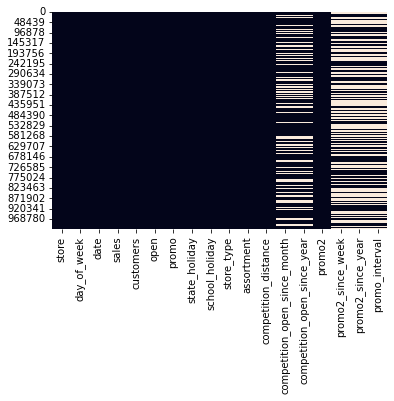

In [18]:
# Verificando os valores faltantes
sns.heatmap(df1_sales_all.isnull(),cbar=False);

In [19]:
df1_sales_all.isnull().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [20]:
# % faltantes
df1_sales_all.isna().sum() / df1_sales_all.shape[0]*100

store                            0.000000
day_of_week                      0.000000
date                             0.000000
sales                            0.000000
customers                        0.000000
open                             0.000000
promo                            0.000000
state_holiday                    0.000000
school_holiday                   0.000000
store_type                       0.000000
assortment                       0.000000
competition_distance             0.259730
competition_open_since_month    31.787764
competition_open_since_year     31.787764
promo2                           0.000000
promo2_since_week               49.943620
promo2_since_year               49.943620
promo_interval                  49.943620
dtype: float64

### <font color='#F37126'> 1.6. Filtrando os valores nulos

**Verificando dados nulos**

#### <font color='F37126'> Introdução:

Existe três maneiras de tratar as linhas NA

 - Descartar todas as linhas que tenha pelo menos uma coluna NA
 - Substituir pela média/mediana
 - Entender porque os valores NA estão presentes

#### Filtrando os valores nulos

In [21]:
# competition_distance
df1_sales_all.competition_distance.fillna(df1_sales_all.competition_distance.mean(),inplace=True)

In [22]:
# Preencher com a 0 os valores nulos
cols_null = ['competition_open_since_month','competition_open_since_year',
             'promo2_since_week','promo2_since_year','promo_interval']
for i in cols_null:
    df1_sales_all[i].fillna(0,inplace=True)

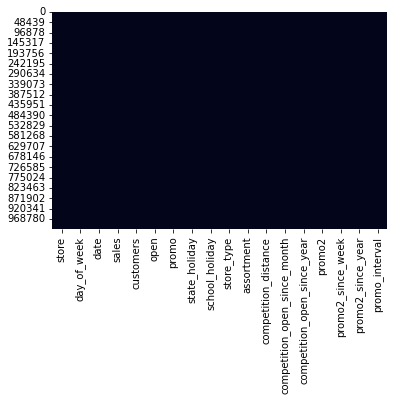

In [23]:
sns.heatmap(df1_sales_all.isnull(),cbar=False);

In [24]:
df1_sales_all.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
dtype: int64

### <font color='#F37126'> 1.7. Change Data Types

In [25]:
# Mudando os tipos das colunas
df1_sales_all['date'] = pd.to_datetime( df1_sales_all['date'] )

In [26]:
df1_sales_all.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [27]:
# Mudando os tipos das colunas

# competiton
df1_sales_all['competition_open_since_month'] = np.dtype('int64').type(df1_sales_all['competition_open_since_month'])
df1_sales_all['competition_open_since_year'] = np.dtype('int64').type(df1_sales_all['competition_open_since_year'])
    
# promo2
df1_sales_all['promo2_since_week'] = np.dtype('int64').type(df1_sales_all['promo2_since_week'])
df1_sales_all['promo2_since_year'] = np.dtype('int64').type(df1_sales_all['promo2_since_year'])

In [28]:
df1_sales_all.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
dtype: object

### <font color='#F37126'> 1.8. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

#### <font color='F37126'> Introdução:

**Algumas definições:**

**Média/Mediana**

Tendencia central (Métrica de tendência central, mostra como os dados estão centralizados)
- Média - mostra a centralização dos dados
- Mediana - mostra a centralização em termos da posição

**Métrica de dispersão**

As métricas de dispersão são:
 - Desvio Padrão (que é a disperção dos dados em torno da média, o desvio padrão é a raiz quadrada da variância.)
 - Mínimo
 - Máximo
 - Range (variação dos dados dos dados dentro do mínimo e máximo)
 - Moda (a moda é o valor que aparece com mais frequência em um conjunto de dados, ou seja, o valor que se repete mais vezes)
 - Skew
   - Definição: Assimetria é uma medida de simetria. Ela nos diz o quão simétrica é a distribuição dos dados em torno da média é uma medida muito boa para informar a aparência ou forma da distribuição dos dado e o quanto os dados desvia de uma distribuição normal.
   - Existe dois tipo de Skewness: positiva e negativa.
     - Mediana > Média = Deslocamento para a direita = Skeness negativa
     - Mediana = Média = Não tem deslocamento = Não tenho Skeness, então a distribuição é simétrica
     - Mediana < Média = Deslocamento para a esquerda = Skeness positiva
   - Algoritimos de ML precisam treinar com dados não enviesados, ou seja, a distribuição da variável resposta (alvo) precisa ser o mais próximo de uma distribuição normal.
 - Kurtosis 
   - Definição: A Curtose ou achatamento também é uma medida que nos ajuda a dar forma à distribuição dos dados, diferente da assimetria, tenta capturar em uma medida a forma das caudas da distribuição (é basicamente a calda longa de cada uma das distribuições,o que pode indicar que temos valores bem altos ou baixo que aparecem poucas vezes).

**Gráfico**
- Boxplots
    - Definição: Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, o intervalo interquartil(IQR) e outliers para cada variável.
    - Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos.
- Histogramas
    - Definição: Um histograma exibe a forma e distribuição de dados, cada barra agrupa números em intervalos, as barras mais altas mostram que mais dados estão nesse intervalo.
- Gráfico de Dispersão (Scater-Plot)
    - Definição: Esse gráfico pode ser utilizado para comprovar a correção das variáveis e também visualizar como as mesmas se relacionam.

**A Estatística Descritiva serve para duas coisas:**

 - Ganhar conhecimento de negócio
 - Conseguir detectar alguns erros
    
**Antes de calcular estatítica descritiva precisamos separar os conjuntos de dados em variáveis tipos:**

 - Tipo númerico
 - Tipo categorico
 
E depois de separar vamos usar ferramentas estatísticas para cada um destes tipos de dados para poder entender melhor como estes dados se comportam.

#### Separando os tipos de variáveis

In [29]:
# Colunas númericas
num_attributes = df1_sales_all.select_dtypes( include=['int64', 'float64'] )
# Colunas Categoricas
cat_attributes = df1_sales_all.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### Colunas númericas

In [30]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

In [31]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
855534,939,7,0,0,0,0,0,1340.0,0,0,0,0,0
659580,725,2,4875,545,1,0,0,17540.0,6,2012,0,0,0


In [32]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval
676548,0,a,a,"Jan,Apr,Jul,Oct"
160372,0,a,a,"Feb,May,Aug,Nov"


In [33]:
# dispersion - std, min, max, range, skew, kurtosis

# Desvio Padrão
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
# Mínimo
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
# Máximo
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
# Range
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
# Skew
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
# Kurtosis
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

In [34]:
# Juntando as metricas em uma tabela
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
# Colocando os nomes nas colunas
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,75860.0,75840.0,5430.085652,2330.0,7705.293872,2.932345,13.041687
8,competition_open_since_month,0.0,12.0,12.0,4.926878,4.0,4.283541,0.189174,-1.453353
9,competition_open_since_year,0.0,2015.0,2015.0,1370.172511,2006.0,935.362988,-0.782138,-1.388139


**Nota:**
- Na linha Sales, podemos observar que a média e a mediana das vendas estão muito próximas, que quer dizer que não temos um deslocamento da normal muito grande que é representado pela skew, que está muito próximo de zero, que significa que está muito próximo de uma curva normal.

In [35]:
df1_sales.describe().round(1)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0
mean,558.4,4.0,5773.8,633.1,0.8,0.4,0.2
std,321.9,2.0,3849.9,464.4,0.4,0.5,0.4
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0


**Nota:**
- Na coluna Sales a maior venda pode está relacionado as compras realizadas ao domingo e uma promoção nesta loja e a menor venda é porque a loja está fechada.
- Podemos observar que em média, existe uma distância de 5 mil entre a loja e o seu concorrente máis próximo.
- Na coluna Customers o maior número de cliente é quando tem promoção ao domingo.

**Insight:**
- Podemos programar junto com o setor de Marketing, promoções além do fim de semana, para atrair clientes e com uma possibilidade de aumento de vendas.

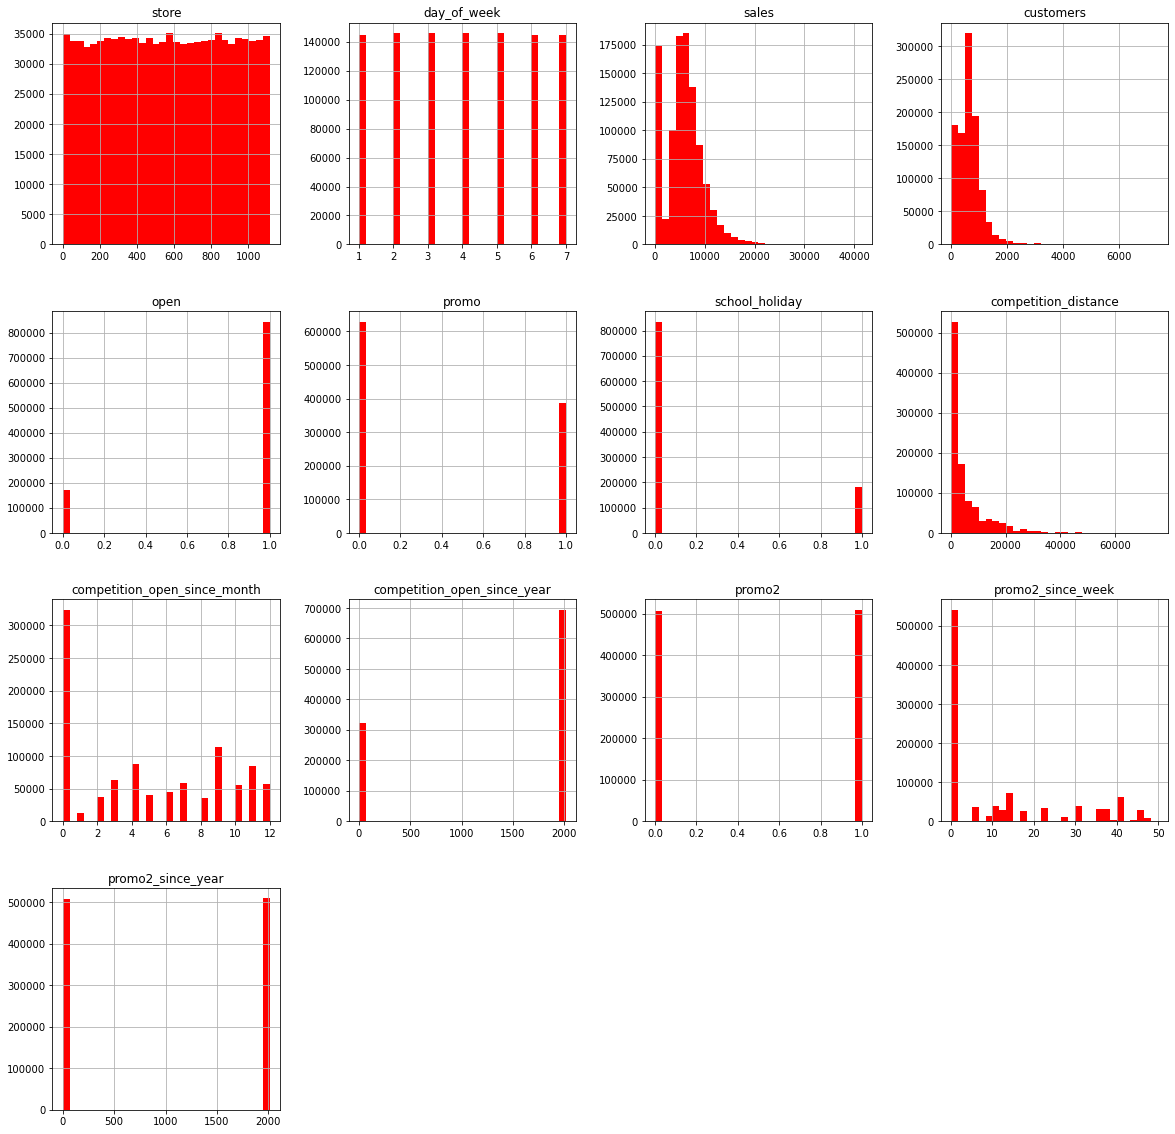

In [36]:
# Histograma para ver a distribuição dos dados
num_attributes.hist(bins = 30, figsize=(20,20), color = 'r');

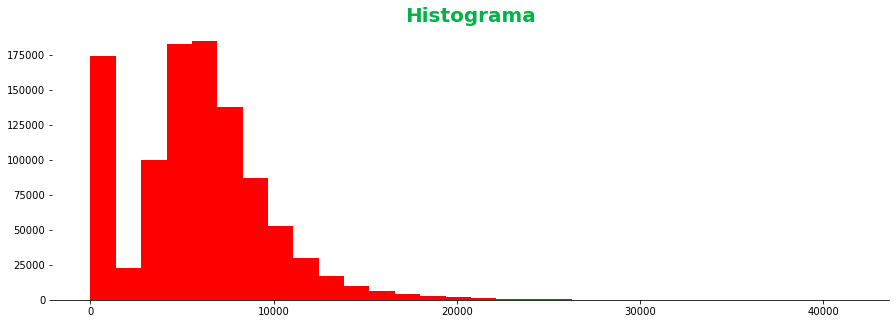

In [38]:
fig,ax = plt.subplots( figsize = (15,5))

df1_sales['Sales'].hist(bins = 30, color = 'r')

ax.set_title("Histograma", fontsize=20, fontweight='bold', color='#00b247' )

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Nota:**
- **Store:** como cada loja tem um identificador único, por isso que temos uma distribuição uniforme.
- **DayOfWeek:** podemos obervar que temos uma quantidade bem parecida de transações por dia, não mostra variação, quer dizer que não importa o dia da semana, ou seja ele vende mais ou menos igual, não temos um comportamneto.
- **Sales:** a maior concentração se encontra entre 0 há 6 mil.
- **Open:** mostra que a maior parte do tempo as lojas estavam abertas.
- **Promo:** podemos ver que tinha promoção basicamente na metade ou em torno de 40% das vezes que a loja estava aberta.
- **competition_distance:** Mostra que todos os competidores estão muito próximo (uma distância pequna entre eles.

#### Colunas Categóricas

In [36]:
# Verificando os valores únicos das colunas
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday     4
store_type        4
assortment        3
promo_interval    4
dtype: int64

In [37]:
cat_attributes.apply( lambda x: x.unique() )

state_holiday                                          [0, a, b, c]
store_type                                             [c, a, d, b]
assortment                                                [a, c, b]
promo_interval    [0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Jun,...
dtype: object

**Nota:**
- StateHoliday = indica um feriado estadual. Normalmente todas as lojas, com poucas exceções, estão fechadas nos feriados estaduais:
    - a = feriado
    - b = feriado da páscoa
    - c = natal
    - 0 = nenhum tipo de feriado neste dia
- StoreType = tipo da loja, diferencia entre 4 modelos de loja diferentes: a, b, c, d
- Assortment = descreve um nível de sortimento: 
    - a = básico
    - b = extra
    - c = estendido

<AxesSubplot:xlabel='assortment', ylabel='sales'>

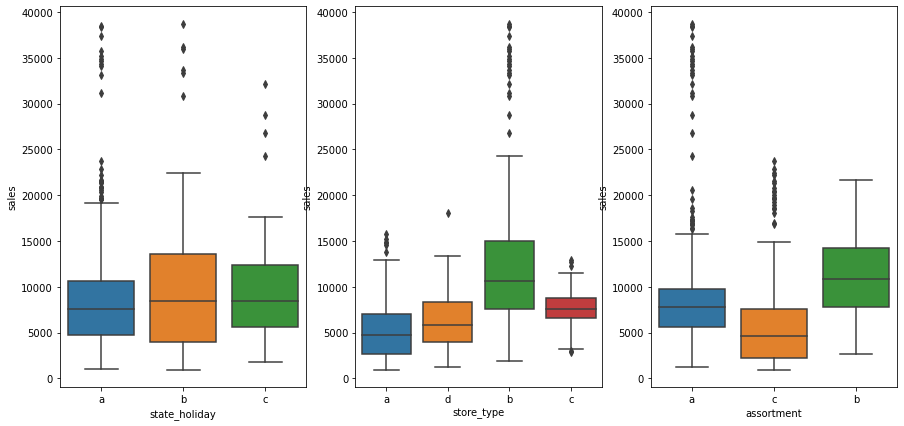

In [38]:
# Filtro - quando tem feriado
fig = plt.subplots(figsize=(15,7))

aux = df1_sales_all[(df1_sales_all['state_holiday'] != '0') & (df1_sales_all['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )

**Nota:**
- Boxplot state_holiday: Podemos ver que a média das vendas são próximas, mas as vendas no feriado de páscoa tem uma variação de vendas muito maior.
- Boxplot store_type: Podemos ver que a média das vendas são bem diferentes e o tipo de loja da categoria 'b', tem o maior número de vendas e a categoria 'a', tem a menor média de vendas.
- Boxplot assortment: Podemos ver que a média das vendas são bem diferentes e o nível de sortimento da categoria 'b', tem o maior número de vendas e a categoria 'c', tem a menor média de vendas.

**Insight:**
- Talvez se elevarmos o nível de sortimento da categoria 'b' para outros tipos de lojas o número de vendas possa aumentar.

<AxesSubplot:xlabel='assortment', ylabel='sales'>

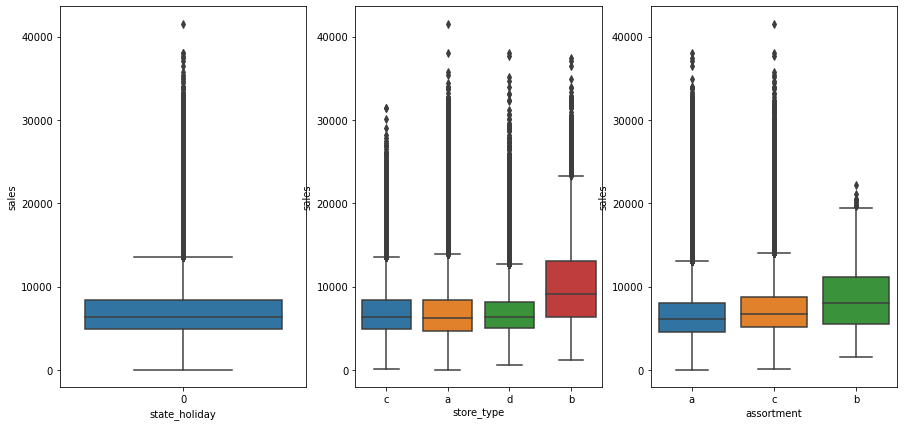

In [39]:
# Filtro - quando não tem feriado
fig = plt.subplots(figsize=(15,7))

aux = df1_sales_all[(df1_sales_all['state_holiday'] == '0') & (df1_sales_all['sales'] > 0)]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux )

**Nota:**
- Boxplot state_holiday: O número das vendas é menor que nos dias que tem feriado.
- Boxplot store_type: Quando não tem feriado a média das vendas entre as lojas do tipo 'a','c' e 'd' são muito próximas e a loja do tipo 'b', contínua com o maior número de vendas.
- Boxplot assortment: Quando não tem feriado a média das vendas entre as lojas do tipo 'a' e 'c' são muito próximas e a loja do tipo 'b', contínua com o maior número de vendas.

**Insight:**
- Talvez se elevarmos o nível de sortimento da categoria 'b' para outros tipos de lojas o número de vendas possa aumentar.

### <font color='#F37126'> 1.9. Verificando outliers

store : int64
day_of_week : int64
sales : int64
customers : int64
open : int64
promo : int64
school_holiday : int64
competition_distance : float64
competition_open_since_month : int64
competition_open_since_year : int64
promo2 : int64
promo2_since_week : int64
promo2_since_year : int64


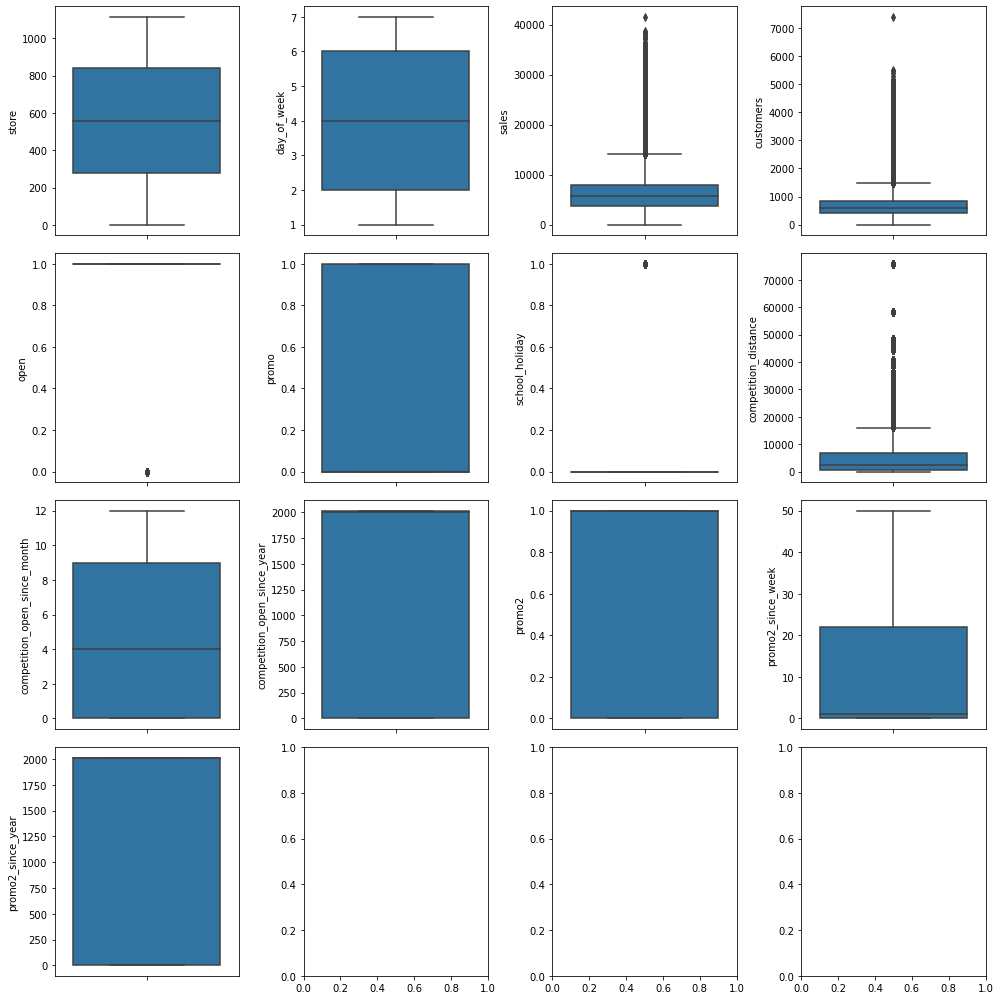

In [40]:
# Carregar variaveis para plot
variaveis_numericas = []
for i in num_attributes:
        if num_attributes.dtypes[i] == 'int64' or num_attributes.dtypes[i] == 'float64':            
            print(i, ':' , num_attributes.dtypes[i]) 
            variaveis_numericas.append(i)  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(4, 4) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = num_attributes, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

**Identificando Outliers com a Biblioteca PYOD**

In [41]:
#!pip install pyod

In [42]:
# Importando o pacote PYOD (ele vai ser usado para medir as distâncias e calcular Outliers)
from pyod.models.knn import KNN

In [43]:
# Instanciando o objeto KNN 
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(num_attributes)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [44]:
# A probiedade LABELS_ retorna um ARRAY com 0 e 1
# 0 significa que NÃO é outlier
# 1 significa que É outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([915499, 101710], dtype=int64))

In [46]:
# Observando o calculo da distancia realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([32.72613634, 26.66458325, 25.67099531, ..., 27.58622845,
       47.14870094,  1.        ])

In [47]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [49]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = num_attributes.iloc[outliers,:]
lista_outliers

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year
101,1,2,3037,416,1,0,0,1270.0,9,2008,0,0,0
122,1,2,6206,589,1,1,1,1270.0,9,2008,0,0,0
212,1,3,2605,327,1,0,1,1270.0,9,2008,0,0,0
220,1,2,7959,957,1,0,1,1270.0,9,2008,0,0,0
221,1,1,9331,1080,1,0,1,1270.0,9,2008,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016971,1115,1,9322,615,1,1,0,5350.0,0,0,1,22,2012
1017005,1115,2,3246,240,1,0,1,5350.0,0,0,1,22,2012
1017058,1115,5,10517,653,1,1,0,5350.0,0,0,1,22,2012
1017120,1115,6,9432,668,1,0,0,5350.0,0,0,1,22,2012


In [50]:
num_attributes.shape

(1017209, 13)

**Nota:**
- Registros que não são outliers: 915.499
- Registros que são outliers: 101.710
    
Devemos depois fazer uma análise mais profunda porque nem tudo pode ser um outlier.

## <font color='blue'> PASSO 2 - Feature Engineering - (pré-processamento de dados)
<a id='passo2'></a>

### <font color='F37126'> Introdução:

**Passo importante para extrair o máximo potencial dos dados e criação de novas features para estudo durante a 'Análise Exploratória de Dados'**
- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos.
- Feature engineering não se trata apenas de selecionar boas features, esse processo também abrange a transformação matemática nas features existentes para extrair o máximo potencial dos dados e criação de novas features.
- Criar novas features a partir das existentes é ainda mais importante quando temos poucos dados, pois modelos que utilizam poucas instâncias tendem a realizar overfiting.


**Devemos olhar para as features e ser capaz de extrair as hipóteses que devemos validar com os dados lá no passo de análise exploratória de dados.**
- As hipóteses vai possibilitar a fazer algumas apostas (achismo) com relação aos atributos e as variáveis de respostas.

**Mapa Mental de Hipóteses**
- O mapa mental vai mostrar quais as variáveis precisamos ter para fazer determinadas análises e para poder validar as hipóteses e com isso vai guiar na análise explotória dos dados.
- Geralmente o mapa mental surge de reuniões de Brainstorming
  - Exemplo:
    - Do seu ponto de vista, quais são as alavancas que impacta as vendas?

**O Mapa Mental de Hipóteses é constituído por três elementos:**
- **Fenômeno**
  - Qual fenômeno estou modelando?
- **Agentes**
  - Quem são os agentes que atuam sobre o fenômeno de interesse?
- **Atributos**
  - Qual a descrição dos agentes?
  
**Qual o objetivo deste mapa?**
- Criar uma Lista de Hipóteses
  - Hipóteses para validar com os dados
  - As hipóteses validadas ou descartadas pode se tornar em um insights


Mas é importante mencionar que isso não é uma relação de causa e efeito, mas é simplesmente correlação.

### <font color='#F37126'> 2.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [51]:
df2_sales_all = df1_sales_all.copy()

In [52]:
df2_sales_all.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0


In [53]:
df2_sales_all.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
dtype: object

In [54]:
df2_sales_all.shape

(1017209, 18)

### <font color='#F37126'> 2.2. Feature Engineering

**Derivando as variáveis**

In [55]:
# Criando um atributo para ano
df2_sales_all['year'] = df2_sales_all['date'].dt.year
# Criando um atributo para mês
df2_sales_all['month'] = df2_sales_all['date'].dt.month
# Criando um atributo para dia
df2_sales_all['day'] = df2_sales_all['date'].dt.day
# Criando um atributo para semana do ano
df2_sales_all['week_of_year'] = df2_sales_all['date'].dt.weekofyear
# Criando um atributo ano e semana
df2_sales_all['year_week'] = df2_sales_all['date'].dt.strftime( '%Y-%W' )
# Mudando a classificação do assortment
df2_sales_all['assortment'] = df2_sales_all['assortment'].apply(lambda x: 'basic' if x == 'a' else 
                                                                'extra' if x == 'b' else 'extended')
# Mudando a classificação do state holiday
df2_sales_all['state_holiday'] = df2_sales_all['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 
                                                                      'easter_holiday' if x == 'b' else 
                                                                      'christmas' if x == 'c' else 'regular_day' )

In [56]:
df2_sales_all.head().T

,0,1,2,3,4
store,1,1,1,1,1
day_of_week,5,4,3,2,1
date,2015-07-31 00:00:00,2015-07-30 00:00:00,2015-07-29 00:00:00,2015-07-28 00:00:00,2015-07-27 00:00:00
sales,5263,5020,4782,5011,6102
customers,555,546,523,560,612
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,c,c,c,c


In [57]:
df2_sales_all.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
year                                     int64
month                                    int64
day                                      int64
week_of_year 

### <font color='#F37126'> 2.3. Mapa Mental de Hipóteses

**Mapa Mental de Hipóteses**

![Mapa Mental](Imagens/Mapa_Mental_de_Hipoteses.png)

### <font color='#F37126'> 2.4. Criação das Hipóteses

#### Hipóteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

#### Hipóteses Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

#### Hipóteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

#### Lista Final de Hipóteses

Priorização das hipóteses:

- Uma das formas de priorizar é verificar se temos os dados ou não disponivél naquele momento para fazer uma validação.

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

**8.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**9.** Lojas deveriam vender mais ao longo dos anos.

**10.** Lojas deveriam vender mais no segundo semestre do ano.

**11.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**12.** Lojas deveriam vender menos aos finais de semana.

**13.** Lojas deveriam vender menos durante os feriados escolares.


## <font color='blue'> PASSO 3 - Filtragem das Variáveis
<a id='passo3'></a>

### <font color='F37126'> Introdução:

**Passo importate para a seleção de variáveis relevantes.**

**Para seleção existe duas diferenças:**
- Filtragem das variáveis é diretamente relacionado nas restrições do negócio.
    - No ínicio do negócio devemos prever as restrições porque no final do projeto podemos não conseguir colocar o modelo em produção.
    
    
- Seleção de variáveis é estritamente relacionada as variáveis mais relevantes para o modelo.
    - A seleção das variáveis é o papel da pessoa que está analisando os dados.
    
    
Tem algumas variáveis que por mais que ela, ajude o modelo a ter ótimos resultados, não será possível usar devido as restrições de negócio,

### <font color='#F37126'> 3.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [58]:
df3_sales_all = df2_sales_all.copy()

In [59]:
df3_sales_all.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,31,31,2015-30
1,1,4,2015-07-30,5020,546,1,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,30,31,2015-30
2,1,3,2015-07-29,4782,523,1,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,29,31,2015-30
3,1,2,2015-07-28,5011,560,1,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,28,31,2015-30
4,1,1,2015-07-27,6102,612,1,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,27,31,2015-30


In [60]:
df3_sales_all.shape

(1017209, 23)

**Nota:**

Variável customers
- Essa coluna indica quantos clientes tinham na loja, mas como não sabemos quantos clientes estarão na loja, para isso seria necessário um projeto serapado para fazer a previsão de quantos clientes estaria em cada uma das lojas e pegar este resultado e usar neste projeto de previsão de vendas.

Variável open
- Quando a loja está fechada não tem vendas, então nós não temos um aprendizado.

Variável open
-  Quando a loja está fechada a venda é zero.

### <font color='#F37126'> 3.2. Filtragem das Linhas

#### Variável open

In [61]:
# Vamos gerar dois DataFrames para indicar quando as lojas estão fechadas e abertas

# Loja fechada
df_close = df3_sales_all[df3_sales_all.open == 0]
# Loja aberta
df_open = df3_sales_all[df3_sales_all.open == 1]

In [62]:
print('Total = ', len(df3_sales_all))
print('Número de lojas/dias fechado = ', len(df_close))
print('Número de lojas/dias aberto = ', len(df_open))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [63]:
len(df_close) / df3_sales_all.shape[0]*100

16.989330609540417

In [64]:
len(df_open) / df3_sales_all.shape[0]*100

83.01066939045958

In [65]:
df_close.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week
5,1,7,2015-07-26,0,0,0,0,regular_day,0,c,basic,1270.0,9,2008,0,0,0,0,2015,7,26,30,2015-29
12,1,7,2015-07-19,0,0,0,0,regular_day,0,c,basic,1270.0,9,2008,0,0,0,0,2015,7,19,29,2015-28
19,1,7,2015-07-12,0,0,0,0,regular_day,0,c,basic,1270.0,9,2008,0,0,0,0,2015,7,12,28,2015-27
26,1,7,2015-07-05,0,0,0,0,regular_day,0,c,basic,1270.0,9,2008,0,0,0,0,2015,7,5,27,2015-26
33,1,7,2015-06-28,0,0,0,0,regular_day,0,c,basic,1270.0,9,2008,0,0,0,0,2015,6,28,26,2015-25


**Nota:**
- A base de dados dos dias em as lojas ficaram fechadas, não faz sentido em usar, porque mostra que não teve movimentação nesses dias e isso também pode influênciar na média.

#### Variável sales

In [66]:
df3_sales_all = df3_sales_all[df3_sales_all['sales'] > 0]

In [67]:
df3_sales_all.describe()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,year,month,day,week_of_year
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,5458.083951,4.926482,1369.692738,0.498670,11.596159,1003.201259,2013.831945,5.845774,15.835706,23.646946
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,7799.457213,4.283634,935.556484,0.499999,15.308101,1005.874685,0.777271,3.323959,8.683392,14.389931
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2330.000000,4.000000,2006.000000,0.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,2014.000000,8.000000,23.000000,35.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2015.000000,12.000000,31.000000,52.000000


**Nota:**
- Pelo fato de ter filtrado os registos onde Sales é igual a zero a média dos valores dos atributos Sales aumentaram.

### <font color='#F37126'> 3.3. Selecão das Colunas

In [68]:
cols_drop = ['open']
df3_sales_all = df3_sales_all.drop( cols_drop, axis=1 )

In [69]:
print(df3_sales_all.columns.tolist())

['store', 'day_of_week', 'date', 'sales', 'customers', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval', 'year', 'month', 'day', 'week_of_year', 'year_week']


In [70]:
df3_sales_all.shape[1]

22

[back](#indice)
**========================================================================================================================**

# <font color='red'> 4 - ANÁLISE EXPLORATÓRIA DOS DADOS
<a id='eda'></a>

## <font color='#F37126'> Introdução:

A análise exploratória de dados serve para medir o impacto das variáveis em relação as variáveis respostas e muitas vezes quantificar este impacto, nesta etapa começa gerar valor.

## <font color='blue'> PASSO 4 - Exploração de Dados
<a id='passo4'></a>

### <font color='#F37126'> Introdução:

**Passo importante para medir o impacto das variáveis em relação as variáveis respostas e para o entendimento do negócio, e para alcançar este objetivo devemos:**

1. Entender como o negócio funciona atráves dos dados;
2. Validando as hipóteses, que é um momento de gerar Insights<br>
     2.1 Para gerar Insights precisamos de duas coisas:
         - Primeira: gerar surpresas, gerar informação que as pessoas não sabiam dela.
         - Segundo: é chocar a crença da pessoa.
3. Quando está fazendo Análise Exploratória de Dados (EDA), estamos ganhando sensibilidade em saber qual variável impacta o fenômeno.

### <font color='#F37126'> 4.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [71]:
df4_sales_all = df3_sales_all.copy()

In [72]:
df4_sales_all.head()

,store,day_of_week,date,sales,customers,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week
0,1,5,2015-07-31,5263,555,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,31,31,2015-30
1,1,4,2015-07-30,5020,546,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,30,31,2015-30
2,1,3,2015-07-29,4782,523,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,29,31,2015-30
3,1,2,2015-07-28,5011,560,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,28,31,2015-30
4,1,1,2015-07-27,6102,612,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,27,31,2015-30


In [73]:
df4_sales_all.shape

(844338, 22)

### <font color='#F37126'> 4.2. Análise Univariada

#### <font color='F37126'> Introdução:

- Aqui nós nos importamos somente com a variável resposta, procuramos saber o compartamento da variável.
- Aqui procuramos saber o compartamento da variável.
    - Quais são os valores (Min, Máx, Distribuição, Range,...)?

#### Comportamento da variável resposta

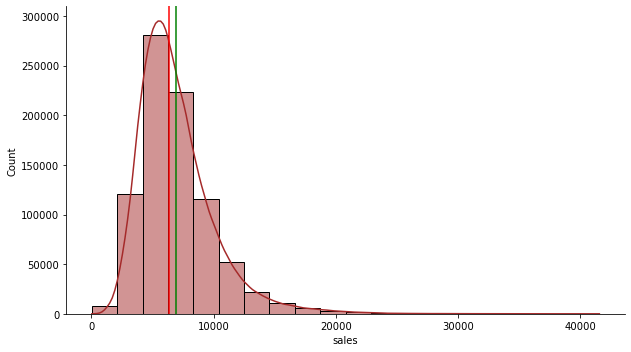

In [74]:
media_inicial = np.mean(df4_sales_all.sales)
mediana_inicial = np.median(df4_sales_all.sales)

sns.displot(df4_sales_all.sales, bins=20 ,color="brown", kde=True).figure.set_size_inches(10, 5);
plt.axvline(x=media_inicial, color='g', linestyle='-');
plt.axvline(x=mediana_inicial, color='r', linestyle='-');

In [75]:
# Distribuição dos dados
print('média: ' + str(df4_sales_all.sales.mean()))
print('mediana: ' + str(df4_sales_all.sales.median()))
print('moda: ' + str(df4_sales_all.sales.mode()[0]))
print('desvio padrão: ' + str(df4_sales_all.sales.std()))
print('valor mínimo: ' + str(df4_sales_all.sales.min()))
print('valor máximo: ' + str(df4_sales_all.sales.max()))
print('valor da variancia: ' + str(df4_sales_all.sales.var()))
print('valor da assimetria: ' + str(df4_sales_all.sales.skew()))
print('valor da curtose: ' + str(df4_sales_all.sales.kurtosis()))


média: 6955.959133664481
mediana: 6369.0
moda: 5674
desvio padrão: 3103.8155154906167
valor mínimo: 46
valor máximo: 41551
valor da variancia: 9633670.754200283
valor da assimetria: 1.594928835753748
valor da curtose: 4.854026585805931


In [76]:
df4_sales_all.sales.describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: sales, dtype: float64

**Nota:**
- Podemos observar que a média e a mediana das vendas estão muito próximas, que quer dizer que não temos um deslocamento da normal muito grande que significa que está muito próximo de uma curva normal.
- Temos uma calda longa, o que pode indicar que temos valores bem altos que aparecem poucas vezes.

#### Total de vendas por ano

In [77]:
df4_sales_all.groupby('year')['sales'].sum().reset_index().sort_values('sales', ascending=False)

,year,sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


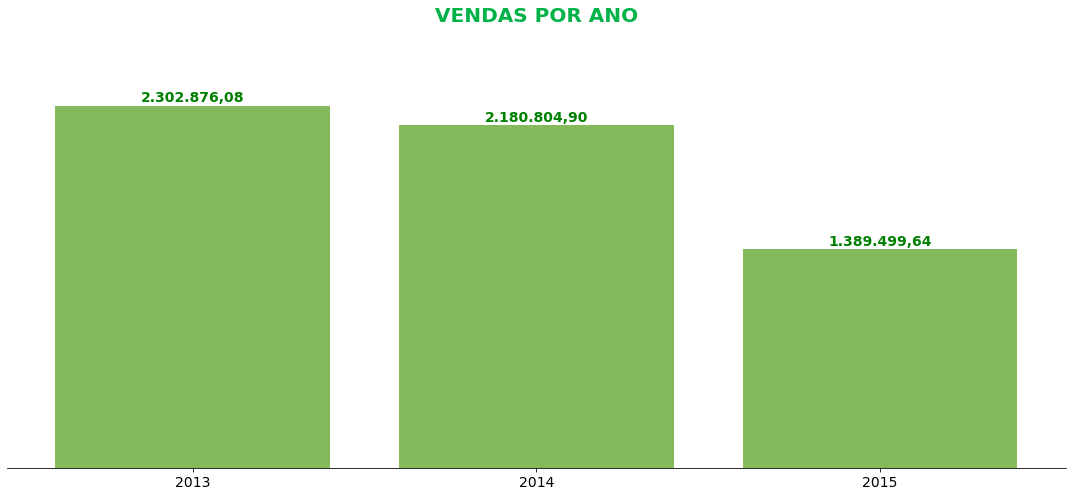

In [78]:
# Gráfico para saber o número das vendas por ano
fig,ax = plt.subplots( figsize = (15,7))

vendasAno = df4_sales_all.groupby('year')['sales'].sum()

ax.bar(vendasAno.index,vendasAno.values, color="#84ba5b" )

ax.set_title("VENDAS POR ANO", fontsize=20, fontweight='bold', color='#00b247' )

ax.xaxis.set_ticks([2013,2014,2015])
ax.tick_params(axis='x',labelsize=14)

for i in np.arange(0,3):
    ax.annotate('{:_.2f}'.format(vendasAno.values[i]/1000).replace('.',',').replace('_','.'),
                (vendasAno.index[i],vendasAno.values[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )

ax.yaxis.set_visible(False)
ax.set_facecolor("white")
ax.set_yticks(np.array([0,2800000000]))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [79]:
# O crescimento anual
crescimento = ((df4_sales_all.query("year == 2014")['sales'].sum()) / (df4_sales_all.query("year == 2013")['sales'].sum()))-1
print('Entre 2013 e 2014 nossas vendas cresceram {}%.'.format(round(crescimento*100)))

Entre 2013 e 2014 nossas vendas cresceram -5%.


In [80]:
# O crescimento anual
venda2014 = df4_sales_all.loc[ df4_sales_all.month <= 7]
crescimento = ((df4_sales_all.query("year == 2015")['sales'].sum()) / (venda2014.query("year == 2014")['sales'].sum()))-1
print('Entre 2014 e 2015 nossas vendas cresceram {}%.'.format(round(crescimento*100)))

Entre 2014 e 2015 nossas vendas cresceram 6%.


**Nota:**
- Temos uma queda nas vendas ao decorrer dos anos, que precisa ser analisado, para não afetar as vendas de 2015.
- Mas comparando o mesmo período de meses entre 2014 e 2015 temos um aumento de 6%.

#### Total de vendas ano e mês

In [81]:
aux2 = df4_sales_all[['year', 'month', 'sales']].groupby(['year','month'] ).sum().reset_index()

In [82]:
aux3= aux2.pivot( index='month', columns='year', values='sales' )
aux3

year,2013,2014,2015
month,,,
1,180132207.0,187752787.0,198843730.0
2,171534275.0,178924677.0,178275458.0
3,201180369.0,193019854.0,205631683.0
4,183431432.0,194544977.0,197918886.0
5,185411063.0,194693257.0,189143897.0
6,180702351.0,190047051.0,207363373.0
7,208843882.0,173892707.0,212322616.0
8,198042727.0,163748475.0,NaN
9,178053963.0,164516168.0,NaN


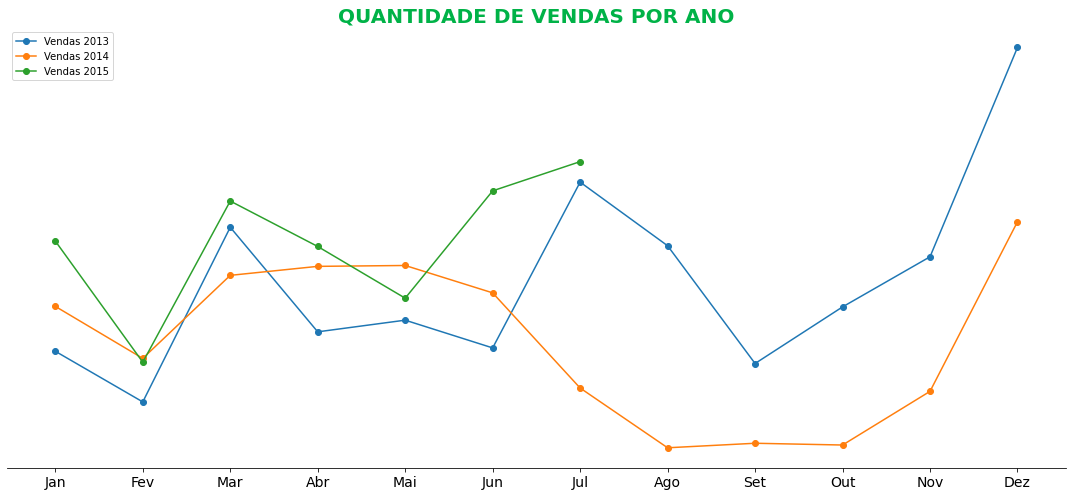

In [83]:
# Gráfico das vendas por ano
fig, ax = plt.subplots(figsize=(15,7))

vendas_2013 = df4_sales_all[df4_sales_all.year == 2013].groupby('month')['sales'].sum()
vendas_2014 = df4_sales_all[df4_sales_all.year == 2014].groupby('month')['sales'].sum()
vendas_2015 = df4_sales_all[df4_sales_all.year == 2015].groupby('month')['sales'].sum()

ax.plot(vendas_2013.index,vendas_2013.values, label='Vendas 2013', marker = 'o')
ax.plot(vendas_2014.index,vendas_2014.values, label='Vendas 2014', marker = 'o')
ax.plot(vendas_2015.index,vendas_2015.values, label='Vendas 2015', marker = 'o')
    
ax.set_title("QUANTIDADE DE VENDAS POR ANO",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14)

ax.legend()

plt.show()

**Nota:**
- No no de 2015 até o mês de julho temos um crescimento de 6%, mas seria importante analisar o comportamento das vendas de 2014, para compreender o motivo da queda das vendas.

#### Total de vendas ano e mês - agrupado

In [84]:
soma_mes = df4_sales_all.groupby(['month','year'])['sales'].sum().reset_index().sort_values('sales', ascending=False)
soma_mes = soma_mes
soma_mes.head()

,month,year,sales
29,12,2013,231710561
20,7,2015,212322616
18,7,2013,208843882
17,6,2015,207363373
8,3,2015,205631683


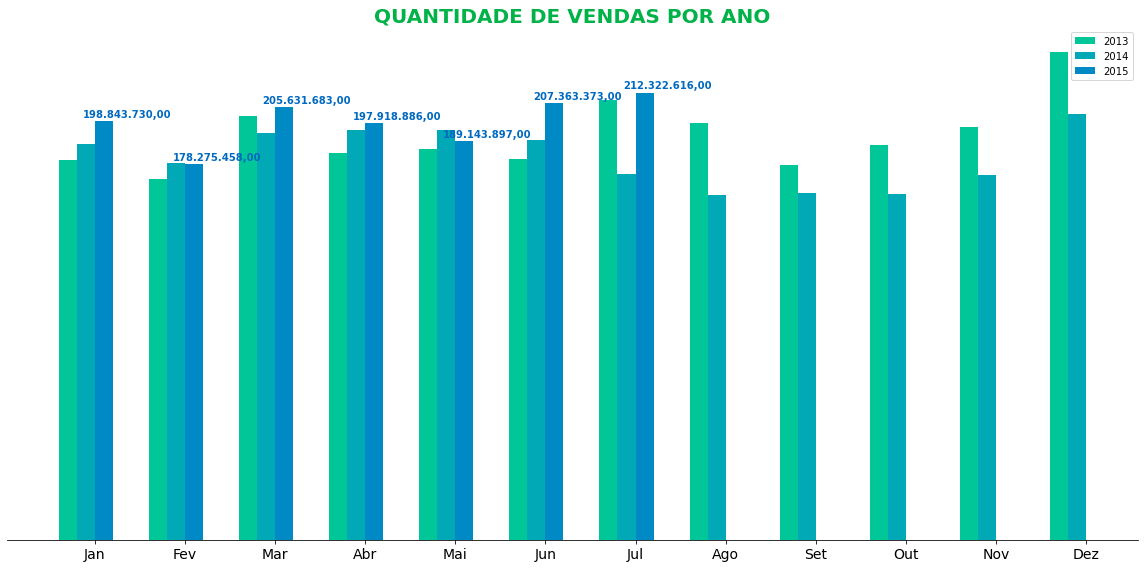

In [85]:
# Gráfico das vendas por ano
fig,ax = plt.subplots(figsize = (16,8))

wid = 0.2

ax.bar(soma_mes[soma_mes.year == 2013].month.values-wid-wid/2,
       soma_mes[soma_mes.year == 2013].sales.values,
       color="#00c698",
       label=2013,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.year == 2014].month.values-wid/2, 
       soma_mes[soma_mes.year == 2014].sales.values,
       color="#00a9b5", 
       label=2014,
       width=wid 
      )

ax.bar(soma_mes[soma_mes.year == 2015].month.values+wid/2, 
       soma_mes[soma_mes.year == 2015].sales.values,
       color="#008ac5", 
       label=2015,
       width=wid 
      )

ax.set_title("QUANTIDADE DE VENDAS POR ANO",fontsize=20,fontweight='bold',color='#00b247')

ax.legend()

for i in np.arange(0,7):
    ax.annotate('{:_.2f}'.format(soma_mes[soma_mes.year == 2015].sales.values[i]).replace('.',',').replace('_','.'),
                (soma_mes[soma_mes.year == 2015].month.values[i]+wid+wid/2,soma_mes[soma_mes.year == 2015].sales.values[i]),
                ha="center",
                va="top", 
                xytext=(5,12),
                textcoords="offset points", 
                fontsize=10,
                fontweight='bold',
                color="#0069c0"
            )
    
ax.yaxis.set_visible(False)

ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14)
    
plt.show()

**Nota:**
- Podemos perceber que no mês de fevereiro em todos os anos as vendas cairam.
- No ano de 2015 houve uma queda entre os meses de abril e maio que teve um comportamento diferente em relação ao mesmo perído dos outros anos.
- No ano de 2014 depois do mês de junho, a performance das vendas foi muito inferior em relação ao ano de 2013.

#### Soma das vendas por mês

In [86]:
df4_sales_all.groupby('month')['sales'].mean().reset_index().sort_values('sales',ascending=False)

,month,sales
11,12,8608.956661
10,11,7188.554250
4,5,7106.808038
3,4,7046.659509
5,6,7001.402127
2,3,6976.817749
6,7,6953.575827
7,8,6649.229053
9,10,6602.967255
1,2,6589.494012


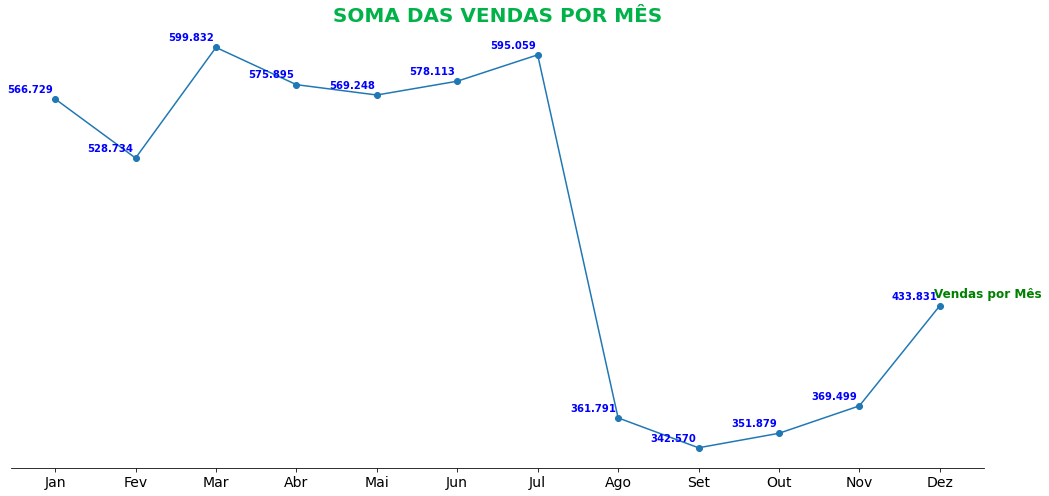

In [87]:
# Gráfico para visualizar a soma das vendas por mês
fig, ax = plt.subplots(figsize=(15,7))

vendasMeses = df4_sales_all.groupby('month')['sales'].sum()

ax.plot(vendasMeses.index,vendasMeses.values, label='Vendas por Mês', marker = 'o')

for i in np.arange(0,12):
    ax.annotate('{:_.0f}'.format(vendasMeses.values[i]/1000).replace('.',',').replace('_','.'),
                (vendasMeses.index[i],vendasMeses.values[i]),
                ha="center",
                va="top",
                xytext=(-25,+15),
                textcoords="offset points",
                fontsize=10,
                fontweight='bold',
                color='blue'
               )

ax.set_title("SOMA DAS VENDAS POR MÊS",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14)

ax.annotate('Vendas por Mês', 
            (i,vendasMeses.values[11]),
            ha="left", 
            va="center",
            xytext=(75,12),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )

plt.show()

**Nota:**
- Por meio deste gráfico podemos perceber que no mês de novembro e dezembro segue uma sequência de aumento das vendas que pode ser explicada pela Black Friday e Natal, com está visualização a empresa pode fazer um planejamento de qual mês é mais importante para empresa para deixar preparado o estoque.

#### Soma das vendas por dia

In [88]:
df4_sales_all.groupby('day')['sales'].mean().reset_index().sort_values('sales',ascending=False)

,day,sales
29,30,8355.098655
0,1,8054.505835
1,2,7987.998803
2,3,7765.916826
3,4,7746.632622
30,31,7577.710796
4,5,7556.054806
28,29,7514.074032
17,18,7340.772490
15,16,7314.330149


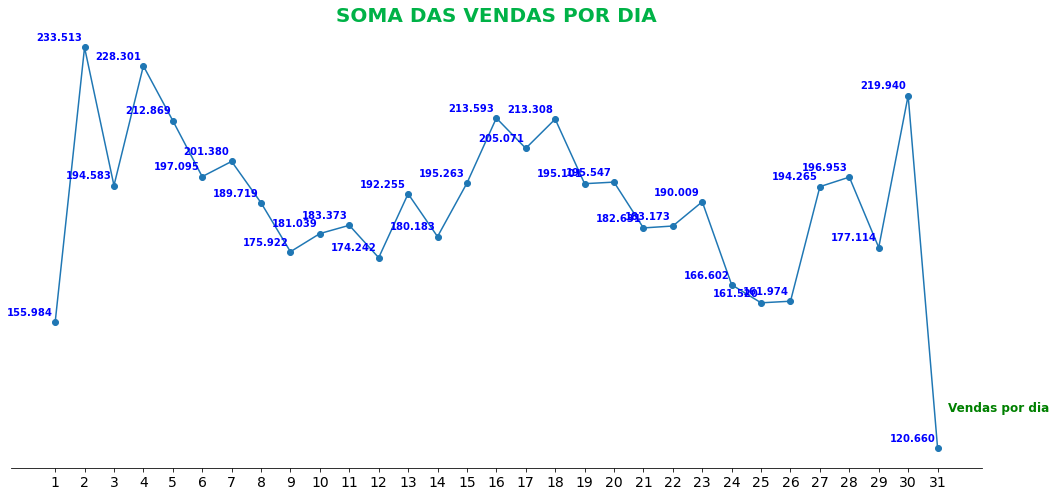

In [89]:
# Gráfico para visualizar a soma das vendas por dia
fig, ax = plt.subplots(figsize=(15,7))

vendasDia = df4_sales_all.groupby('day')['sales'].sum()

ax.plot(vendasDia.index,vendasDia.values, label='Vendas por dia', marker = 'o')

for i in np.arange(0,31):
    ax.annotate('{:_.0f}'.format(vendasDia.values[i]/1000).replace('.',',').replace('_','.'),
                (vendasDia.index[i],vendasDia.values[i]),
                ha="center",
                va="top",
                xytext=(-25,+15),
                textcoords="offset points",
                fontsize=10,
                fontweight='bold',
                color='blue'
               )

ax.set_title("SOMA DAS VENDAS POR DIA",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,32))
ax.tick_params(axis='x',labelsize=14)

ax.annotate('Vendas por dia', 
            (i,vendasDia.values[11]),
            ha="left", 
            va="center",
            xytext=(40,-150),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )

plt.show()

**Nota:**
- Podemos perceber que as vendas no final do mês, apresenta uma queda bem acentuada nas vendas.

#### Soma das vendas por dia da semana

In [90]:
df4_sales_all.groupby('day_of_week')['sales'].sum().reset_index().sort_values('sales', ascending=False)

,day_of_week,sales
0,1,1130203012
1,2,1020411930
4,5,980555941
2,3,954962863
3,4,911177709
5,6,846317735
6,7,29551433


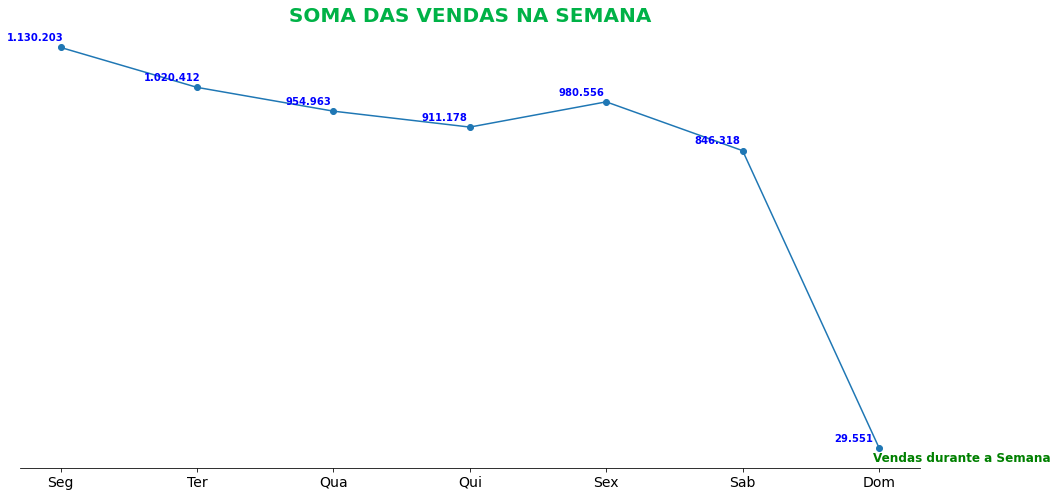

In [91]:
# Gráfico para visualizar a soma das vendas por dia da semana
fig, ax = plt.subplots(figsize=(15,7))

vendasFimSemana = df4_sales_all.groupby('day_of_week')['sales'].sum()

ax.plot(vendasFimSemana.index,vendasFimSemana.values, label='Vendas por dia', marker = 'o')

for i in np.arange(0,7):
    ax.annotate('{:_.0f}'.format(vendasFimSemana.values[i]/1000).replace('.',',').replace('_','.'),
                (vendasFimSemana.index[i],vendasFimSemana.values[i]),
                ha="center",
                va="top",
                xytext=(-25,+15),
                textcoords="offset points",
                fontsize=10,
                fontweight='bold',
                color='blue'
               )

ax.set_title("SOMA DAS VENDAS NA SEMANA",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,8))
ax.set_xticklabels(['Seg','Ter','Qua','Qui','Sex','Sab','Dom'])
ax.tick_params(axis='x',labelsize=14)

ax.annotate('Vendas durante a Semana', 
            (i,vendasFimSemana.values[6]),
            ha="left", 
            va="center",
            xytext=(130,-10),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )

plt.show()

**Nota:**
- Podemos ver que o menor pico de vendas é no domingo, esta é uma informação que precisa compreender melhor este comportamento.

### <font color='#F37126'> 4.3. Análise Bivariada

#### <font color='F37126'> Introdução:

Aqui procuramos saber como a variável impacta na variável resposta.
   - Básicamente é pegar o conjunto de dados e olhar, qual impacto desta variável na variável resposta e fazer isso para todas as variáveis.
   - Validar as hipótes.

#### Média de cliente que vão na loja por mês

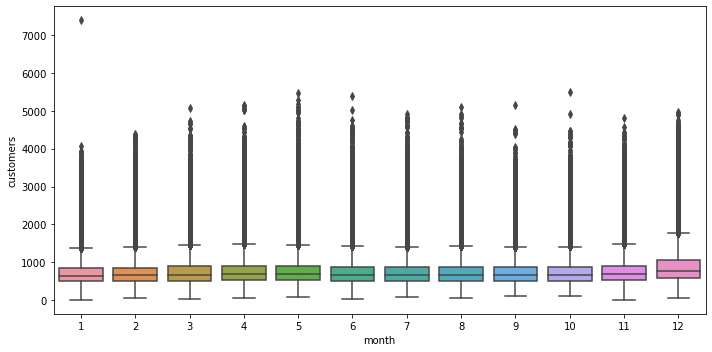

In [92]:
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.boxplot( x='month', y='customers', data=df4_sales_all );
plt.show()

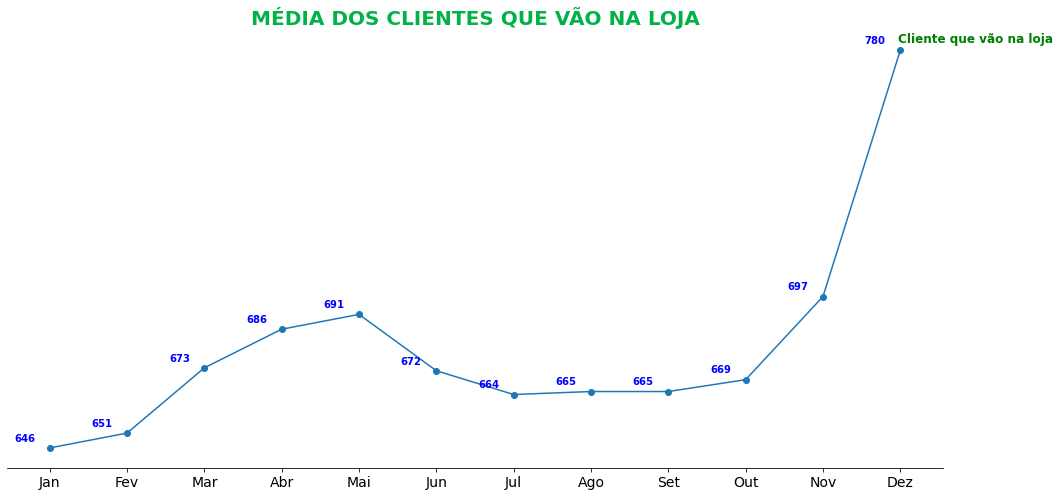

In [93]:
# Gráfico para visualizar o número de cliente que vão na loja por mês 
fig, ax = plt.subplots(figsize=(15,7))

vendasCliente = df4_sales_all.groupby('month')['customers'].median()

ax.plot(vendasCliente.index,vendasCliente.values, label='Clientes que vão na loja', marker = 'o')

for i in np.arange(0,12):
    ax.annotate('{:,.0f}'.format(vendasCliente.values[i]),
                (vendasCliente.index[i],vendasCliente.values[i]),
                ha="center",
                va="top",
                xytext=(-25,+15),
                textcoords="offset points",
                fontsize=10,
                fontweight='bold',
                color='blue'
               )

ax.set_title("MÉDIA DOS CLIENTES QUE VÃO NA LOJA",fontsize=20,fontweight='bold',color='#00b247')

ax.yaxis.set_visible(False)
ax.set_facecolor("white")
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13))
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax.tick_params(axis='x',labelsize=14)

ax.annotate('Cliente que vão na loja', 
            (i,vendasCliente.values[11]),
            ha="left", 
            va="center",
            xytext=(75,12),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )

plt.show()

**Nota:**
- O aumento da média de cliente no mês de novembro e dezembro pode ser explicado pela Black Friday e Natal, com está visualização a empresa pode fazer um planejamento de qual mês é mais importante para empresa para deixar preparado o estoque e os funcionários.

#### Média dos clientes em dias de promoção

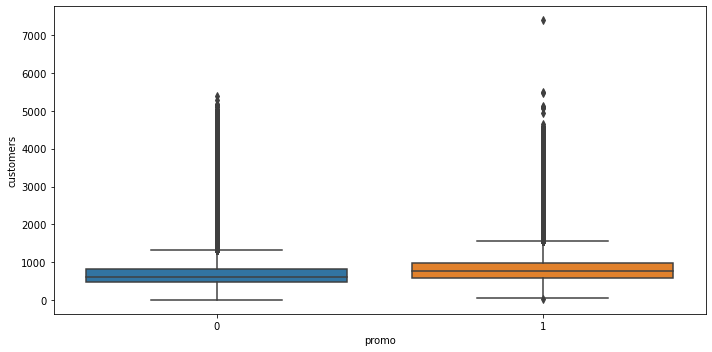

In [94]:
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.boxplot(x = 'promo', y = 'customers', data = df4_sales_all );
plt.show()

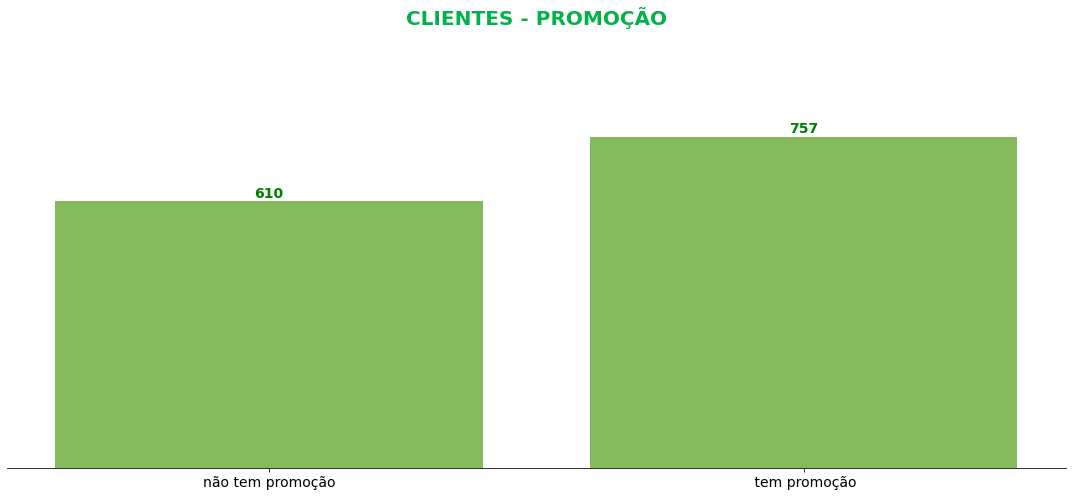

In [95]:
# Gráfico para saber se a promoção afeta o número de cliente
fig,ax = plt.subplots( figsize = (15,7))

clientePromocao = df4_sales_all.groupby('promo')['customers'].median()

ax.bar(clientePromocao.index,clientePromocao.values, color="#84ba5b" )

ax.set_title("CLIENTES - PROMOÇÃO", fontsize=20, fontweight='bold', color='#00b247' )

ax.xaxis.set_ticks([0,1])
ax.tick_params(axis='x',labelsize=14)

for i in np.arange(0,2):
    ax.annotate('{:,.0f}'.format(clientePromocao.values[i]),
                (clientePromocao.index[i],clientePromocao.values[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )
    
ax.set_yticks(np.array([0,1000]))
ax.yaxis.set_visible(False)
ax.set_facecolor("white")
ax.xaxis.set_ticks([0,1])
ax.set_xticklabels(['não tem promoção',' tem promoção'])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Nota:**
- Podemos afirmar que quando têm promoção o número de cliente não aumentam muito (147), porém o número de vendas aumenta consideravelmente, pode ser que vários clientes acabam combrando mais produtos.

#### Média das vendas em dias de promoção

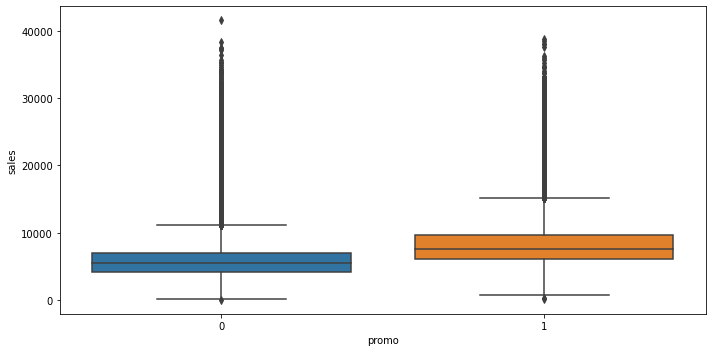

In [96]:
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.boxplot(x = 'promo', y = 'sales' , data = df4_sales_all);
plt.show()

In [97]:
df4_sales_all.groupby('promo')['sales'].median()

promo
0    5459.0
1    7650.0
Name: sales, dtype: float64

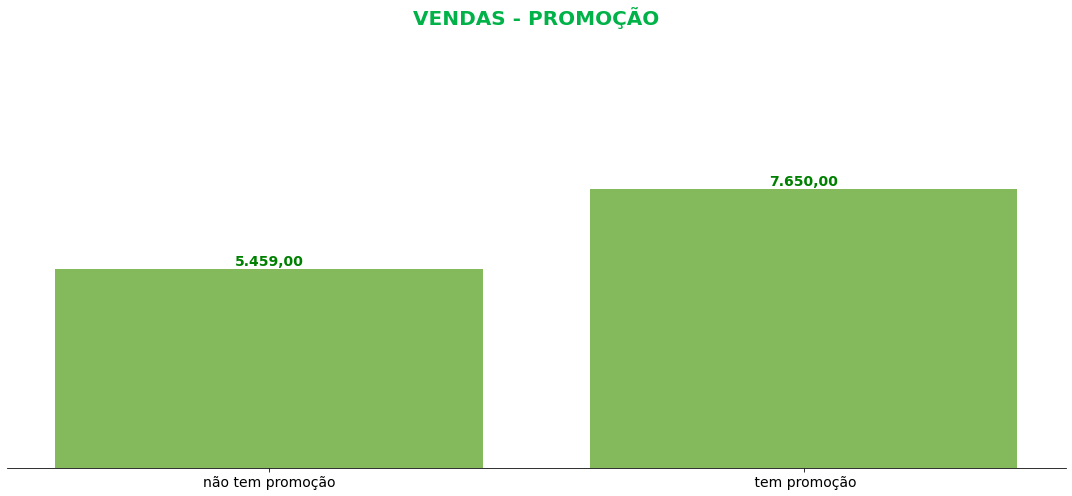

In [98]:
# Gráfico para saber se a promoção afeta as vendas
fig,ax = plt.subplots( figsize = (15,7))

vendasPromocao = df4_sales_all.groupby('promo')['sales'].median()

ax.bar(vendasPromocao.index,vendasPromocao.values, color="#84ba5b" )

ax.set_title("VENDAS - PROMOÇÃO", fontsize=20, fontweight='bold', color='#00b247' )

ax.xaxis.set_ticks([0,1])
ax.tick_params(axis='x',labelsize=14)

for i in np.arange(0,2):
    ax.annotate('{:_.2f}'.format(vendasPromocao.values[i]).replace('.',',').replace('_','.'),
                (vendasPromocao.index[i],vendasPromocao.values[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )
    
ax.set_yticks(np.array([0,12000]))
ax.yaxis.set_visible(False)
ax.set_facecolor("white")
ax.xaxis.set_ticks([0,1])
ax.set_xticklabels(['não tem promoção',' tem promoção'])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [99]:
# O crescimento
crescimento = ((df4_sales_all.query("promo == 1")['sales'].sum()) / (df4_sales_all.query("promo == 0")['sales'].sum()))-1
print('Com promoção a taxa de crescimento é de {}%.'.format(round(crescimento*100)))

Com promoção a taxa de crescimento é de 12%.


**Nota:**
- Podemos perceber que quando temos promoção na loja as vendas aumentam cerca de 12%.

#### O tipo de feriado que tem o maior impacto nas vendas

In [100]:
feriado = df4_sales_all[df4_sales_all['state_holiday'].isin(['public_holiday','easter_holiday','christmas'])]

**Nota:**
- Retiramos os dias que não tem feriado porque o objetivo é verificar qual o tipo de feriado que tem o maior impacto nas vendas.

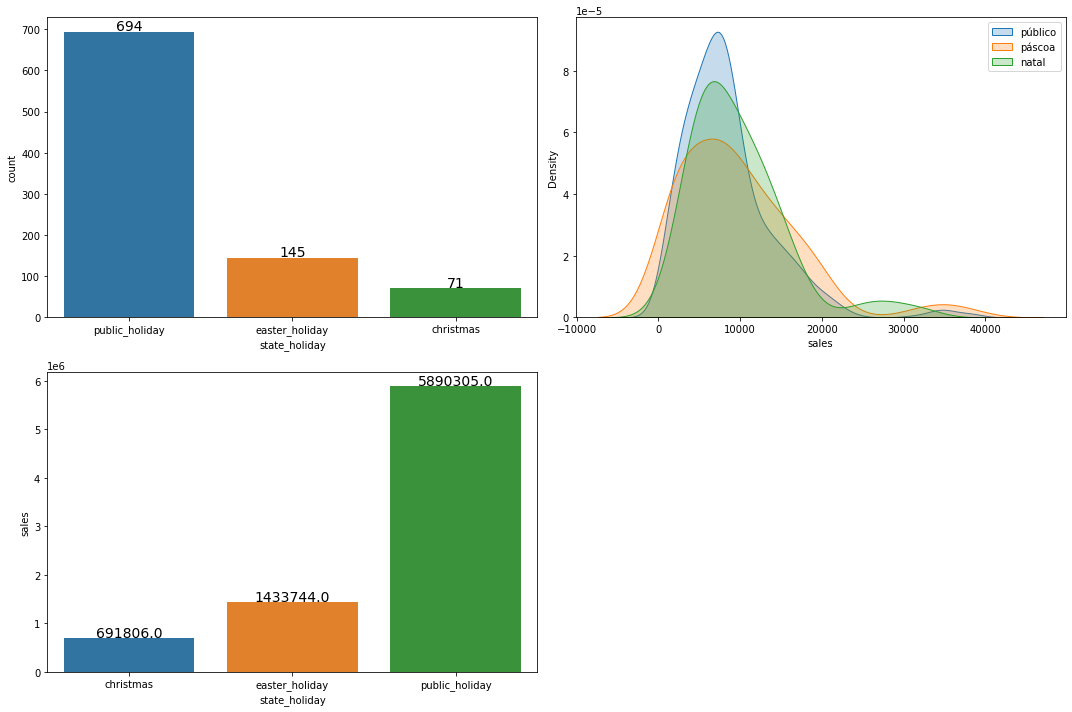

In [101]:
fig, ax = plt.subplots(figsize=(15, 10)) 

plt.subplot( 2, 2, 1 )
plot = sns.countplot(feriado['state_holiday'])
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=14,
                  color='black',xytext=(0,1),
                  textcoords='offset points')
    

plt.subplot( 2, 2, 2 )
sns.kdeplot( feriado[feriado['state_holiday'] == 'public_holiday']['sales'], label='público', shade=True )
sns.kdeplot( feriado[feriado['state_holiday'] == 'easter_holiday']['sales'], label='páscoa', shade=True )
sns.kdeplot( feriado[feriado['state_holiday'] == 'christmas']['sales'], label='natal', shade=True )
plt.legend()

plt.subplot( 2, 2, 3 )
x = feriado.groupby('state_holiday')['sales'].sum().reset_index()
plot = sns.barplot(data=x, x=x.state_holiday, y=x.sales,ci=False)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=14,
                  color='black',xytext=(0,1),
                  textcoords='offset points')

**Nota:**
- Podemos observar que temos uma quantidade de vendas muito maior no feriados público.
- O feriado de natal temos um volume de vendas menor, mas tem um pico muito maior que os feriados da páscoa.

Podemos dizer que está variável vai ser importante para o modelo.

#### O tipo de loja que tem o maior impacto nas vendas

In [102]:
df4_sales_all.groupby('store_type')['sales'].sum().reset_index().sort_values('sales', ascending=False)

,store_type,sales
0,a,3165334859
3,d,1765392943
2,c,783221426
1,b,159231395


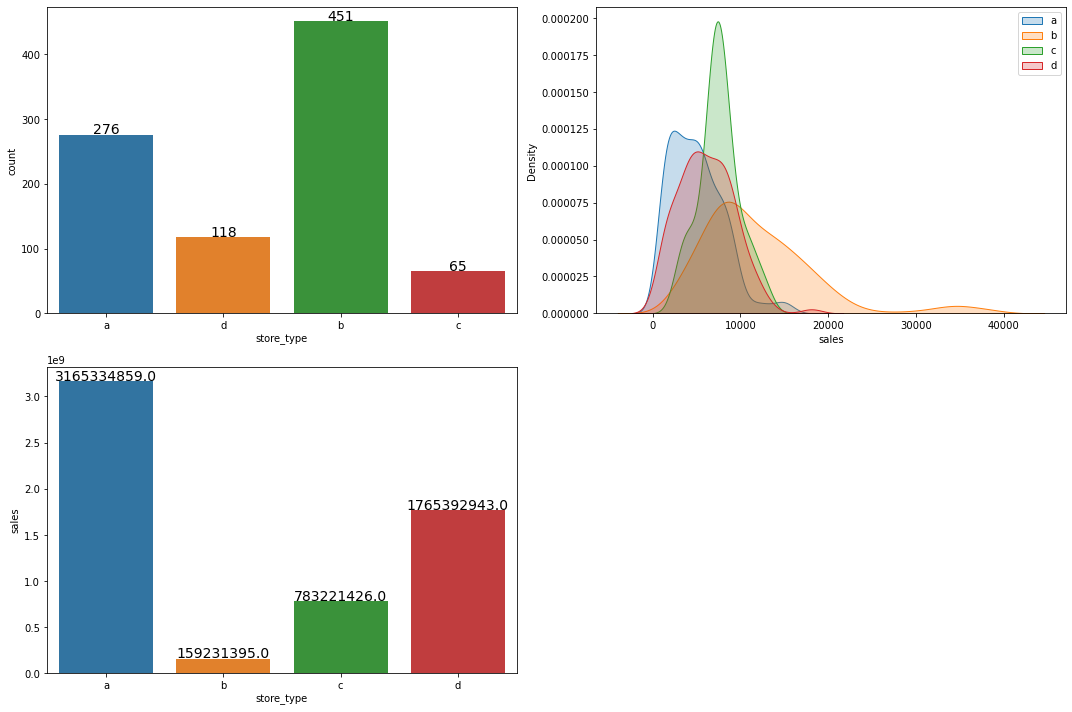

In [103]:
fig, ax = plt.subplots(figsize=(15, 10)) 

plt.subplot( 2, 2, 1 )
plot = sns.countplot(feriado['store_type'])
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=14,
                  color='black',xytext=(0,1),
                  textcoords='offset points')
    

plt.subplot( 2, 2, 2 )
sns.kdeplot( feriado[feriado['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( feriado[feriado['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( feriado[feriado['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( feriado[feriado['store_type'] == 'd']['sales'], label='d', shade=True )
plt.legend()

plt.subplot( 2, 2, 3 )
x = df4_sales_all.groupby('store_type')['sales'].sum().reset_index()
plot = sns.barplot(data=x, x=x.store_type, y=x.sales,ci=False)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=14,
                  color='black',xytext=(0,1),
                  textcoords='offset points')

**Nota:**
- Lojas do tipo 'a', tem uma quantidade de vendas maior que as demais lojas.
- Lojas do tipo 'c', tem uma alta concentração.

#### O tipo de nível de sortimento que tem o maior impacto nas vendas

In [104]:
df4_sales_all.groupby('assortment')['sales'].sum().reset_index().sort_values('sales', ascending=False)

,assortment,sales
0,basic,2945750070
1,extended,2856484241
2,extra,70946312


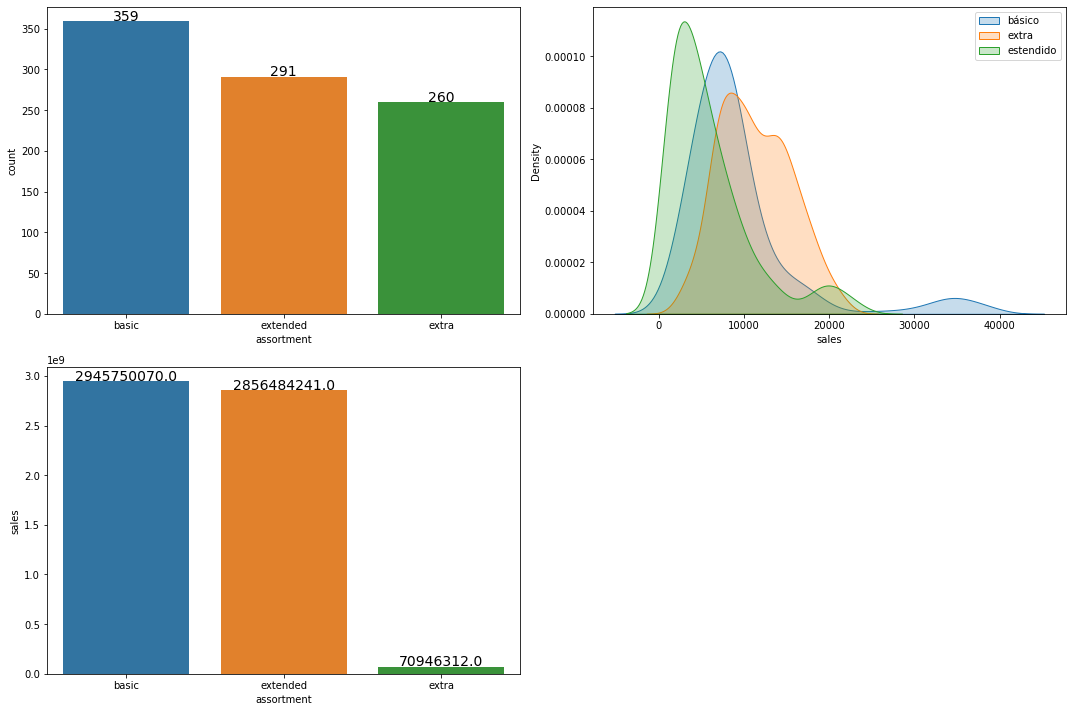

In [105]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.subplot( 2, 2, 1 )
plot = sns.countplot(feriado['assortment'])
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=14,
                  color='black',xytext=(0,1),
                  textcoords='offset points')
    

plt.subplot( 2, 2, 2 )
sns.kdeplot( feriado[feriado['assortment'] == 'basic']['sales'], label='básico', shade=True )
sns.kdeplot( feriado[feriado['assortment'] == 'extra']['sales'], label='extra', shade=True )
sns.kdeplot( feriado[feriado['assortment'] == 'extended']['sales'], label='estendido', shade=True )
plt.legend()

plt.subplot( 2, 2, 3 )
x = df4_sales_all.groupby('assortment')['sales'].sum().reset_index()
plot = sns.barplot(data=x, x=x.assortment, y=x.sales,ci=False)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=14,
                  color='black',xytext=(0,1),
                  textcoords='offset points')

**Nota:**
- Tipo de assortment do nível 'básico', tem uma quantidade de vendas maior, mas o do tipo 'extra' vende muito pouco.

- Assortment = descreve um nível de sortimento: 
    - a = básico
    - b = extra
    - c = estendido

#### <font color = 'red'> Validando as hipóteses

##### **H1.** Lojas com maior sortimentos deveriam vender mais.
**FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS.

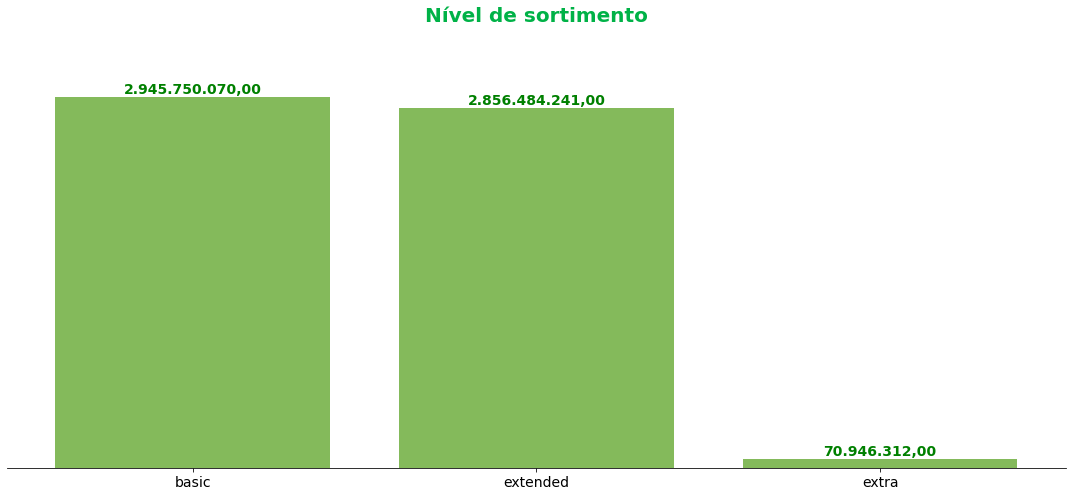

In [106]:
# Gráfico nível de sortimento
fig,ax = plt.subplots( figsize = (15,7))

x = df4_sales_all.groupby('assortment')['sales'].sum()

ax.bar(x.index,x.values, color="#84ba5b" )

ax.set_title("Nível de sortimento", fontsize=20, fontweight='bold', color='#00b247' )

ax.tick_params(axis='x',labelsize=14)

for i in np.arange(0,3):
    ax.annotate('{:_.2f}'.format(x.values[i]).replace('.',',').replace('_','.'),
                (x.index[i],x.values[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )

ax.yaxis.set_visible(False)
ax.set_facecolor("white")
ax.set_yticks(np.array([0,3500000000]))
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

##### **H2.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.

In [107]:
aux1 = df4_sales_all[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

# Agregar os valores dentro de grupos para visualizar melhor a distância entre os competidores
bins = list( np.arange( 0, 20000, 1000) ) # fazer grupos de 1000 em 1000

# Divisão dos valores entre os grupos
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'],bins=bins)
aux1.sample(4)

,competition_distance,sales,competition_distance_binned
400,6620.0,5718290,"(6000, 7000]"
371,5630.0,3412446,"(5000, 6000]"
430,7840.0,4008491,"(7000, 8000]"
362,5350.0,7337786,"(5000, 6000]"


In [108]:
# Somar as vendas dentro dos grupos
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

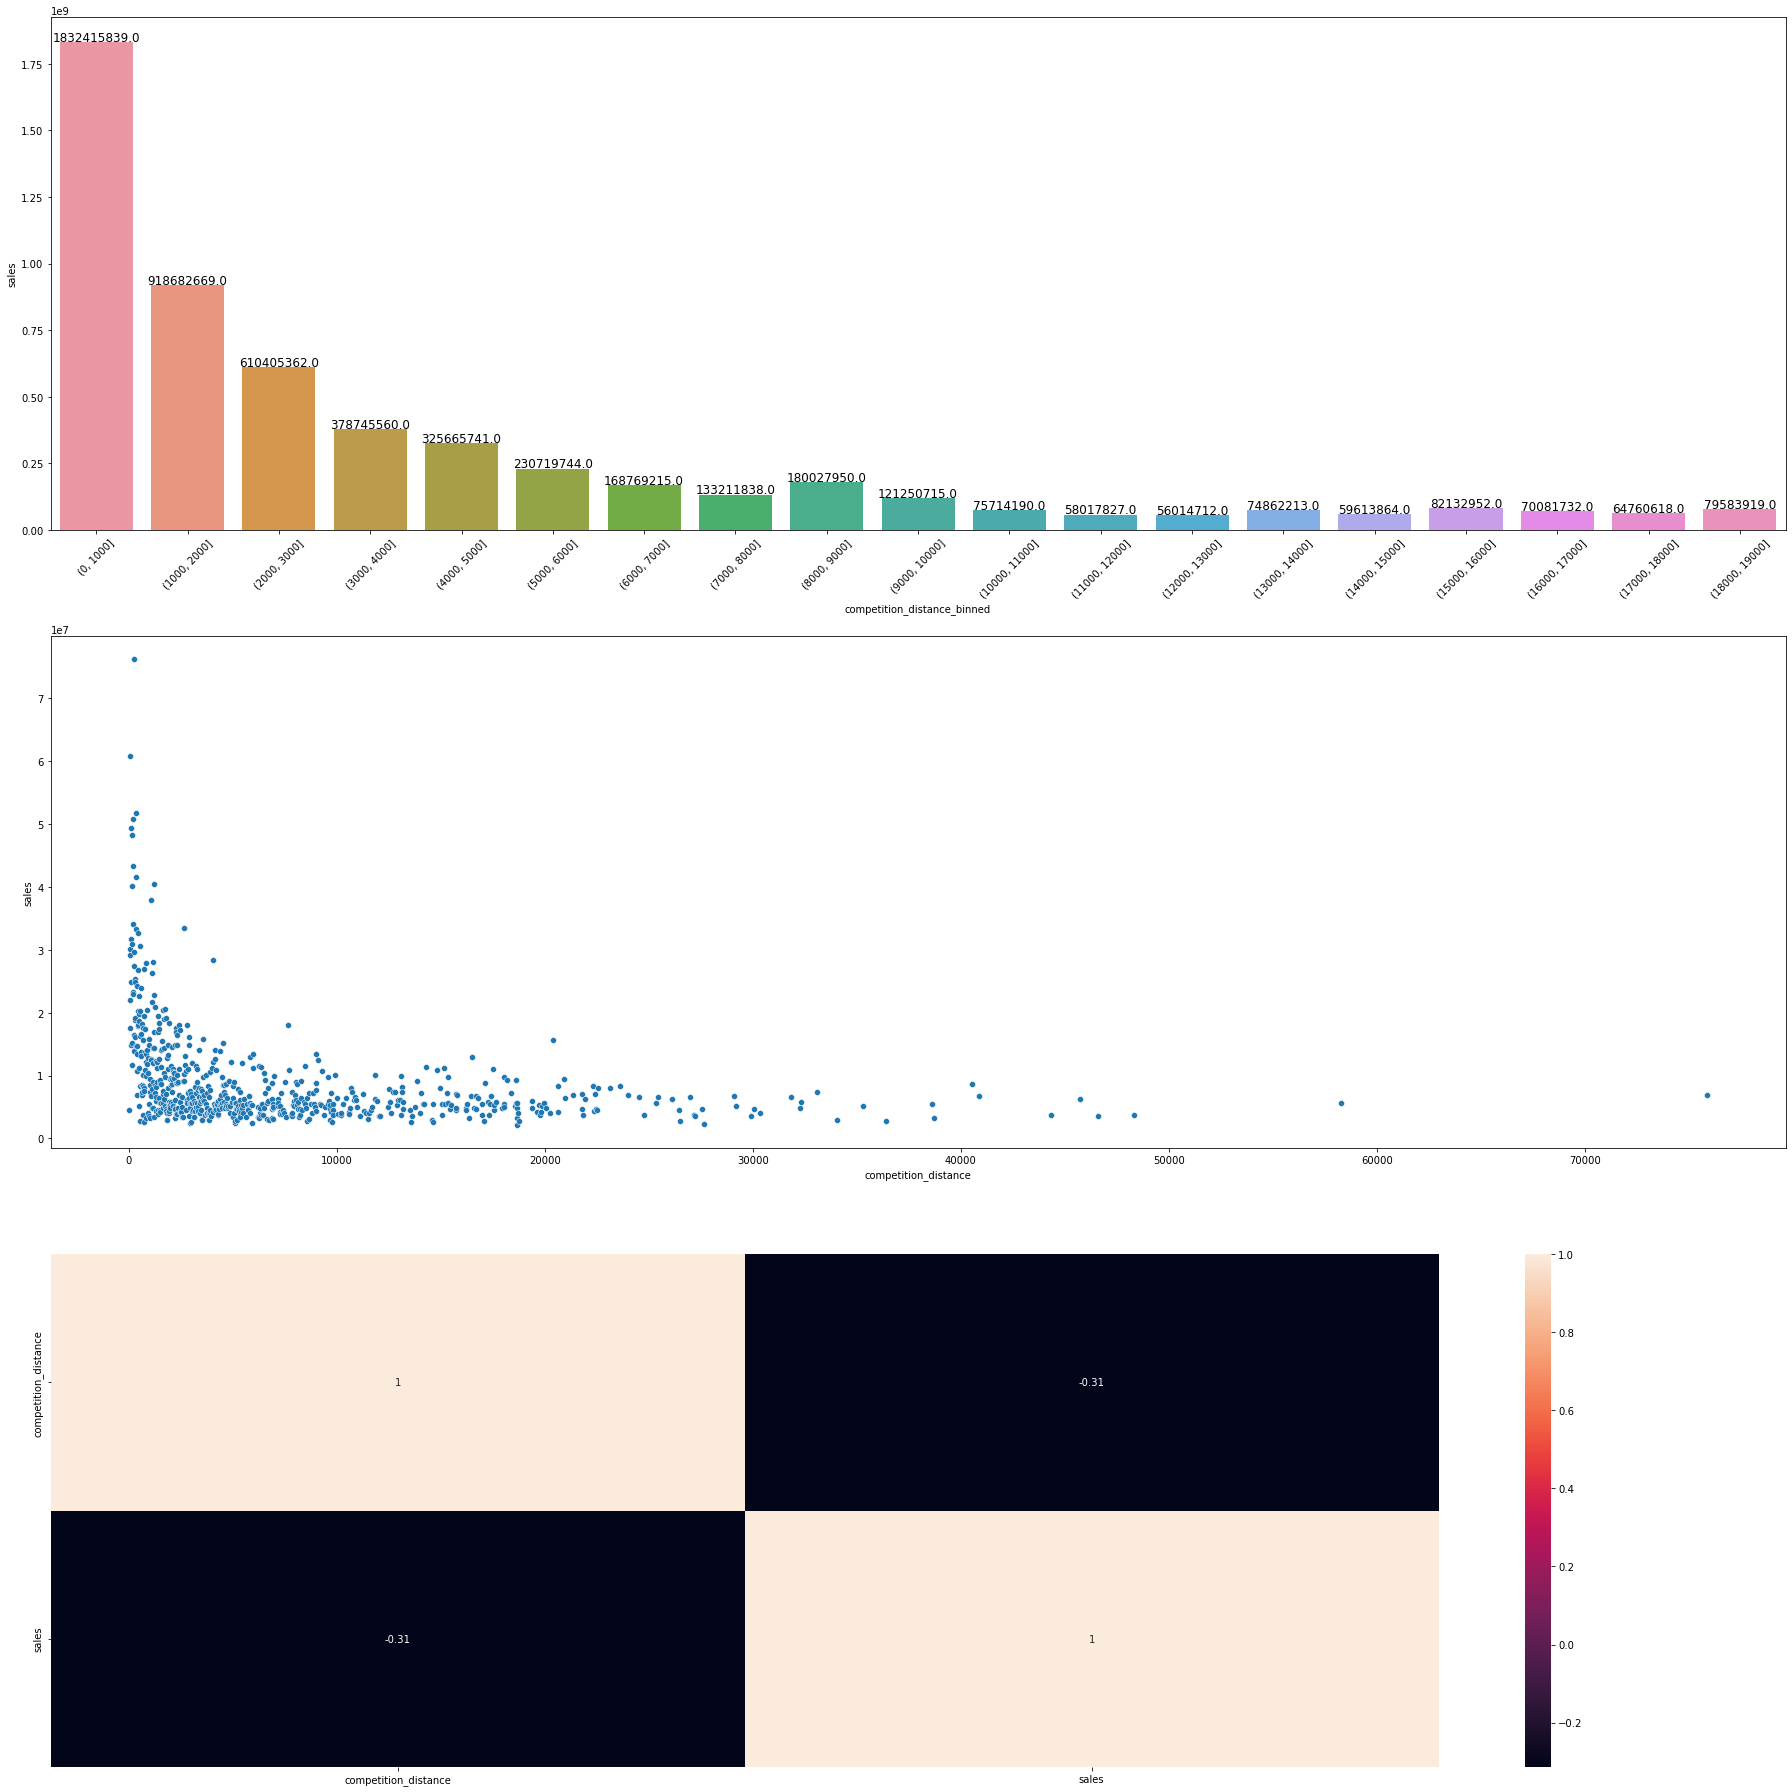

In [109]:
fig, ax = plt.subplots(figsize=(25, 25)) 

plt.subplot( 3, 1, 1 )
plot = sns.barplot(data=aux2, x='competition_distance_binned', y='sales',ci=False)
plt.xticks( rotation=45)
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black',xytext=(0,1),
                  textcoords='offset points')
    

plt.subplot( 3, 1, 2 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

plt.subplot( 3, 1, 3 )
aux1 = df4_sales_all[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
correlations = aux1.corr()
sns.heatmap(correlations, annot = True);

**Nota:**
- Temos um volume maior de vendas dentro do bin de (0-1000)
- O segundo volume maior de vendas está dentro do bin de (1000-2000)
- Temos uma correlação fraca, pode ser relevante para o modelo mas com uma relevância fraca

##### <s>**H5.** Lojas com mais dias de promoção deveriam vender mais.</s>

##### **H7.** Lojas com mais promoções consecutivas deveriam vender mais.
**FALSA** Lojas com mais promocoes consecutivas vendem menos

In [110]:
df4_sales_all[['promo', 'promo2', 'sales']].groupby( ['promo', 'promo2'] ).sum().reset_index().sort_values('sales', ascending=False)

,promo,promo2,sales
2,1,0,1628930532
0,0,0,1482612096
3,1,1,1472275754
1,0,1,1289362241


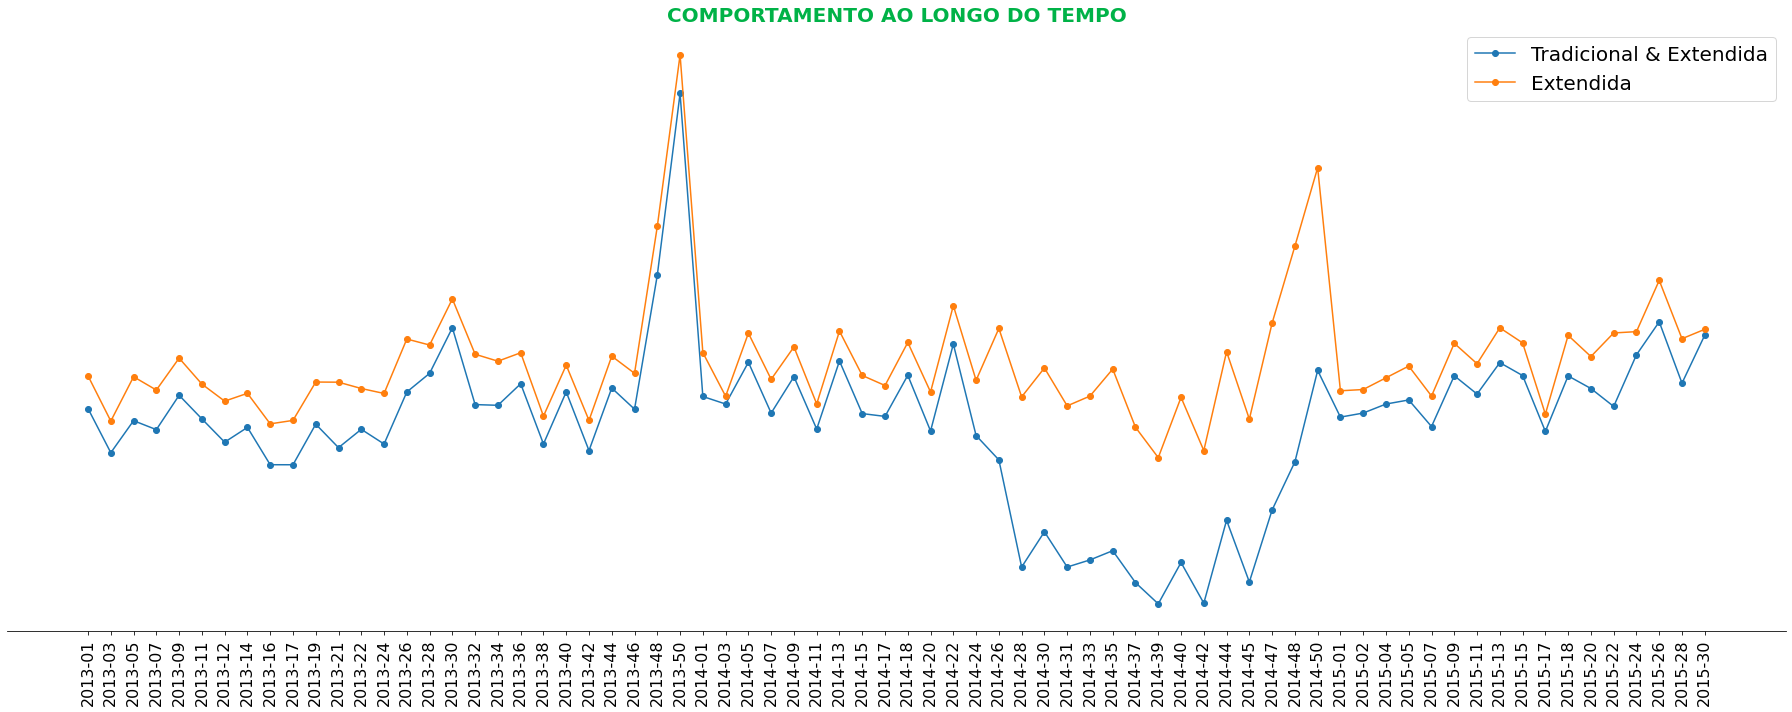

In [111]:
# Gráfico para visualizar o comportamento das vendas em promoção ao longo do tempo
fig, ax = plt.subplots(figsize=(25,10))

aux1 = df4_sales_all[(df4_sales_all['promo'] == 1) & (df4_sales_all['promo2'] == 1)][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()
aux2 = df4_sales_all[(df4_sales_all['promo'] == 1) & (df4_sales_all['promo2'] == 0)][['year_week', 'sales']].groupby( 'year_week' ).sum().reset_index()

ax.plot(aux1.year_week,aux1.sales, label='Tradicional & Extendida', marker = 'o')
ax.plot(aux2.year_week,aux2.sales, label='Extendida', marker = 'o')


ax.set_title("COMPORTAMENTO AO LONGO DO TEMPO",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
plt.xticks( rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=16)

plt.legend(facecolor="white",fontsize=20)

plt.show()

**Nota:**
- O Menor volume de venda foi quando a loja só participou da 'promo2'.
- As lojas que participaram das duas promoções venderam bem.
- As lojam que não participaram de nenhuma promoção vederam legal.
- E as que participaram só da promo 1, venderam muito mais.

**Não tem muita vantagem de particiopar de promoções extendida.**

##### **H8.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA** Lojas abertas durante o feriado do Natal vendem menos.

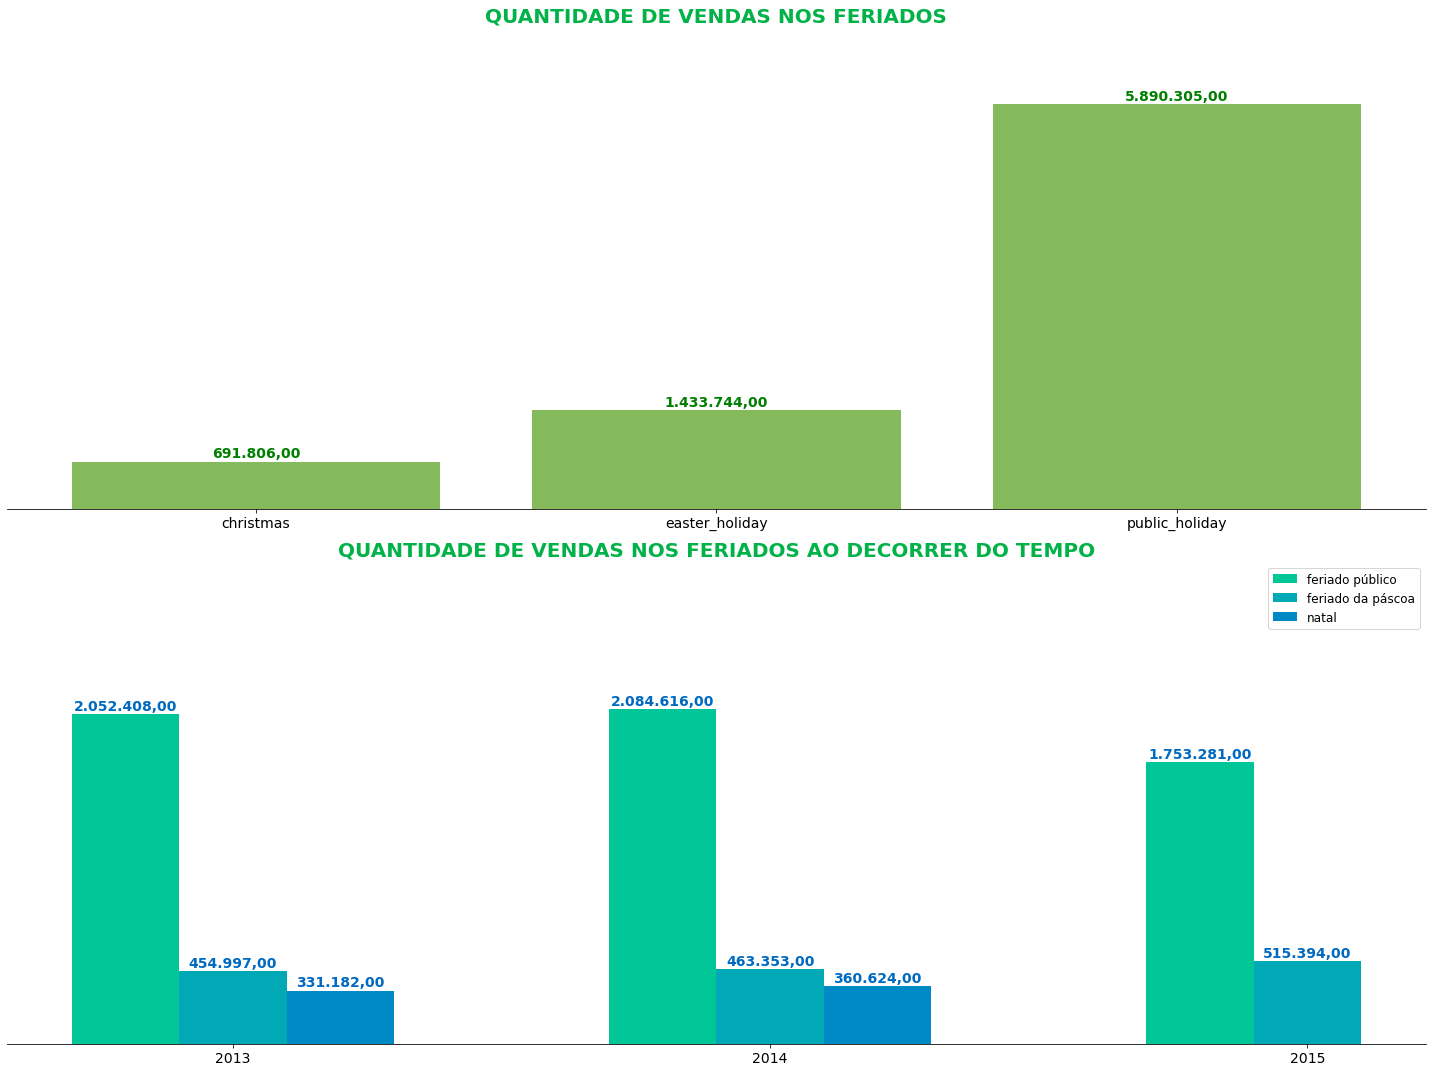

In [112]:
# Gráfico para visualizar o comportamento das vendas no feriado
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,15))

feriado = df4_sales_all[df4_sales_all['state_holiday'].isin(['public_holiday','easter_holiday','christmas'])]
aux2 = feriado[['state_holiday','sales']].groupby( 'state_holiday' ).sum().reset_index()
aux1 = feriado[['year','state_holiday','sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()

ax[0].bar(aux2.state_holiday,aux2.sales, color="#84ba5b" )

ax[0].set_title("QUANTIDADE DE VENDAS NOS FERIADOS", fontsize=20, fontweight='bold', color='#00b247' )

for i in np.arange(0,3):
    ax[0].annotate('{:_.2f}'.format(aux2.sales[i]).replace('.',',').replace('_','.'),
                (aux2.state_holiday[i],aux2.sales[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )

ax[0].yaxis.set_visible(False)
ax[0].set_facecolor("white")
ax[0].set_yticks(np.array([0,7000000]))
ax[0].tick_params(axis='x',labelsize=14)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)


wid = 0.2

ax[1].bar(aux1[aux1.state_holiday == 'public_holiday'].year.values-wid,
       aux1[aux1.state_holiday == 'public_holiday'].sales.values,
       color="#00c698",
       label='feriado público',
       width=wid 
      )
ax[1].bar(aux1[aux1.state_holiday == 'easter_holiday'].year.values, 
       aux1[aux1.state_holiday == 'easter_holiday'].sales.values,
       color="#00a9b5", 
       label='feriado da páscoa',
       width=wid 
      )

ax[1].bar(aux1[aux1.state_holiday == 'christmas'].year.values+wid, 
       aux1[aux1.state_holiday == 'christmas'].sales.values,
       color="#008ac5", 
       label='natal',
       width=wid 
      )

ax[1].set_title("QUANTIDADE DE VENDAS NOS FERIADOS AO DECORRER DO TEMPO",fontsize=20,fontweight='bold',color='#00b247')

ax[1].legend(facecolor="white",fontsize=12)
    
for i in np.arange(0,3):
    ax[1].annotate('{:_.2f}'.format(aux1[aux1.state_holiday == 'public_holiday'].sales.values[i]).replace('.',',').replace('_','.'), 
                (aux1[aux1.state_holiday == 'public_holiday'].year.values[i]-wid,aux1[
                    aux1.state_holiday == 'public_holiday'].sales.values[i]), 
                ha="center", va="top", xytext=(0,+15), textcoords="offset points", 
                fontsize=14, fontweight='bold', color="#0069c0")
    ax[1].annotate('{:_.2f}'.format(aux1[aux1.state_holiday == 'easter_holiday'].sales.values[i]).replace('.',',').replace('_','.'), 
                (aux1[aux1.state_holiday == 'easter_holiday'].year.values[i],aux1[
                    aux1.state_holiday == 'easter_holiday'].sales.values[i]), 
                ha="center", va="top", xytext=(0,+15), textcoords="offset points", 
                fontsize=14, fontweight='bold', color="#0069c0")
    
for i in np.arange(0,2):
    ax[1].annotate('{:_.2f}'.format(aux1[aux1.state_holiday == 'christmas'].sales.values[i]).replace('.',',').replace('_','.'), 
                (aux1[aux1.state_holiday == 'christmas'].year.values[i]+wid,aux1[
                    aux1.state_holiday == 'christmas'].sales.values[i]), 
                ha="center", va="top", xytext=(0,+15), textcoords="offset points", 
                fontsize=14, fontweight='bold', color="#0069c0") 

   
    
ax[1].yaxis.set_visible(False)

ax[1].set_facecolor("white")
ax[1].set_yticks(np.array([0,3000000]))
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].xaxis.set_ticks([2013,2014,2015])
ax[1].tick_params(axis='x',labelsize=14)
    
plt.show()

##### **H9.** Lojas deveriam vender mais ao longo dos anos.
**FALSA** Lojas vendem menos ao longo dos anos

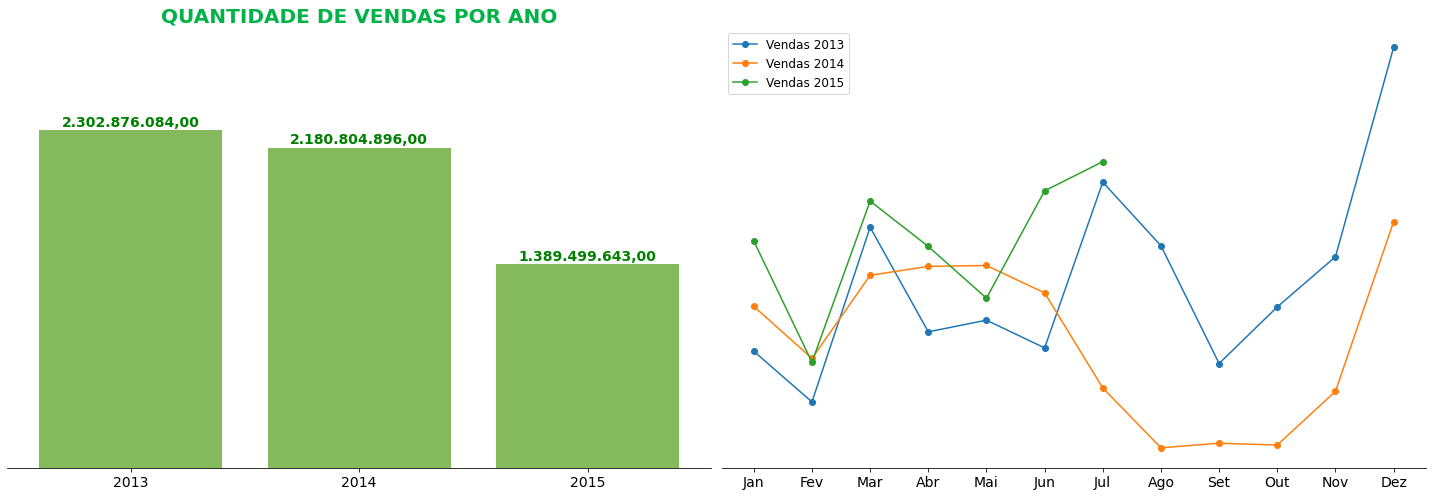

In [113]:
# Gráfico para saber o número das vendas por ano
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,7))

vendasAno = df4_sales_all.groupby('year')['sales'].sum()

ax[0].bar(vendasAno.index,vendasAno.values, color="#84ba5b" )

ax[0].set_title("QUANTIDADE DE VENDAS POR ANO", fontsize=20, fontweight='bold', color='#00b247' )

ax[0].xaxis.set_ticks([2013,2014,2015])
ax[0].tick_params(axis='x',labelsize=14)

for i in np.arange(0,3):
    ax[0].annotate('{:_.2f}'.format(vendasAno.values[i]).replace('.',',').replace('_','.'),
                (vendasAno.index[i],vendasAno.values[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )

ax[0].yaxis.set_visible(False)
ax[0].set_facecolor("white")
ax[0].set_yticks(np.array([0,3000000000]))
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)

vendas_2013 = df4_sales_all[df4_sales_all.year == 2013].groupby('month')['sales'].sum()
vendas_2014 = df4_sales_all[df4_sales_all.year == 2014].groupby('month')['sales'].sum()
vendas_2015 = df4_sales_all[df4_sales_all.year == 2015].groupby('month')['sales'].sum()

ax[1].plot(vendas_2013.index,vendas_2013.values, label='Vendas 2013', marker = 'o')
ax[1].plot(vendas_2014.index,vendas_2014.values, label='Vendas 2014', marker = 'o')
ax[1].plot(vendas_2015.index,vendas_2015.values, label='Vendas 2015', marker = 'o')
  
#ax[1].set_title("QUANTIDADE DE VENDAS POR ANO",fontsize=20,fontweight='bold',color='#00b247')

ax[1].set_facecolor("white")
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].xaxis.set_ticks(np.arange(1,13))
ax[1].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax[1].tick_params(axis='x',labelsize=14)

ax[1].legend(facecolor="white",fontsize=12)

plt.show()

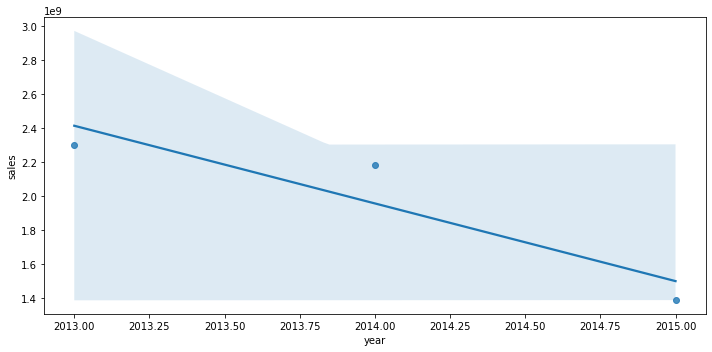

In [114]:
# Gráfico para saber tendência das vendas por ano
fig, ax = plt.subplots(figsize=(10, 5)) 
aux1 = df4_sales_all.groupby('year')['sales'].sum().reset_index()
sns.regplot( x='year', y='sales', data=aux1 );
plt.show()

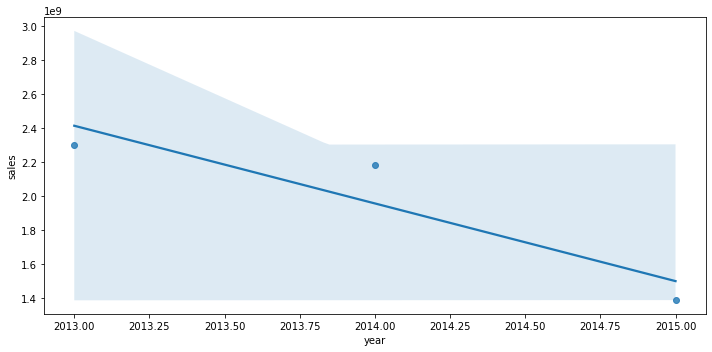

In [115]:
# Gráfico para saber tendência das vendas por ano
fig, ax = plt.subplots(figsize=(10, 5)) 
aux1 = df4_sales_all.groupby('year')['sales'].sum().reset_index()
sns.regplot( x='year', y='sales', data=aux1 );
plt.show()

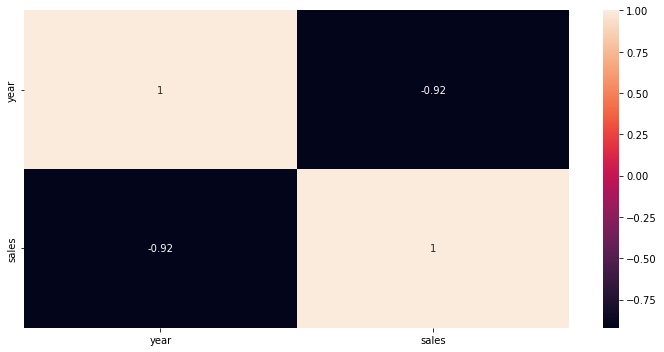

In [116]:
# Matriz de correlações
fig, ax = plt.subplots(figsize=(10, 5))
aux1 = df4_sales_all.groupby('year')['sales'].sum().reset_index()
correlations = aux1.corr()
sns.heatmap(correlations, annot = True);
plt.show()

**Nota:**
- Conforme os anos vão avançando as vendas vão caindo.
- Temos uma correlação alta negativa, pode ser relevante para o modelo.

##### **H10.** Lojas deveriam vender mais no segundo semestre do ano.
**FALSA** Lojas vendem menos no segundo semestre do ano

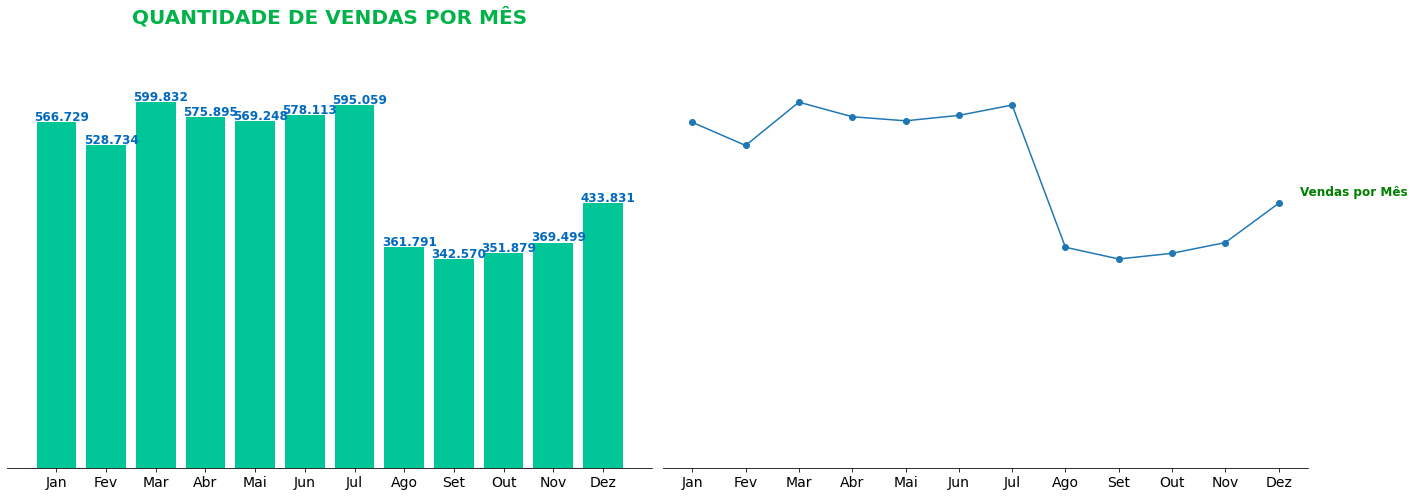

In [117]:
# Gráfico para visualizar as vendas por mês
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,7))

soma_mes = df4_sales_all.groupby('month')['sales'].sum()

ax[0].bar(soma_mes.index, soma_mes.values, color="#00c698")

ax[0].set_title("QUANTIDADE DE VENDAS POR MÊS",fontsize=20,fontweight='bold',color='#00b247')

for i in np.arange(0,12):
    ax[0].annotate('{:_.0f}'.format(soma_mes.values[i]/1000).replace('.',',').replace('_','.'),
                (soma_mes.index[i],soma_mes.values[i]),
                ha="center",
                va="top", 
                xytext=(5,12),
                textcoords="offset points", 
                fontsize=12,
                fontweight='bold',
                color="#0069c0"
            )
    
ax[0].yaxis.set_visible(False)

ax[0].set_facecolor("white")
ax[0].set_yticks(np.array([0,720000000]))
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].xaxis.set_ticks(np.arange(1,13))
ax[0].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax[0].tick_params(axis='x',labelsize=14)

vendasMeses = df4_sales_all.groupby('month')['sales'].sum()

ax[1].plot(vendasMeses.index,vendasMeses.values, label='Vendas por Mês', marker = 'o')

#ax[1].set_title("QUANTIDADE DE VENDAS POR MÊS",fontsize=20,fontweight='bold',color='#00b247')

ax[1].set_facecolor("white")
ax[1].set_yticks(np.array([0,720000000]))
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].xaxis.set_ticks(np.arange(1,13))
ax[1].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax[1].tick_params(axis='x',labelsize=14)

ax[1].annotate('Vendas por Mês', 
            (i,vendasMeses.values[11]),
            ha="left", 
            va="center",
            xytext=(75,12),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )
    
plt.show()

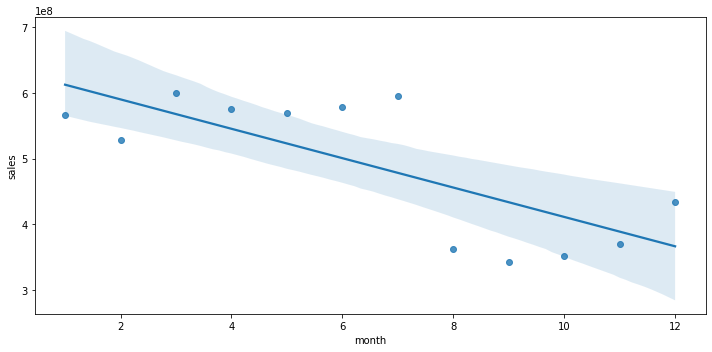

In [118]:
# Gráfico para saber tendência das vendas por mês
fig, ax = plt.subplots(figsize=(10, 5)) 
aux1 = df4_sales_all.groupby('month')['sales'].sum().reset_index()
sns.regplot( x='month', y='sales', data=aux1 );
plt.show()

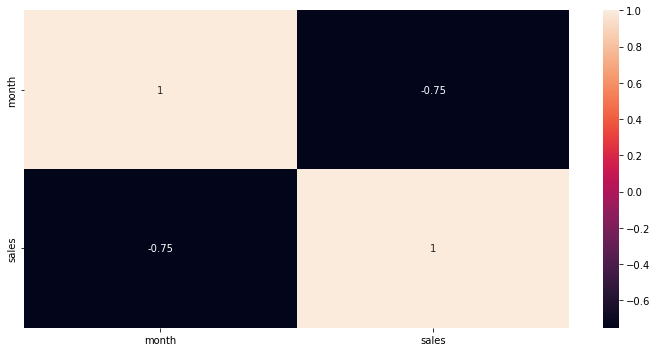

In [119]:
# Matriz de correlações
fig, ax = plt.subplots(figsize=(10, 5))
aux1 = df4_sales_all.groupby('month')['sales'].sum().reset_index()
correlations = aux1.corr()
sns.heatmap(correlations, annot = True);
plt.show()

**Nota:**
- Temos uma correlação alta negativa, pode ser relevante para o modelo.

##### **H11.** Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mes.

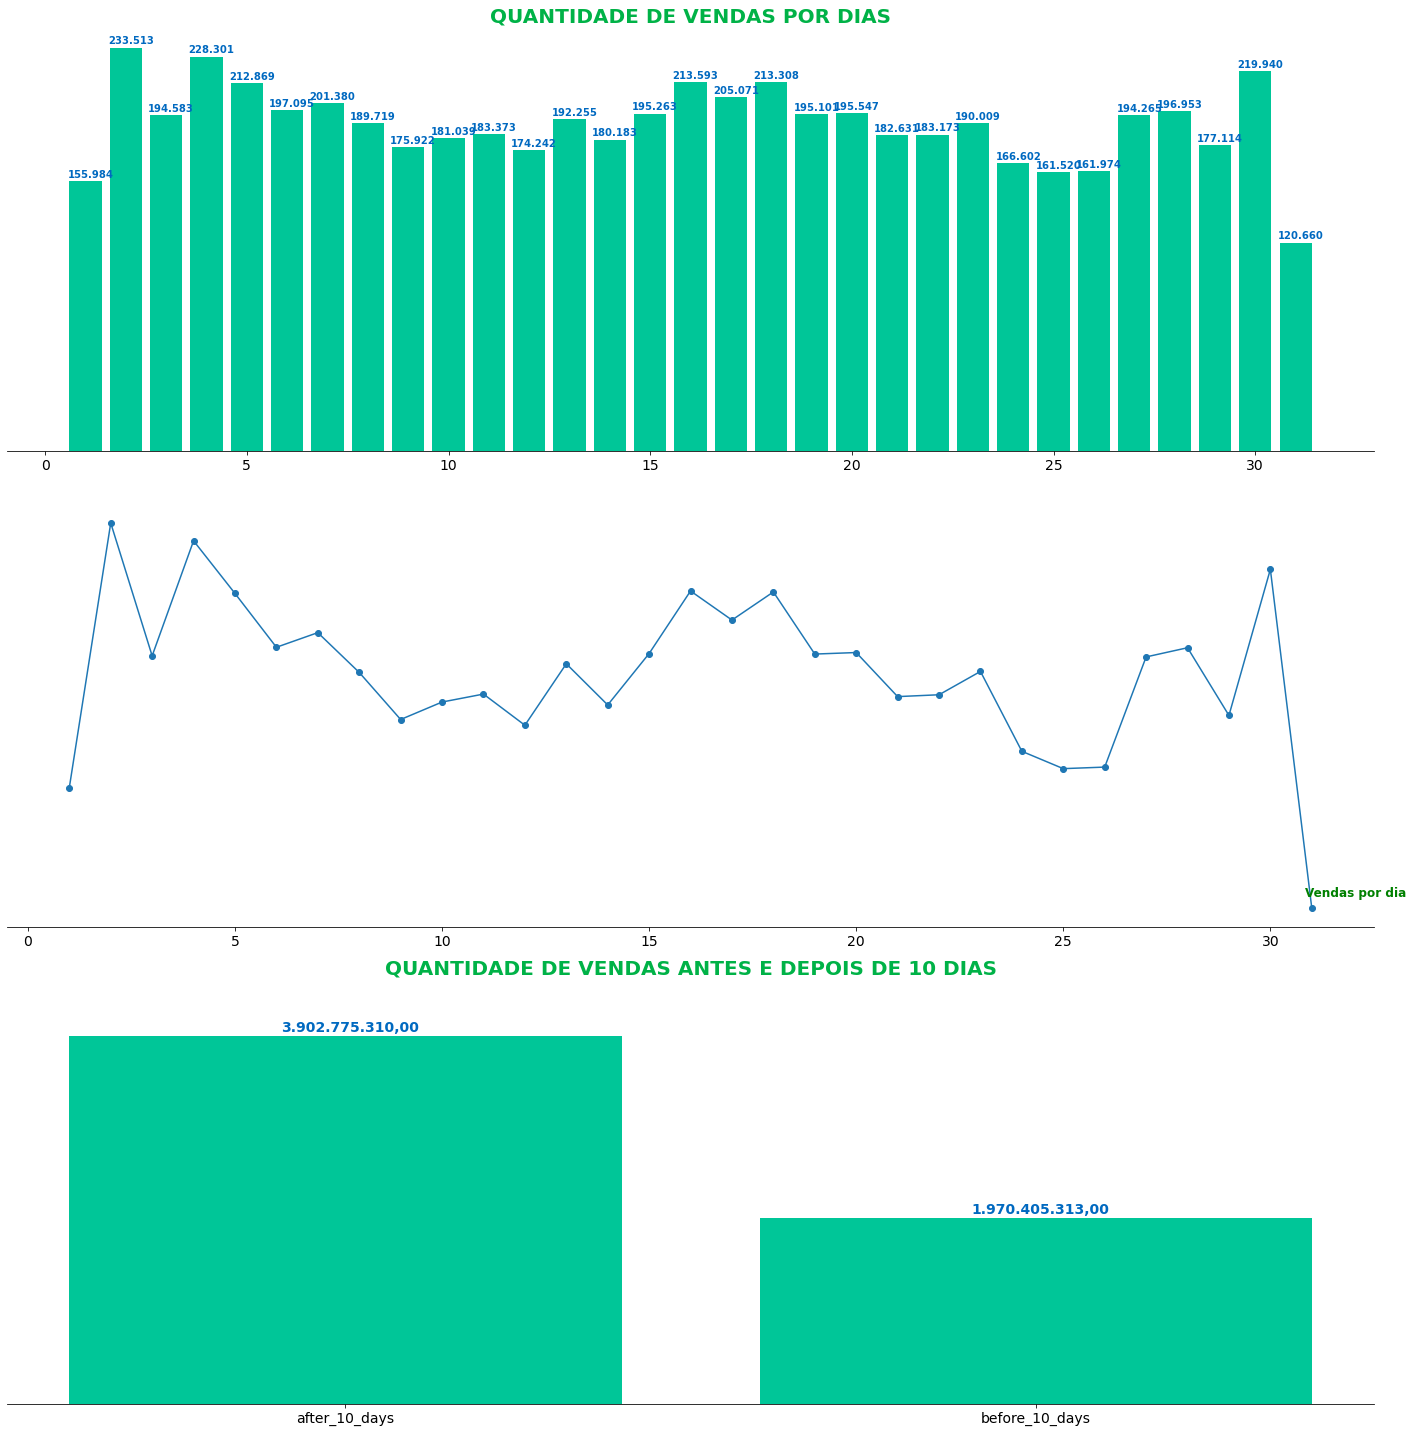

In [120]:
# Gráfico para visualizar as vendas por dias
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(20,20))

soma_mes = df4_sales_all.groupby('day')['sales'].sum()

ax[0].bar(soma_mes.index, soma_mes.values, color="#00c698")

ax[0].set_title("QUANTIDADE DE VENDAS POR DIAS",fontsize=20,fontweight='bold',color='#00b247')

for i in np.arange(0,31):
    ax[0].annotate('{:_.0f}'.format(soma_mes.values[i]/1000).replace('.',',').replace('_','.'),
                (soma_mes.index[i],soma_mes.values[i]),
                ha="center",
                va="top", 
                xytext=(5,12),
                textcoords="offset points", 
                fontsize=10,
                fontweight='bold',
                color="#0069c0"
            )
    
ax[0].yaxis.set_visible(False)

ax[0].set_facecolor("white")
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].tick_params(axis='x',labelsize=14)

vendasMeses = df4_sales_all.groupby('day')['sales'].sum()

ax[1].plot(vendasMeses.index,vendasMeses.values, label='Vendas por Mês', marker = 'o')

ax[1].set_facecolor("white")
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].tick_params(axis='x',labelsize=14)

ax[1].annotate('Vendas por dia', 
            (i,vendasMeses.values[30]),
            ha="left", 
            va="center",
            xytext=(+35,+15),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )
aux1 = df4_sales_all.groupby('day')['sales'].sum().reset_index()
aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 = aux1.groupby('before_after')['sales'].sum()

ax[2].bar(aux2.index, aux2.values, color="#00c698")

ax[2].set_title("QUANTIDADE DE VENDAS ANTES E DEPOIS DE 10 DIAS",fontsize=20,fontweight='bold',color='#00b247')

for i in np.arange(0,2):
    ax[2].annotate('{:_.2f}'.format(aux2.values[i]).replace('.',',').replace('_','.'),
                (aux2.index[i],aux2.values[i]),
                ha="center",
                va="top", 
                xytext=(5,16),
                textcoords="offset points", 
                fontsize=14,
                fontweight='bold',
                color="#0069c0"
            )
    
ax[2].yaxis.set_visible(False)
ax[2].set_yticks(np.array([0,4500000000]))
ax[2].set_facecolor("white")
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[2].tick_params(axis='x',labelsize=14)
    
plt.show()

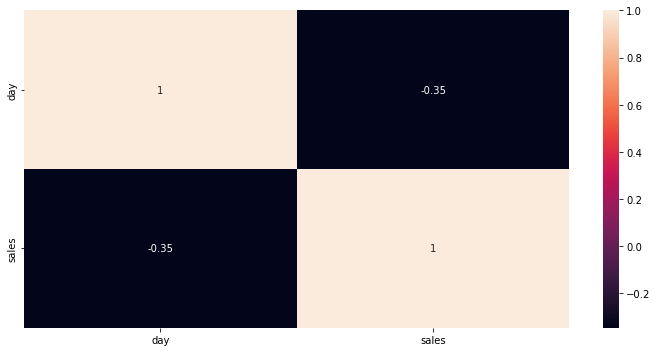

In [121]:
# Matriz de correlações
fig, ax = plt.subplots(figsize=(10, 5))
aux1 = df4_sales_all.groupby('day')['sales'].sum().reset_index()
correlations = aux1.corr()
sns.heatmap(correlations, annot = True);
plt.show()

**Nota:**
- Temos uma correlação fraca, pode ser relevante para o modelo mas com uma relevância fraca.

##### **H12.** Lojas deveriam vender menos aos finais de semana.
**VERDADEIRA** Lojas vendem menos nos final de semana

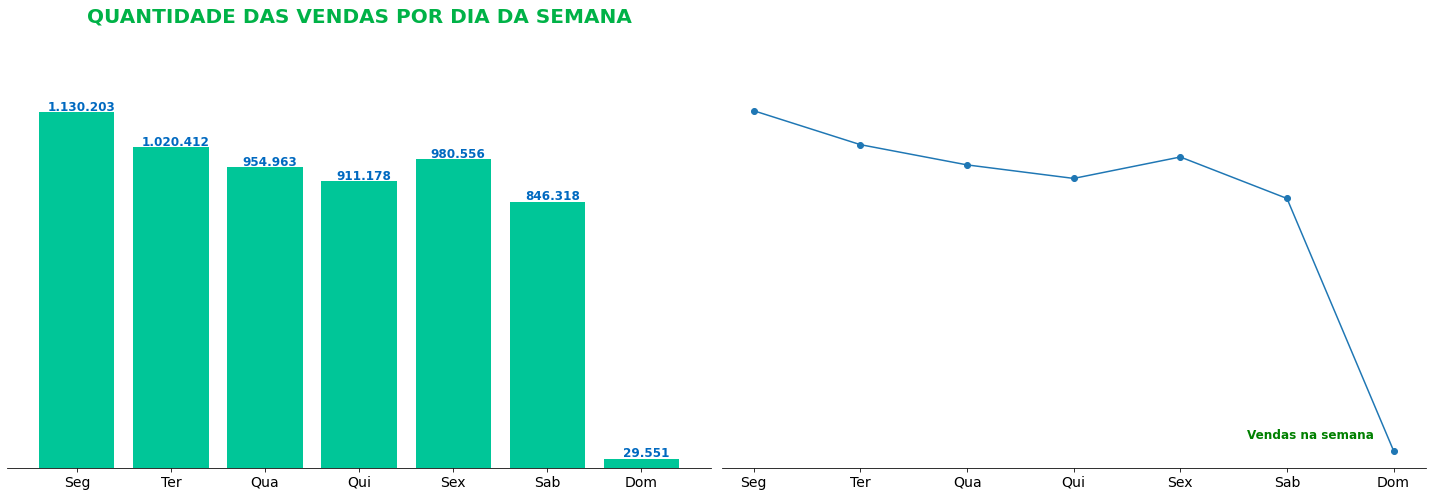

In [122]:
# Gráfico para visualizar as vendas por dia da semana
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,7))

soma_semana = df4_sales_all.groupby('day_of_week')['sales'].sum()

ax[0].bar(soma_semana.index, soma_semana.values, color="#00c698")

ax[0].set_title("QUANTIDADE DAS VENDAS POR DIA DA SEMANA",fontsize=20,fontweight='bold',color='#00b247')

for i in np.arange(0,7):
    ax[0].annotate('{:_.0f}'.format(soma_semana.values[i]/1000).replace('.',',').replace('_','.'),
                (soma_semana.index[i],soma_semana.values[i]),
                ha="center",
                va="top", 
                xytext=(5,12),
                textcoords="offset points", 
                fontsize=12,
                fontweight='bold',
                color="#0069c0"
            )
    
ax[0].yaxis.set_visible(False)

ax[0].set_facecolor("white")
ax[0].set_yticks(np.array([0,1400000000]))
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].xaxis.set_ticks(np.arange(1,8))
ax[0].set_xticklabels(['Seg','Ter','Qua','Qui','Sex','Sab','Dom'])
ax[0].tick_params(axis='x',labelsize=14)


soma_semana = df4_sales_all.groupby('day_of_week')['sales'].sum()

ax[1].plot(soma_semana.index,soma_semana.values, label='Vendas por dia', marker = 'o')


ax[1].set_facecolor("white")
ax[1].set_yticks(np.array([0,1400000000]))
ax[1].yaxis.set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].xaxis.set_ticks(np.arange(1,8))
ax[1].set_xticklabels(['Seg','Ter','Qua','Qui','Sex','Sab','Dom'])
ax[1].tick_params(axis='x',labelsize=14)

ax[1].annotate('Vendas na semana', 
            (i,soma_semana.values[6]),
            ha="left", 
            va="center",
            xytext=(-40,16),
            textcoords="offset points", 
            fontsize=12, 
            fontweight='bold',
            color="green"
           )
    
plt.show()

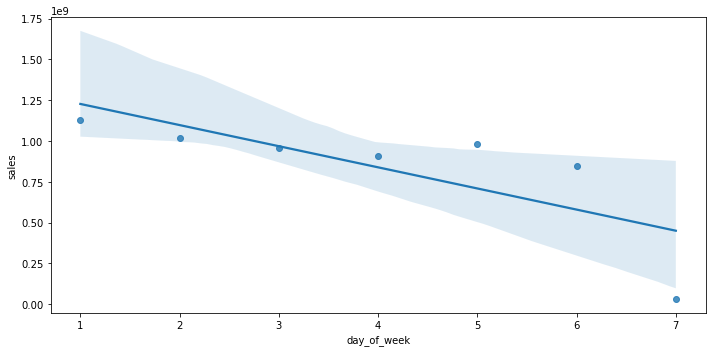

In [123]:
# Gráfico para saber tendência das vendas por dia da semana
fig, ax = plt.subplots(figsize=(10, 5)) 
aux1 = df4_sales_all.groupby('day_of_week')['sales'].sum().reset_index()
sns.regplot( x='day_of_week', y='sales', data=aux1 );
plt.show()

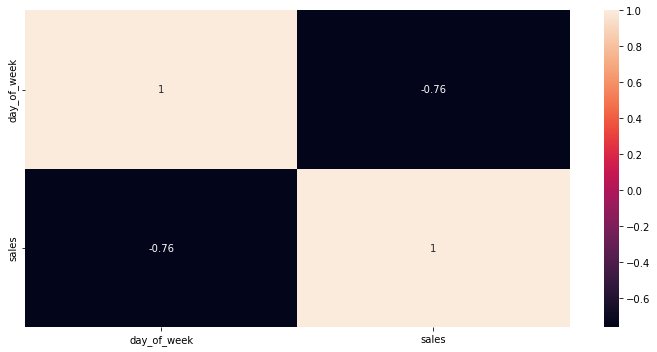

In [124]:
# Matriz de correlações
fig, ax = plt.subplots(figsize=(10, 5))
aux1 = df4_sales_all.groupby('day_of_week')['sales'].sum().reset_index()
correlations = aux1.corr()
sns.heatmap(correlations, annot = True);
plt.show()

**Nota:**
- Temos uma correlação alta negativa, pode ser relevante para o modelo.

##### **H13.** Lojas deveriam vender menos durante os feriados escolares.
**VERDADEIRA** Lojas vendem menos durante os feriado escolares, exceto os meses de Julho e Agosto.

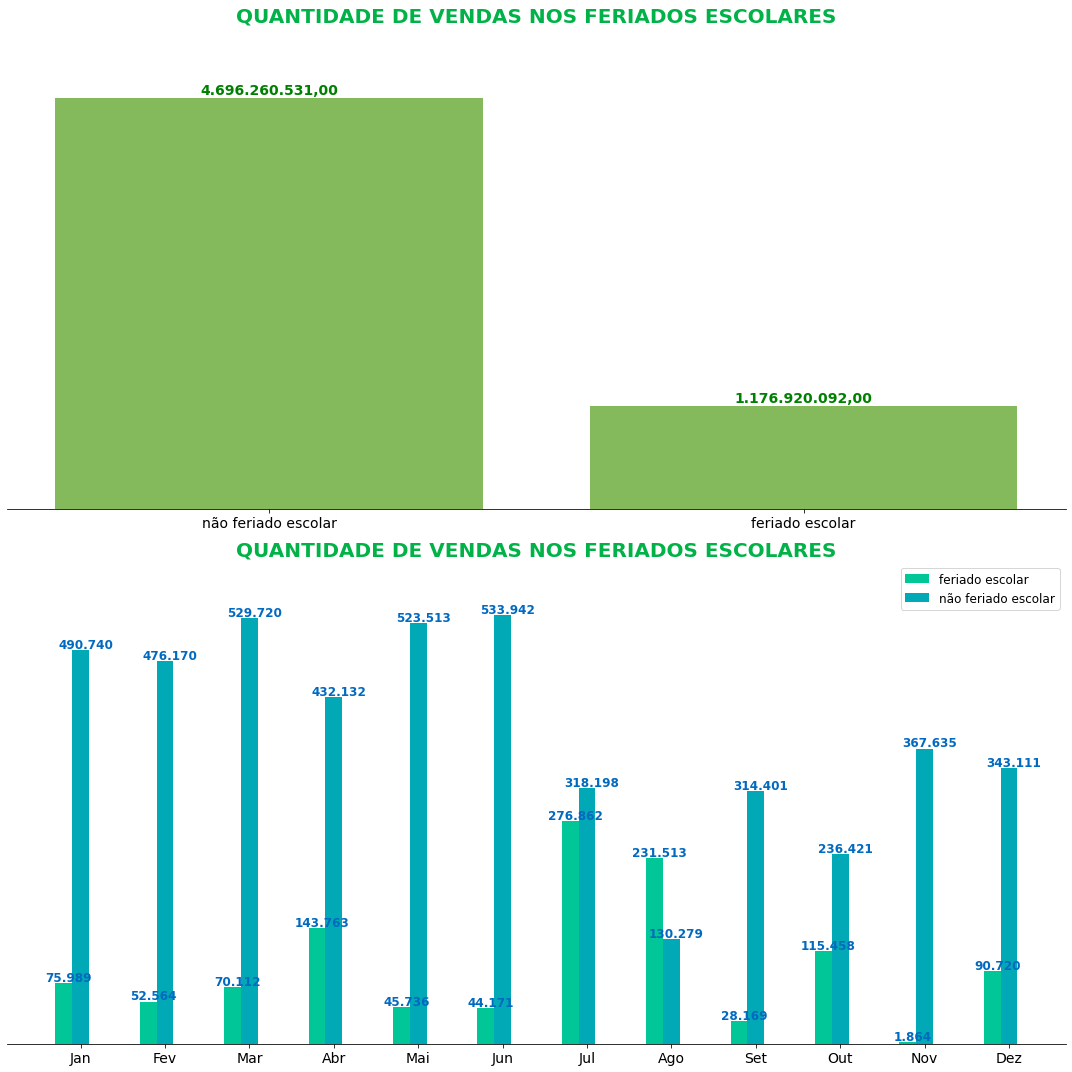

In [125]:
# Gráfico para visualizar o comportamento das vendas nos feriados escolares
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(15,15))

aux2 = df4_sales_all[['school_holiday','sales']].groupby( 'school_holiday' ).sum().reset_index()
aux1 = df4_sales_all[['month','school_holiday','sales']].groupby( ['month', 'school_holiday'] ).sum().reset_index()

ax[0].bar(aux2.school_holiday,aux2.sales, color="#84ba5b" )

ax[0].set_title("QUANTIDADE DE VENDAS NOS FERIADOS ESCOLARES", fontsize=20, fontweight='bold', color='#00b247' )

for i in np.arange(0,2):
    ax[0].annotate('{:_.2f}'.format(aux2.sales[i]).replace('.',',').replace('_','.'),
                (aux2.school_holiday[i],aux2.sales[i]),
                ha="center",
                va="top",
                xytext=(0,+15),
                textcoords="offset points",
                fontsize=14, 
                fontweight='bold',
                color="green" 
            )
    
ax[0].set_yticks(np.array([0,5500000000]))
ax[0].yaxis.set_visible(False)
ax[0].set_facecolor("white")
ax[0].tick_params(axis='x',labelsize=14)
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].xaxis.set_ticks([0,1])
ax[0].set_xticklabels(['não feriado escolar','feriado escolar'])

wid = 0.2

ax[1].bar(aux1[aux1.school_holiday == 1].month.values-wid,
       aux1[aux1.school_holiday == 1].sales.values,
       color="#00c698",
       label='feriado escolar',
       width=wid 
      )
ax[1].bar(aux1[aux1.school_holiday == 0].month.values, 
       aux1[aux1.school_holiday == 0].sales.values,
       color="#00a9b5", 
       label='não feriado escolar',
       width=wid 
      )

ax[1].set_title("QUANTIDADE DE VENDAS NOS FERIADOS ESCOLARES",fontsize=20,fontweight='bold',color='#00b247')

ax[1].legend(facecolor="white",fontsize=12)
    
for i in np.arange(0,12):
    ax[1].annotate('{:_.0f}'.format(aux1[aux1.school_holiday == 1].sales.values[i]/1000).replace('.',',').replace('_','.'), 
                (aux1[aux1.school_holiday == 1].month.values[i]-wid,aux1[
                    aux1.school_holiday == 1].sales.values[i]), 
                ha="center", va="top", xytext=(5,12), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
    ax[1].annotate('{:_.0f}'.format(aux1[aux1.school_holiday == 0].sales.values[i]/1000).replace('.',',').replace('_','.'), 
                (aux1[aux1.school_holiday == 0].month.values[i],aux1[
                    aux1.school_holiday == 0].sales.values[i]), 
                ha="center", va="top", xytext=(5,12), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#0069c0")
   
    
ax[1].yaxis.set_visible(False)

ax[1].set_facecolor("white")
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].xaxis.set_ticks(np.arange(1,13))
ax[1].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'])
ax[1].tick_params(axis='x',labelsize=14)
ax[1].set_yticks(np.array([0,600000000]))
    
plt.show()

##### Resumo das Hipóteses

In [126]:
tab =[['Hipóteses', 'Conclusão', 'Relevância para modelo'],
      ['H1', 'Falsa', 'Baixa'],  
      ['H2', 'Falsa', 'Media'],
      ['H5', '-', '-'],
      ['H7', 'Falsa', 'Baixa'],
      ['H8', 'Falsa', 'Media'],
      ['H9', 'Falsa', 'Alta'],
      ['H10', 'Falsa', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Alta'],
      ['H13', 'Verdadeira', 'Baixa'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipóteses    Conclusão    Relevância para modelo
-----------  -----------  ------------------------
H1           Falsa        Baixa
H2           Falsa        Media
H5           -            -
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Alta
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Baixa


### <font color='#F37126'> 4.4. Análise Multivariada

#### <font color='F37126'> Introdução:

**Aqui procuramos entender como as variáveis se relacionam, qual a correlação entre elas.**

Por que ela é importante?

- Os algoritmos de ML seguem algumas primicias e uma delas é a teória de navalha de Ockham, ela é uma teória que garante o aprendizado dos modelos.
	- A navalha de Occam (ou Ockham) afirma que a explicação mais simples é preferível do que a mais complexa. Isso porque teorias simples são mais fáceis de verificar e soluções descomplicadas são mais fáceis de executar.

- Se temos vários modelos para escolher, sempre devemos escolher aquele de menor complexidade, porque ele generaliza o aprendizado melhor.

- Existem várias formas de tornar um algoritmo de ML complexo, umas delas é a 'dimensionalidade' do conjunto de dados
	- Dimensionalidade pode ser o número de colunas do conjunto de dados
    
- Para diminuir a 'dimensionalidade' podemos tirar algumas colunas do conjunto de dados, mas seguindo um critério.
	- Um dos critérios é o quanto de informação cada uma das colunas carrega.
    
- Como encontrar quais as variáveis que carregam a mesma quantidade de informação?
	- Podemos usar o método da Álgebra Linear, que são os vetores linearmente dependentes.
	- Se temos dois vetores (duas colunas) que são linearmente dependentes, podemos tirar uma e o conteúdo de informação ele se mantem
	- Uma das formas de encontrar esses vetores é olhar para a correlação.
    
**Nota para explicar sobre Correlação:**
- A correção é utilizada para entender como as variaveis se relacionam entre si.
- A correção vai de -1 até +1 onde -1 significa uma forte correção negativa e +1 significa uma forte correlação positiva.
- Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.

Então a análise multivariada nos ajuda a encontrar quais são as variáveis que são correlacionadas e portanto pode ser retiradas para dimunuir a dimensionalidade do conjunto de dados assim diminuir a complexidade do modelo.

#### Atributos numéricos

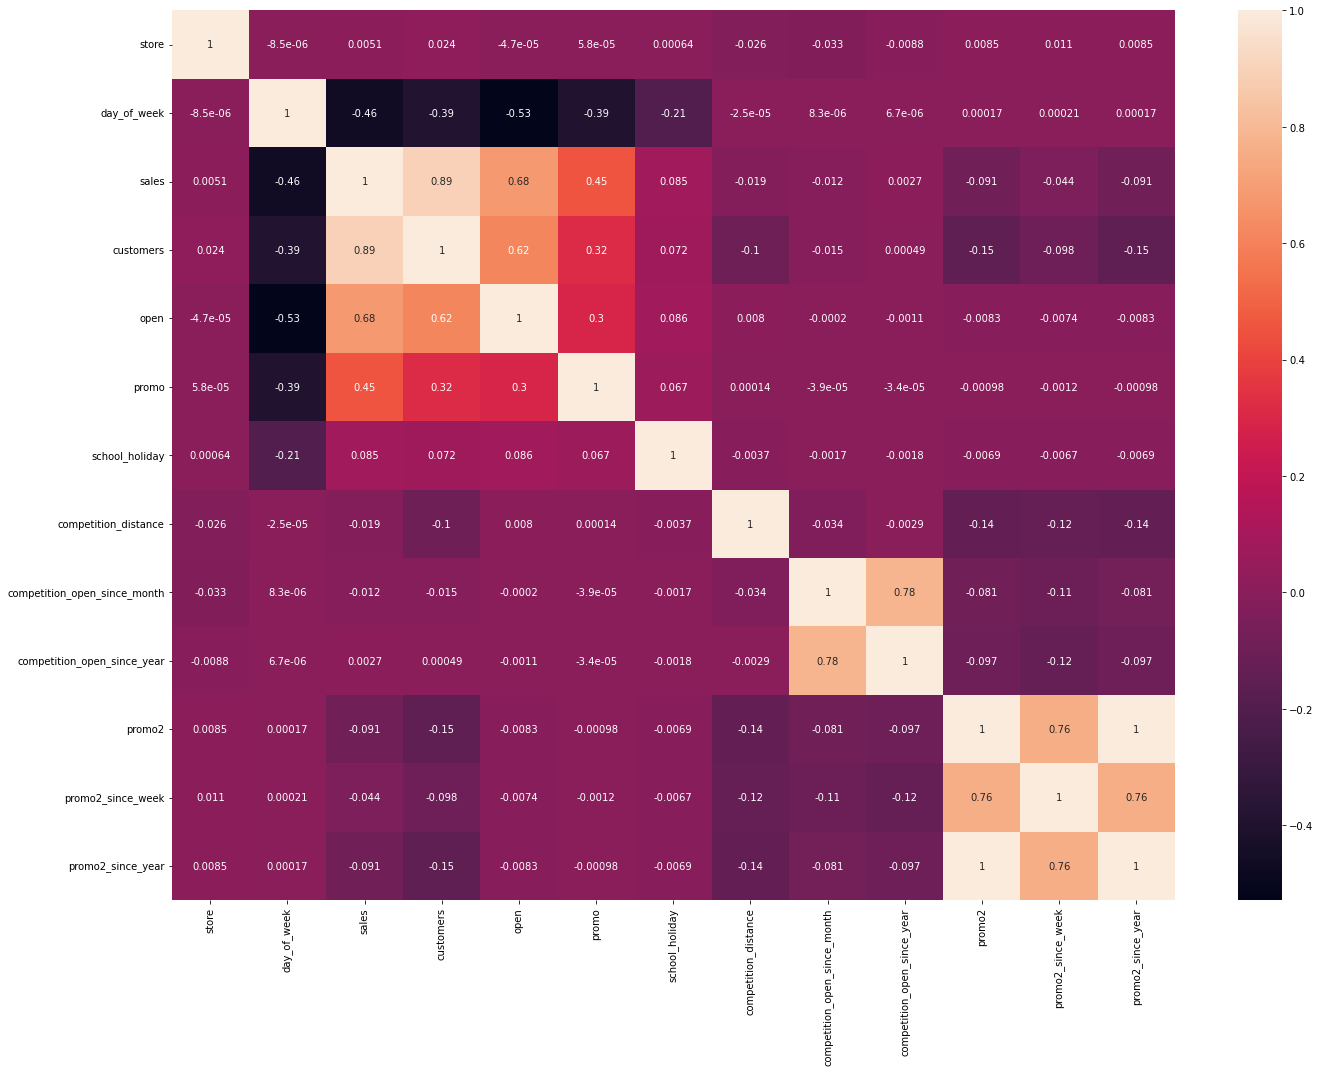

In [127]:
# Matriz de correlações (correlação entre todas as variáveis númericas)
fig, ax = plt.subplots(figsize=(20, 15))
correlations = num_attributes.corr()
sns.heatmap(correlations, annot = True);
plt.show()

In [128]:
# Criando um rank das correlações
correlations = num_attributes.corr()['sales'].sort_values()
correlations

day_of_week                    -0.462125
promo2_since_year              -0.091056
promo2                         -0.091040
promo2_since_week              -0.044143
competition_distance           -0.019210
competition_open_since_month   -0.012431
competition_open_since_year     0.002749
store                           0.005126
school_holiday                  0.085124
promo                           0.452345
open                            0.678472
customers                       0.894711
sales                           1.000000
Name: sales, dtype: float64

**Nota:**
- Quanto mais perto da cor preta, maior é a correlação negativa.
- Quanto mais perto da cor branca, maior é a correlação positiva.
- Está é uma matrix simétrica.
- Vai de -1 (forte correlação negativa) até +1 (forte correlação positiva), onde 0 acontece quando não existe correlação.
- A correlção entre duas variáveis que são as mesmas ela é porque está correlacioando duas variáveis que são as mesmas.

#### Atributos categóricos

In [129]:
a = df4_sales_all.select_dtypes( include='object' )

In [130]:
a.head()

,state_holiday,store_type,assortment,promo_interval,year_week
0,regular_day,c,basic,0,2015-30
1,regular_day,c,basic,0,2015-30
2,regular_day,c,basic,0,2015-30
3,regular_day,c,basic,0,2015-30
4,regular_day,c,basic,0,2015-30


In [131]:
# Função para calcular Cramér's V
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) ) # Fórmula Cramér's V para cálcular as variáveis categóricas

In [132]:
# Criando a matrix

# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3],
                   'store_type': [a4, a5, a6],
                   'assortment': [a7, a8, a9]  })

d = d.set_index( d.columns )

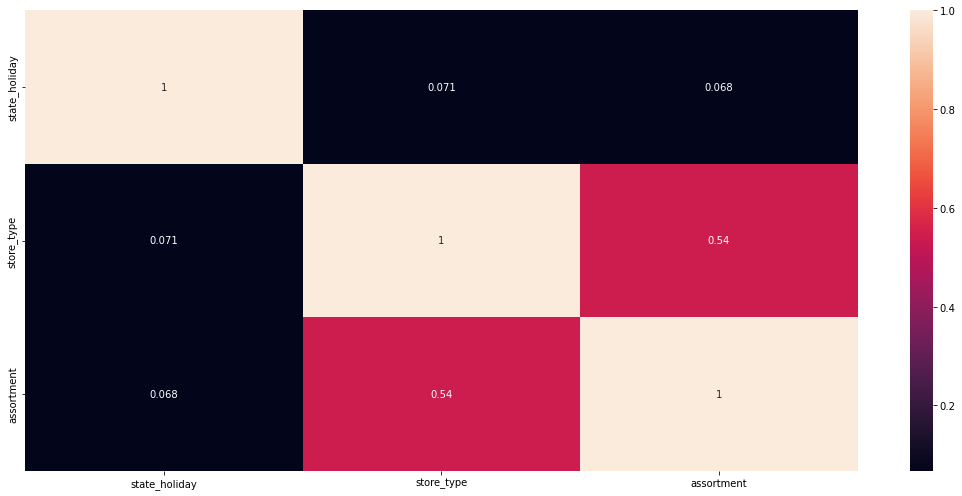

In [133]:
# Matriz de correlações (correlação entre todas as variáveis categóricas)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap( d, annot=True );
plt.show()

**Nota:**
- **state_holiday** tem uma correlação fraca com **store_type** e com **assortment**, porque está próximo de zero, mas em compesação **store_type** tem uma correlção muito boa com **assortment**, que faz sentido quanto maior o tipo da loja mais coisas podemos colocar, mais produtos podemos ter.

[back](#indice)
**========================================================================================================================**

# <font color='red'> 5 - PREPARAÇÃO DOS DADOS
<a id='tratamento'></a>

## <font color='#F37126'> Introdução:

Agora entramos na Modelagem dos dados, onde vamos preparar os dados para ensinar os Algoritmo de Machine learning.

Aqui entra os dois passos dos 10 passos de um projeto de Ciência de Dados - CRISP: 
    
   - **Passo 5:** Aqui é a  **Modelagem dos dados**, a preparação dos dados, onde vamos preparar os dados para ensinar os Algoritmo de Machine learning.

   - **Passo 6:** Que é a **Selection Filter (filtragem das variáveis no sentido de relevância para aprendizagem do modelo)**, onde usamos alguns algoritmos de Machine Learning para poder selecionar as variáveis mais relevântes para o modelo.

## <font color='blue'> PASSO 05 - Modelagem dos Dados
<a id='passo5'></a>

### <font color='#F37126'> Introdução:

**Passo importante, porque o aprendizado da maioria dos algoritmos de ML é facilitado com dados númericos e na mesma escala.**

A maioria dos algoritmos de ML eles foram criados seguindo alguns critérios e um destes critérios é que as variáveis deveriam ser númericas, porque os algoritmos de ML trabalham em sua maioria com método de otimização, este método escontra os melhores parâmetros para o conjunto de dados e este método usam muito derivadas, entre outras operações matemáticas.

A transformação dos seus dados, que já estão tratados, é uma pratica para evitar que seu algoritmo fique enviesado para as variáveis com maior ordem de grandeza.

**Temos dois tipos de transformação:**

- De grandeza
	- Tem como objetivo de trazer a variável resposta para uma distribuição mais próxima prossível de uma normal
	- Os algoritmos de ML foram criados sobre certas primícias e uma destas primícias é que os dados seja normalmente distribuido (ou seja tenha uma distribuição normal).
 - Então quanto mais próximo os dados maior será a acurácia.
- De natureza
	- Tem como objetivo de trazer a natureza real dos dados dentro do conjunto de dados
	- Exemplo: Em uma das variáveis é o mês e a construção dos meses é de 1 há 12 (janeiro há dezembro), janeiro é perto de fevereiro e longe de dezembro, mas quando vira o ano o mês de dezembro está muito próximo de janeiro do no ano posterior, mas se deixar a variável de 1 há 12, nós perdemos a noção de ciclo e por isso que precisamos deixar que dezembro do ano anterior também seja próximo de janeiro do ano posteior, e é neste momento que entra a transformação de natureza.


Transformação Logatithm
- Ela transforma basicamente distribuições que tem uma skew muito para a direita ou para esquerda, para uma ditribuição normal.

### <font color='#F37126'> 5.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [134]:
df5_sales_all = df4_sales_all.copy()

In [135]:
df5_sales_all.head()

,store,day_of_week,date,sales,customers,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week
0,1,5,2015-07-31,5263,555,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,31,31,2015-30
1,1,4,2015-07-30,5020,546,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,30,31,2015-30
2,1,3,2015-07-29,4782,523,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,29,31,2015-30
3,1,2,2015-07-28,5011,560,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,28,31,2015-30
4,1,1,2015-07-27,6102,612,1,regular_day,1,c,basic,1270.0,9,2008,0,0,0,0,2015,7,27,31,2015-30


In [136]:
df5_sales_all.shape

(844338, 22)

### <font color='#F37126'> 5.2. Normalização

#### <font color='F37126'> Introdução:

A normalização rescala o centro para 0 com desvio-padrão igual a 1, este método funciona muito bem para variáveis que tem uma distribuição normal.

#### Aplicando a normalização

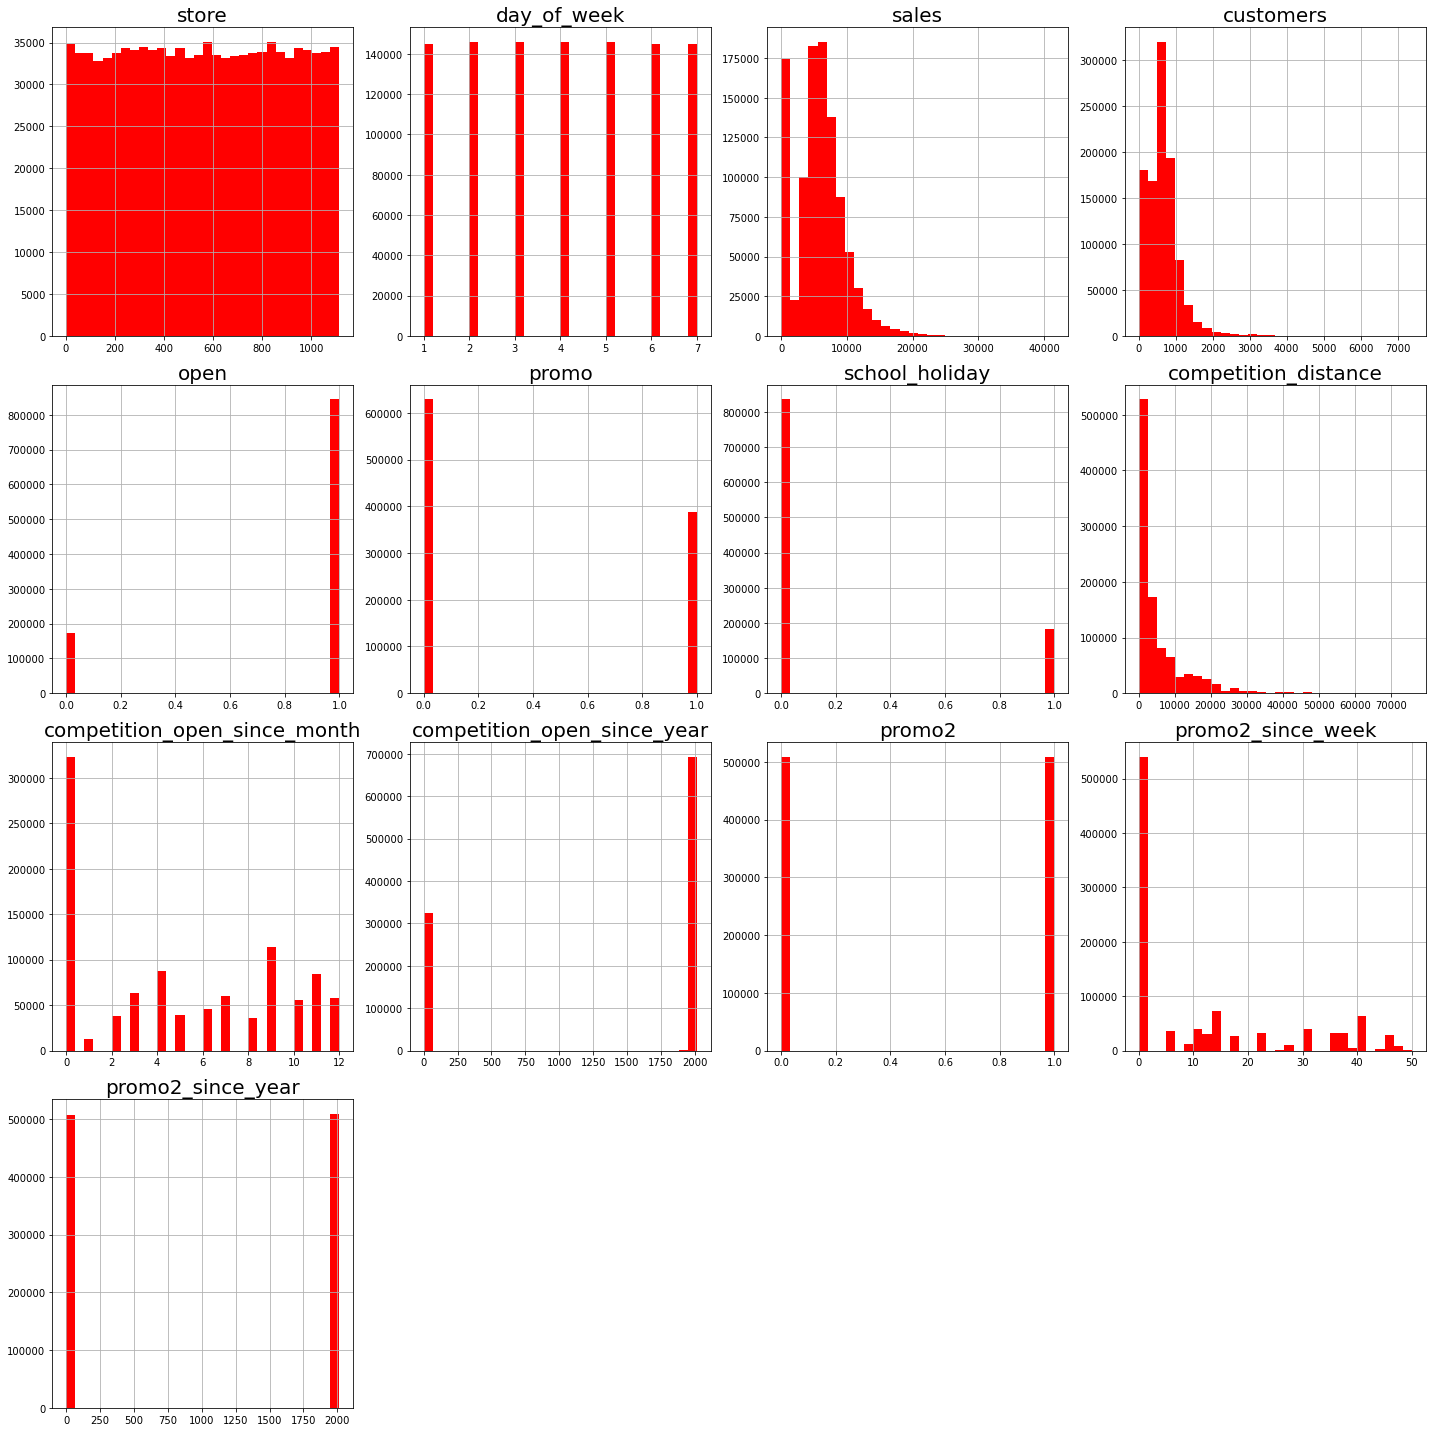

In [137]:
# Histograma para ver a distribuição dos dados
num_attributes.hist(bins = 30, figsize=(20,20), color = 'r');

**Nota:**
- Devemos procurar variáveis com uma distribuição normal e não temos nenhum gráfico com uma distribuição normal, então vamos para etapa **Rescaling**.

### <font color='#F37126'> 5.3. Rescaling

#### <font color='F37126'> Introdução:

Rescala para o intervalo entre 0 e 1 e este método é muito usado para distribuições não Gaussianas, ou seja não tem uma distribuição normal.

Quando não temos variáveis que segue uma distribuição normal, devemos usar algumas técnicas como:
- O Método Min-Max Scaler não muda a natureza das variáveis, mas mantém a distribuição, ela só muda a range.
- Como a maioria das variáveis númericas do conjunto não possuem uma distribuição normal, foram aplicados métodos de Rescaling.
  - Para variáveis que possuiam **outliers muito fortes**, optamos pela utilização do **RobustScaler**, enquanto que para as demais variáveis, foi utilizado o **Min-Max Scaler**.

#### Aplicando rescaling

In [138]:
# Identificando as variáveis que vamos aplicar o rescaling
a = df5_sales_all.select_dtypes(include=['int64','float64'])
a.head()

,store,day_of_week,sales,customers,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,year,month,day,week_of_year
0,1,5,5263,555,1,1,1270.0,9,2008,0,0,0,2015,7,31,31
1,1,4,5020,546,1,1,1270.0,9,2008,0,0,0,2015,7,30,31
2,1,3,4782,523,1,1,1270.0,9,2008,0,0,0,2015,7,29,31
3,1,2,5011,560,1,1,1270.0,9,2008,0,0,0,2015,7,28,31
4,1,1,6102,612,1,1,1270.0,9,2008,0,0,0,2015,7,27,31


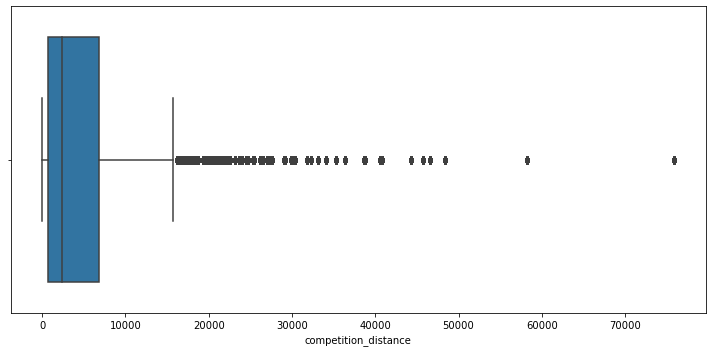

In [139]:
# Verificando a distribuição
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df5_sales_all['competition_distance']);
plt.show()

In [140]:
rs = RobustScaler()
mms = MinMaxScaler()

# competition distance (subscrevendo os valores em uma nova escala)
df5_sales_all['competition_distance'] = rs.fit_transform( df5_sales_all[['competition_distance']].values )
pickle.dump( rs, open( 'Parameter/competition_distance_scaler.pkl', 'wb') )

# competition open since_month (subscrevendo os valores em uma nova escala)
df5_sales_all['competition_open_since_month'] = mms.fit_transform( df5_sales_all[['competition_open_since_month']].values )
pickle.dump( rs, open( 'Parameter/competition_open_since_month.pkl', 'wb') )

# competition open since year (subscrevendo os valores em uma nova escala)
df5_sales_all['competition_open_since_year'] = mms.fit_transform( df5_sales_all[['competition_open_since_year']].values )
pickle.dump( rs, open( 'Parameter/competition_open_since_year.pkl', 'wb') )

# year
df5_sales_all['year'] = mms.fit_transform( df5_sales_all[['year']].values )
pickle.dump( mms, open( 'Parameter/year_scaler.pkl', 'wb') )

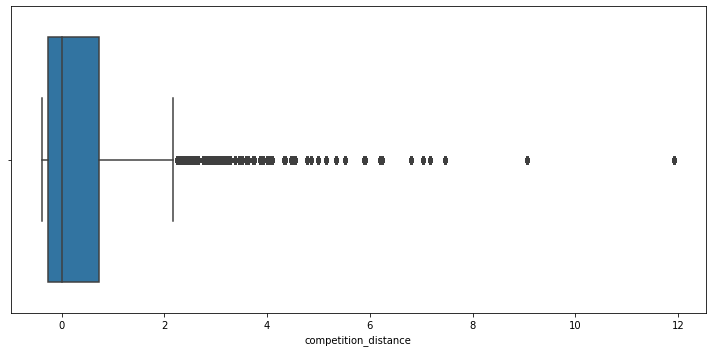

In [141]:
# Verificando a distribuição
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(df5_sales_all['competition_distance']);
plt.show()

In [142]:
df5_sales_all.head()

,store,day_of_week,date,sales,customers,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week
0,1,5,2015-07-31,5263,555,1,regular_day,1,c,basic,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,31,31,2015-30
1,1,4,2015-07-30,5020,546,1,regular_day,1,c,basic,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,30,31,2015-30
2,1,3,2015-07-29,4782,523,1,regular_day,1,c,basic,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,29,31,2015-30
3,1,2,2015-07-28,5011,560,1,regular_day,1,c,basic,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,28,31,2015-30
4,1,1,2015-07-27,6102,612,1,regular_day,1,c,basic,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,27,31,2015-30


### <font color='#F37126'> 5.4. Transformação

#### <font color='F37126'> Introdução:

**Temos duas transformação:**
- Conversão de features categóricas para numéricas (Encoding).
- Transformação de natureza

**Enconders:**

Encoding é converter a variável categorica em uma variável numérica e mantendo o conteúdo de informação ou seja respeitando no máximo sua natureza.

**Explicação dos Enconders:**

- **One hot Encoding**
   - Ele identifica o estado, exemplo: se naquela linha tem a presença da variável coloca 1 (um) se não coloca 0 (zero).
   - **Regra de ouro**, quando tem muitos (acima de 6/7) níveis em sua variável categórica, não indicado One Hot Encoding, porque irá criar muitas dimensões no dataset que a amostra de dimensionalidade irá acabar com o modelo (o número de coluna vai ficar muito alto em relação ao número de linha).

- **Label Encoding**
   - Troca os tipos da variável categórica por números, onde esses números são aleatórios, não tem nenhuma relação entre si.
   - Exemplo: podemos usar trocando os nomes de pessoas por números.

- **Ordinal Encoding**
   - Usado quando temos uma ordem de importância (maior e menor).
   - Exemplo1: Para temperatura funciona bem, quente e frio.
   - Exemplo2: Para cor não funciona muito bem porque preto é maior que verde, não exite uma relação de ordem.
   
- **Frequency Encoding**
   - É a variável do tipo que conta a frequência.
   
- **Target Encoding**
   - Ele calcula a média para cada nível da variável categórica.
   - Exemplo: Funciona muito bem quando temos variáveis categóricas com muitos níveis.
   
- **Weighted Target Encoding**
   - Ele da um peso manual para a variável
       - Ex: quanto maior o peso mais próximo fica da média, e quanto menor o peso fica mais distante da média.

#### Aplicando os enconders

In [143]:
# state_holiday - One Hot Encoding
df5_sales_all = pd.get_dummies( df5_sales_all, prefix=['state_holiday'], columns=['state_holiday'] )

# store_type - Label Encoding - não sabemos se existe uma ordem de importância
le = LabelEncoder()
df5_sales_all['store_type'] = le.fit_transform( df5_sales_all['store_type'] )
pickle.dump( le, open( 'parameter/store_type_scaler.pkl', 'wb') )

# assortment - Ordinal Encoding - temos uma ordem de importância
assortment_dict = {'basic': 1,  'extra': 2, 'extended': 3}
df5_sales_all['assortment'] = df5_sales_all['assortment'].map( assortment_dict )

In [144]:
df5_sales_all.head()

,store,day_of_week,date,sales,customers,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,555,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,31,31,2015-30,0,0,0,1
1,1,4,2015-07-30,5020,546,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,30,31,2015-30,0,0,0,1
2,1,3,2015-07-29,4782,523,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,29,31,2015-30,0,0,0,1
3,1,2,2015-07-28,5011,560,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,28,31,2015-30,0,0,0,1
4,1,1,2015-07-27,6102,612,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,27,31,2015-30,0,0,0,1


### <font color='#F37126'> 5.5. Transformação da variável de resposta

Como nossa variável reposta, vendas, não possui uma distribuição normal, a fim de facilitar a aprendizagem do algoritmo foi aplicada uma transformação do tipo logaritma.

In [145]:
df5_sales_all['sales'] = np.log1p( df5_sales_all['sales'] )

média: 8.757736785056268
mediana: 8.759354748566208


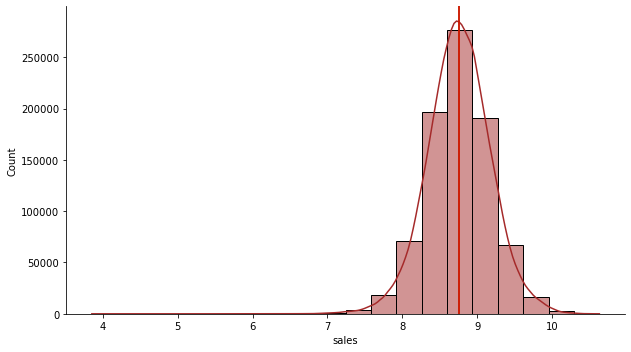

In [146]:
media_inicial = np.mean(df5_sales_all.sales)
mediana_inicial = np.median(df5_sales_all.sales)

sns.displot(df5_sales_all.sales, bins=20 ,color="brown", kde=True).figure.set_size_inches(10, 5);
plt.axvline(x=media_inicial, color='g', linestyle='-');
plt.axvline(x=mediana_inicial, color='r', linestyle='-');

print('média: ' + str(media_inicial))
print('mediana: ' + str(mediana_inicial))

### <font color='#F37126'> 5.6. Transformação de natureza cíclica

A fim de respeitar a natureza cíclica das variáveis temporais como dia, dia da semana, semana e mês foram aplicadas transformações clicicas do tipo seno e cosseno.

In [147]:
# day of week
df5_sales_all['day_of_week_sin'] = df5_sales_all['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
df5_sales_all['day_of_week_cos'] = df5_sales_all['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# month
df5_sales_all['month_sin'] = df5_sales_all['month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
df5_sales_all['month_cos'] = df5_sales_all['month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day 
df5_sales_all['day_sin'] = df5_sales_all['day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
df5_sales_all['day_cos'] = df5_sales_all['day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# week of year
df5_sales_all['week_of_year_sin'] = df5_sales_all['week_of_year'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
df5_sales_all['week_of_year_cos'] = df5_sales_all['week_of_year'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )

In [148]:
df5_sales_all.head()

,store,day_of_week,date,sales,customers,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,555,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,31,31,2015-30,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,2.079117e-01,0.978148,-0.568065,-0.822984
1,1,4,2015-07-30,8.521384,546,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,30,31,2015-30,0,0,0,1,-0.433884,-0.900969,-0.5,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
2,1,3,2015-07-29,8.472823,523,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,29,31,2015-30,0,0,0,1,0.433884,-0.900969,-0.5,-0.866025,-2.079117e-01,0.978148,-0.568065,-0.822984
3,1,2,2015-07-28,8.519590,560,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,28,31,2015-30,0,0,0,1,0.974928,-0.222521,-0.5,-0.866025,-4.067366e-01,0.913545,-0.568065,-0.822984
4,1,1,2015-07-27,8.716536,612,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,27,31,2015-30,0,0,0,1,0.781831,0.623490,-0.5,-0.866025,-5.877853e-01,0.809017,-0.568065,-0.822984


## <font color='blue'> PASSO 06 - Seleção de Variáveis (Featuren selection)
<a id='passo6'></a>

### <font color='#F37126'> Introdução:

**Passo importante porque aqui é o filtro das variáveis mais relevantes para aprendizagem do modelo.**

**Modelo** é uma representação de um fenômeno, e na seleção devemos da preferência para aquele que é mais simples, porque provavelmente ele generaliza melhor.

Para tornar mais simples a aprendizagem de Machine learning, precisa utilizar modelos mais simples e a simplicidade do conjundo de dados está na quantidade de colunas que ele tem.

Existem duas ou mais Features que podem explicar a mesma parte do fenômeno, ou seja ele carrega o mesmo conteúdo de informação e quando isso acontece, chamamos de **Variáveis Colineares**. Quando removemos as Variáveis Colineares, acaba terminando com modelos mais simples.

**A navalha de Occam (ou Ockham) afirma que a explicação mais simples é preferível do que a mais complexa. Isso porque teorias simples são mais fáceis de verificar e soluções descomplicadas são mais fáceis de executar.**

**Os tipos de seleção de variáveis:**

1. **Seleção Univariada (filter methods):**
  - O principal objetivo dela é classificar as veriáveis sendo relevântes e não relevântes para o modelo.
  - Na seleção de variada, tentamos encontrar dentro de todas as variáveis que estão a disposição no conjunto de dados, quais dela explixa a maior porção do fenômeno, ou explica melhor o fenômeno.
  - Como matemáticamente encontra a explicação do fenômeno?
    - Através do Coeficiente de Correlação (quanto mais próximo de 1 mais relevânte e quanto mais próximo de 0 menos relevânte).
  - Um grande risco de usar este método é a possibilidade em descartar uma variável que combinada com outras variáveis apresenta uma correlação forte.


2. **Seleção por Importância (embedded methods):**
 - Seleção por Importância, utiliza o conceito de importância para classificar a variável sendo relevânte ou não relevânte para aprendizado do modelo.
 
 - Além da regressão e classificação podemos usar Ronadom Forest para a seleção das variáveis por importância.
   - Random Forest utilizar um método chamado Gini Impurity.
     - Qual é a idéia principal Random Forest?
       - A idéia é escolher as variáveis que separa o conjunto de dados original em dois outros, sendo que estes dois novos conjuntos sejam homogêneo entre si. Conseguindo fazer isso a variável que fez a separação é considerada uma variável importante.
  - Lasso & Ridge são mais ou menos a mesma idéia, pegamos o conjunto de dados, com as colunas mais as variáveis respostas vamos treinar com um método de regressão que pode ser quanto Lasso ou Ridge e vamos olhar para os pesos platados e vamos selecionar as variáveis que tem um peso maior ou que são um peso mais negativo e tentar evitar aquelas variáveis que tem um peso próximo de zero.
  
 
3. **Seleção por Subset (wrapper methods):**
- A Seleção por SubSet é um método totalmente diferente dos anteriores.

- O Primento método foi de Seleção Univariada, que utiliza correlação como critério para classificar a variável sendo relevânte ou não relevânte para aprendizado do modelo.
- O Segundo método foi de Seleção por Importância, que utiliza o conceito de importância para classificar a variável sendo relevânte ou não relevânte para aprendizado do modelo.
- A Seleção por SubSet é uma sequência de passos ou seja é um processo que utilizamos para determinar a relevância das variáveis.
    - Qual é a idéia do algoritmo Boruta?
      - O algoritmo Boruta vai no conjunto de dados original e seleciona duas variáveis aleatórias, depois disto ele cria variáveis chamada Shadow (As variáveis Shadow é uma cópia da variável original só com as linhas misturadas).
      - Neste momento o Boruta olha só para Shadow Features, e faz uma pergunta **Qual que é a variável Shadow mais importante?**
      - Encontrando a variável mais importante, ele vai comparar com cada uma das variáveis originais e se a variável Original for maior que a variável Shadow vai colocar o número "1" em uma tabela e se for menor vai colocar "0".

      - Ele repete este processo várias vezes até que chegue em uma tabela chamada "Sucess Counts" e com está tabela da para usar uma "Distribuição Binomial".

      - Com a distribuição binomial da para calcular o "p-valor" de cada uma das variáveis.

      - O p-valor é um conceito muito importante para estatística que ajuda a determinar se uma hipótese é verdadeira, ou seja se aceita ou rejeita a hipótese e aqui da para determinar se a variável é importante ou não.

### <font color='#F37126'> 6.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [149]:
df6_sales_all = df5_sales_all.copy()

In [150]:
df6_sales_all.head()

,store,day_of_week,date,sales,customers,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,5,2015-07-31,8.568646,555,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,31,31,2015-30,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,2.079117e-01,0.978148,-0.568065,-0.822984
1,1,4,2015-07-30,8.521384,546,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,30,31,2015-30,0,0,0,1,-0.433884,-0.900969,-0.5,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984
2,1,3,2015-07-29,8.472823,523,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,29,31,2015-30,0,0,0,1,0.433884,-0.900969,-0.5,-0.866025,-2.079117e-01,0.978148,-0.568065,-0.822984
3,1,2,2015-07-28,8.519590,560,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,28,31,2015-30,0,0,0,1,0.974928,-0.222521,-0.5,-0.866025,-4.067366e-01,0.913545,-0.568065,-0.822984
4,1,1,2015-07-27,8.716536,612,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,0,1.0,7,27,31,2015-30,0,0,0,1,0.781831,0.623490,-0.5,-0.866025,-5.877853e-01,0.809017,-0.568065,-0.822984


In [151]:
df6_sales_all.shape

(844338, 33)

### <font color='#F37126'> 6.2. Dividir dataframe em conjunto de dados de treinamento e teste

In [152]:
# Deletar as variáveis originais
cols_drop = ['week_of_year', 'day', 'month', 'day_of_week', 'year_week', 'customers','promo_interval' ]
df6_sales_all = df6_sales_all.drop( cols_drop, axis=1 )

In [153]:
df6_sales_all.head(2)

,store,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,year,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_sin,day_cos,week_of_year_sin,week_of_year_cos
0,1,2015-07-31,8.568646,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,1.0,0,0,0,1,-0.974928,-0.222521,-0.5,-0.866025,2.079117e-01,0.978148,-0.568065,-0.822984
1,1,2015-07-30,8.521384,1,1,2,1,-0.171799,0.75,0.996526,0,0,0,1.0,0,0,0,1,-0.433884,-0.900969,-0.5,-0.866025,-2.449294e-16,1.000000,-0.568065,-0.822984


**Nota:**
- Como as vendas estão relacionada ao tempo, vamos pegar as últimas seis semanas de venda e separar como teste.

In [154]:
# O resultado vai ser a primeira data, para ser utilizado no conjunto de treino -> '2013-01-02'
df6_sales_all[['store', 'date']].groupby('store').min().reset_index() ['date'] [0]

Timestamp('2013-01-02 00:00:00')

In [155]:
# Verificar a data máxima ->'2015-07-31'
df6_sales_all[['store', 'date']].groupby('store').max().reset_index()['date'] [0]

Timestamp('2015-07-31 00:00:00')

**Vamos pegar seis semanas antes desta data e separar para o conjunto de teste**

In [156]:
# Descobrindo a data que começa a seis semanas antes do final e realizando uma subtração usando o método 'timedelta'
# Subtraindo por 7 vamos ter o primeiro dia da última semana
# 6*7 para subtrair por semanas
# A primeira data -> '2015-06-19'

df6_sales_all[['store', 'date']].groupby('store').max().reset_index() ['date'] [0] - timedelta( days = 6*7 )

Timestamp('2015-06-19 00:00:00')

**Nota:**
- A primeira data até a data de 2015-06-18, será os dados de treino.
- Da data de 2015-06-19 até a última data, será os dados de teste.

In [157]:
# Para calucar vamos fazer um filtro

# training dataset
X_train = df6_sales_all[df6_sales_all['date'] < '2015-06-19']
y_train = X_train['sales']

# test dataset
X_test = df6_sales_all[df6_sales_all['date'] >= '2015-06-19']
y_test = X_test['sales']

print( 'Training Min Date: {}'.format( X_train['date'].min() ) )
print( 'Training Max Date: {}'.format( X_train['date'].max() ) )

print( '\nTest Min Date: {}'.format( X_test['date'].min() ) )
print( 'Test Max Date: {}'.format( X_test['date'].max() ) )

Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00

Test Min Date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


### <font color='#F37126'> 6.3. Boruta como Seleção de Variáveis

In [158]:
# training and test dataset for Boruta
X_train_n = X_train.drop( ['date', 'sales'], axis=1 ).values # tiramos porque são dados de treino
y_train_n = y_train.values.ravel() # para deixar como um vetor

# define RandomForestRegressor
rf = RandomForestRegressor( n_jobs=-1 )

# define Boruta
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	8


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	0
Rejected: 	8


#### Melhores variáveis do Boruta

In [159]:
cols_selected = boruta.support_.tolist()

# best features
X_train_fs = X_train.drop( ['date', 'sales'], axis=1 )
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# not selected boruta
cols_not_selected_boruta = list( np.setdiff1d( X_train_fs.columns, cols_selected_boruta ) )

In [160]:
# As colunas (variáveis) que o Boruta considerou como relevânte
cols_selected_boruta

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2_since_week',
 'promo2_since_year',
 'year',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_cos']

In [161]:
# As colunas (variáveis) que o Boruta considerou como não relevânte
cols_not_selected_boruta

['month_sin',
 'promo2',
 'school_holiday',
 'state_holiday_christmas',
 'state_holiday_easter_holiday',
 'state_holiday_public_holiday',
 'state_holiday_regular_day',
 'week_of_year_sin']

**Nota:**
- Devemos comparar a sujestão do Boruta como relevante para o modelo com aquilo que achamos relevante para o modelo de acordo com análise exploratória dos dados e juntar as variáveis.
- Devemos análisar as hipóteses que foram validadas como relevantes e decidir se vamos colocar para treinar o modelo ou deixar para o segundo ciclo do CRISP e verificar se a acurácia aumenta.

### <font color='#F37126'> 6.4. Seleção da variáveis - Manual

In [162]:
cols_selected_boruta = [
    'store',
    'promo',
    'store_type',
    'assortment',
    'competition_distance',
    'competition_open_since_month',
    'competition_open_since_year',
    'promo2',
    'promo2_since_week',
    'promo2_since_year',
    'day_of_week_sin',
    'day_of_week_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'week_of_year_sin',
    'week_of_year_cos']

# columns to add
feat_to_add = ['date', 'sales']

# Vai ser usado para implementar Time Series Cross-Validation, porque vamos precisar da variável data e sales
cols_selected_boruta_full = cols_selected_boruta.copy()
# Adicionar os elementos na lista
cols_selected_boruta_full.extend( feat_to_add )

In [163]:
cols_selected_boruta_full

['store',
 'promo',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'day_of_week_sin',
 'day_of_week_cos',
 'month_sin',
 'month_cos',
 'day_sin',
 'day_cos',
 'week_of_year_sin',
 'week_of_year_cos',
 'date',
 'sales']

[back](#indice)
**========================================================================================================================**

# <font color='red'> 6 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING
<a id='ml'></a>

## <font color='#F37126'> Introdução:

Agora vamos implementar os Algoritmos de Machine Learning, e escolher o que tem mais performance e seguir com ele para a produção.

Modelos de Machine Learning é basicamente aprender o comportamento de um fenômeno com as variáveis disponíveis e depois usar este aprendizado para generalizar para outros exemplos futuro.

**Problema com a classe Supervionada podemos resolver com:**
- Classificação
- Regressão
- Séries Temporais

**Problema com a classe Não- Supervionada podemos resolver com:**
- Agrupamento
- Clusterização

**Problema com a classe Semi- Supervionada podemos resolver com:**
- Reinforcement Learning

**Aqui entra os dois passos dos 10 de um projeto de Ciência de Dados - CRISP:**
    
- **Passo 7:** Algoritmos de Machine Learning
- **Passo 8:** Ajuste fino de hiperparâmetros - (Hyperparameter Fine Tuning)

## <font color='blue'> PASSO 7 - Algoritmos de Machine Learning
<a id='passo7'></a>

### <font color='#F37126'> Introdução:

**Passo importante, porque Modelos de Machine Learning é basicamente um algoritmo que ele é capaz de aprender um comportamento de um fenômeno e depois usar este aprendizado.**

O que nós tentamos fazer em Machine Learning é ensinar o Algoritmo a identificar padrões e depois do aprendizado ele vai poder classificar objeto.

### <font color='#F37126'> 7.1. Leitura dos dados

**Importar e visualizar a base de dados com as variáveis mais relevantes para aprendizagem do modelo**

In [164]:
# x_train -> tem todo o conjunto de dados com todas as variáveis relevantes
# X_train -> tem todo o conjunto de dados com todas as variáveis relevantes e com as variáveis 'date' e 'sales'

# Features que o Boruta selecionou
x_train = X_train[ cols_selected_boruta ]
x_test = X_test[ cols_selected_boruta ]

# Time Series Data Preparation (x_training é do conjunto de dados com as variáveis relevântes com o 'date' e as 'vendas')
x_training = X_train[ cols_selected_boruta_full ]

In [165]:
# Função para calcular mean_absolute_error
# y-> valores reais / yhat-> valores da predição

def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( ( y - yhat ) / y ) )

In [166]:
# Função para calcular a performance
# y-> valores reais / yhat-> valores da predição

def ml_error( model_name, y, yhat ):
    mae = mean_absolute_error( y, yhat )
    mape = mean_absolute_percentage_error( y, yhat )
    rmse = np.sqrt( mean_squared_error( y, yhat ) )
    
    return pd.DataFrame( { 'Model Name': model_name, 
                           'MAE': mae, 
                           'MAPE': mape,
                           'RMSE': rmse }, index=[0] )

### <font color='#F37126'> 7.2. Average Model

#### <font color='#F37126'> Introdução:

**Modelo de Média**
- O modelo de média é o modelo mais usado no dia-dia.
- Como que este modelo de média funciona?
    - Colocamos os dados na entrada normalmente e este modelo sempre vai prever a **média**.
    
    
- Exemplos:
    - Nós temos a loja 30, então vamos pegar todas as vendas desta loja e fazer a média e sempre que predizer qualquer valor futuro para está loja 30, o modelo de média sempre vai mostrar a média.
    - Podemos pergutar não é muito simples isso, será que funciona?
        - Primeiro que o modelo de média a intenção dele não é resolver o problema de Machine Learning ou Previsão de Vendas, mas o principal papel do modelo de média é ser uma base comparativa pra a performance dos outros modelos.

**Portanto o modelo de média serve para ser a base de comparação.**

- Se criamos um modelo de Machine Learning e a performance dele é melhor que o modelo de média, ai podemos dizer que teve um aprendizado do modelo com este fenômeno de vendas, então justifica seguir com este modelo, mas se o modelo de Machine Learning e ele tem uma performance pior que uma média, então podemos seguir com a média.

#### Implementação

In [167]:
aux1 = x_test.copy()
aux1['sales'] = y_test.copy()

# prediction - média das vendas de todas as lojas
aux2 = aux1[['store', 'sales']].groupby( 'store' ).mean().reset_index().rename( columns={'sales': 'predictions'} )

# Anexando novamente os dados no conjunto de dados original
aux1 = pd.merge( aux1, aux2, how='left', on='store' )

# Cirar uma variável para a predição do Modelo
yhat_baseline = aux1['predictions']

# Calculando a performance do modelo (passando para o formato original: np.expm1( y_test ), np.expm1( yhat_baseline ))
baseline_result = ml_error( 'Average Model', np.expm1( y_test ), np.expm1( yhat_baseline ) )
baseline_result

,Model Name,MAE,MAPE,RMSE
0,Average Model,1354.800353,0.413001,1835.135542


### <font color='#F37126'> 7.3. Facebook Prophet (Profeta)

#### <font color='#F37126'> Introdução:

Está é uma ferramenta desenvolvida para fazer previsões futuras baseado em dados do passado, com uma característica de séries temporais.

- É um software open source lançado pelo time de Ciência de Dados do Facebook
- Permite a previsão de séries temporais baseado em “regressão aditiva”
- Tendências não lineares podem ser descobertas anualmente,semanalmente, diariamente (considera feriados)
- Funciona melhor com efeitos sazonais e com grande quantidade de dados

#### Implementação

In [168]:
# training dataset
p_train = df4_sales_all[df4_sales_all['date'] < '2015-06-19']
# test dataset
p_test = df4_sales_all[df4_sales_all['date'] >= '2015-06-19']

In [169]:
d_train = p_train[['date', 'sales']].rename(columns = {'date': 'ds', 'sales': 'y'})

In [170]:
d_test = p_test[['date', 'sales']].rename(columns = {'date': 'ds', 'sales': 'y'})

In [171]:
# Criando o modelo
model = Prophet()
# Treinamento
model.fit(d_train)
# Vai fazer as previsões
previsao = model.predict(pd.DataFrame(d_test['ds']))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [172]:
# Valor da previsão
y_prev = previsao['yhat'].values
# Valor do teste
y_true = d_test['y'].values

In [173]:
# Calculando a performance do modelo
Pr_result = ml_error( 'Prophet', y_true, y_prev )
Pr_result

,Model Name,MAE,MAPE,RMSE
0,Prophet,2277.104288,0.374943,3126.442311


In [174]:
print('MAE: {}'.format(metrics.mean_absolute_error(d_test['y'].values,previsao['yhat'].values)))
print('RMSE: {}'.format(np.sqrt( mean_squared_error( d_test['y'].values, previsao['yhat'].values ) )))

MAE: 2277.104288136995
RMSE: 3126.4423107384355


### <font color='#F37126'> 7.4. Linear Regression Model

#### <font color='#F37126'> Introdução:

**Regressão linear:**

Regressão linear é o processo de traçar uma reta através dos dados em um diagrama de dispersão. A reta resume esses dados, o que é útil quando fazemos previsões.

Objetivo é fazer previsão de números, diferente da classificação que queremos prever rótulos.

- Variável Y é o objetivo que queremos fazer a previsão
- Variável X é as variáveis exploratórias, em outras palavras são os atributos previsores

#### Implementação

In [175]:
# model
lr = LinearRegression().fit( x_train, y_train )

# prediction
yhat_lr = lr.predict( x_test )

# performance (passando para o formato original porque está em log: np.expm1( y_test ), np.expm1( yhat_lr ))
lr_result = ml_error( 'Linear Regression', np.expm1( y_test ), np.expm1( yhat_lr ) )
lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,1879.519737,0.282416,2725.609161


### <font color='#F37126'> 7.5. Linear Regression Regularized Model - Lasso

#### <font color='#F37126'> Introdução:

A Regressão Lasso também é outro modelo linear derivado da Regressão Linear.

Uma técnica usada para controlar o fenômeno do overfitting é a regularização. Ela envolve adicionar um termo que penaliza grandes coeficientes e, por consequência,diminuem a complexidade do modelo, ou seja os valores dos dados encolhem para o centro ou média para evitar o sobreajustamento dos dados.

#### Implementação

In [176]:
# model
lrr = Lasso( alpha=0.01 ).fit( x_train, y_train )

# prediction
yhat_lrr = lrr.predict( x_test )

# performance (passando para o formato original porque está em log: np.expm1( y_test ), np.expm1( yhat_lrr ))
lrr_result = ml_error( 'Linear Regression - Lasso', np.expm1( y_test ), np.expm1( yhat_lrr ) )
lrr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression - Lasso,1896.435563,0.287932,2752.563182


**Nota:**

Observando o **RMSE** temos:
- Average Mode: 1835.135542
- Linear Regression: 2725.60982
- Linear Regression Regularized Model - Lasso: 2752.563783

Isso quer dizer que o erro do modelo de **Regressão linear** e **Linear Regression Regularized Model - Lasso** é muito maior que um erro de **Média**.

Este resultado mostra que em primeiro momento o modelo de média é melhor que uma regressão linear e segundo que os dados tem um comportamento complexo, ou seja tem um comportamento **Não Linear**, então muito provavelmente que modelos lineares não vão conseguir aprender este comportamento, então devemos partir para os modelos **Não Lineares**.

### <font color='#F37126'> 7.6. Random Forest Regressor

#### <font color='#F37126'> Introdução:

Random Forest (floresta randômica) é um conjunto de árvores.
- É um método estatístico, de aprendizagem supervisionada, podendo ser utilizado em problemas de classificação e na realização de previsões. A partir de um conjunto de dados existente, o método cria uma representação do conhecimento ali embutido, em formato de árvore. Os nós da árvore são criados a partir das características (features) do conjunto de dados.
- Em regressão ele usa a média e em classificação vai usar os votos da maioria para dar a resposta final.

O treinamento de uma árvore de decisão é justamente encontrar a ordem de importância dos atributos ou seja encontrar o melhor conjunto de divisores utilizando uma árvore de decisão.

#### Implementação

In [177]:
# model
rf = RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=42 ).fit( x_train, y_train )

# prediction
yhat_rf = rf.predict( x_test )

# performance (passando para o formato original porque está em log: np.expm1( y_test ), np.expm1( yhat_rf ))
rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf ) )
rf_result

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,764.732663,0.110115,1122.466875


### <font color='#F37126'> 7.7. XGBoost Regressor

#### <font color='#F37126'> Introdução:

- O nome XGBoost vem de eX*treme *Gradient Boosting, e representa uma categoria de algoritmo baseada em Decision Trees (árvores de decisão) com Gradient Boosting (aumento de gradiente).

- Na Random Forest e outros modelos de árvores geralmente se cria várias árvores e acabava fazendo uma média delas, no Gradient Boosting o que muda é que criamos um modelo sequencialmente otimizado.

- XGBoost é um dos algoritmos mais utilizados por cientistas de dados, apresentando resultados superiores, principalmente em problemas de previsão envolvendo dados estruturados/tabulares.

#### Implementação

In [178]:
# model
model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                              n_estimators=100, 
                              eta=0.01, 
                              max_depth=10, 
                              subsample=0.7,
                              colsample_bytee=0.9 ).fit( x_train, y_train )

# prediction
yhat_xgb = model_xgb.predict( x_test )

# performance (passando para o formato original porque está em log: np.expm1( y_test ), np.expm1( yhat_xgb ))
xgb_result = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb ) )
xgb_result

[16:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,6685.476259,0.94993,7331.712779


### <font color='#F37126'> 7.8. Comparar o desempenho dos modelos

In [179]:
modelling_result = pd.concat( [baseline_result, lr_result, lrr_result, rf_result, xgb_result,Pr_result] )
modelling_result.sort_values( 'RMSE' )

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,764.732663,0.110115,1122.466875
0,Average Model,1354.800353,0.413001,1835.135542
0,Linear Regression,1879.519737,0.282416,2725.609161
0,Linear Regression - Lasso,1896.435563,0.287932,2752.563182
0,Prophet,2277.104288,0.374943,3126.442311
0,XGBoost Regressor,6685.476259,0.949930,7331.712779


**Nota:**
- Com estes resultados podemos dizer que o fenômeno que estamos modelando que é a previsão de vendas, não é um problema simples é um problema complexo, então modelos lineares que são modelo mais simples, eles não funciona muito bem para este tipo de fenômeno, então precisamos usar modelos mais complexos.
- Também podemos observar a tabela final e ver que Random Forest Regressor tem uma performance melhor que todos os outros modelos.

Qual modelo devemos usar em produção?
- Olhando a tabela seria Random Forest Regressor, mas seria uma escolha errada, porque este valor do erro "RMSE", não é um valor correto da performance de um modelo, porque pelo simples fato que deixamos as 6 últimas semanas dos dados como teste e deixamos todo o resto para treino e precisamos testar o algoritmo com mais semanas de vendas e para isso podemos usar o método **Cross Validation**.

### <font color='#F37126'> 7.9. Implementando Time Series Cross-Validation

#### <font color='F37126'> Introdução:

Time Series Cross-Validation:
- Temos uma pequena modificação, devemos respeitar a ordem cronológica dos dados, ou seja não podemos separar os dados aleatóriamente como fazemos com problemas de classificação e de regressão.

#### Implementação do Time Series Cross-Validation

In [180]:
# A maior data da venda
x_training['date'].max()

Timestamp('2015-06-18 00:00:00')

In [181]:
# Subtraindo seis semanas
x_training['date'].max() - timedelta( days=6*7 )

Timestamp('2015-05-07 00:00:00')

In [182]:
# Data de início e término para validação
k=1
# Primeira data de validação
validation_start_date = x_training['date'].max() - timedelta(days=k*6*7)
# Última data de Validação
validation_end_date = x_training['date'].max() - timedelta(days=(k-1)*6*7)

print(validation_start_date)
print(validation_end_date)

2015-05-07 00:00:00
2015-06-18 00:00:00


In [183]:
# Filtrar o dataset para ser dados de treino
training = x_training[x_training['date'] < validation_start_date]

In [184]:
# Filtrar o dataset para ser dados de validação
validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]

In [185]:
# Para treinar o modelo as colunas 'date' e 'sales' não podem entrar

# Treinando e validando o conjunto de dados

# training
xtraining = training.drop( ['date', 'sales'], axis=1 )
ytraining = training['sales']

# validation
xvalidation = validation.drop( ['date', 'sales'], axis=1 )
yvalidation = validation['sales']

**Nota:**
- Temos os dados de treino e de validação separados em features e variável resposta.

#### Treinando o modelo Time Series Cross-Validation

In [186]:
# model
lr = LinearRegression().fit( xtraining, ytraining )

# prediction
yhat_lr = lr.predict( xvalidation )

# performance (passando para o formato original porque está em log: np.expm1( yvalidation ), np.expm1( yhat_lr ))
lr_result = ml_error( 'Linear Regression', np.expm1( yvalidation ), np.expm1( yhat_lr ) )
lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,2025.681792,0.278615,2921.854693


#### Criando uma interação para o número de fold que o usuário determinar

In [187]:
k = 1

mae_list = []
mape_list = []
rmse_list = []


# Primeira data de validação
validation_start_date = x_training['date'].max() - timedelta(days=k*6*7)
# Última data de Validação
validation_end_date = x_training['date'].max() - timedelta(days=(k-1)*6*7)

# Filtrar o dataset para ser dados de treino
training = x_training[x_training['date'] < validation_start_date]
# Filtrar o dataset para ser dados de validação
validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]

# Treinando e validando o conjunto de dados
# training
xtraining = training.drop( ['date', 'sales'], axis=1 )
ytraining = training['sales']
# validation
xvalidation = validation.drop( ['date', 'sales'], axis=1 )
yvalidation = validation['sales']

# model
lr = LinearRegression().fit( xtraining, ytraining )

# prediction
yhat_lr = lr.predict( xvalidation )

# performance (passando para o formato original porque está em log: np.expm1( yvalidation ), np.expm1( yhat_lr ))
lr_result = ml_error( 'Linear Regression', np.expm1( yvalidation ), np.expm1( yhat_lr ) )

# guardando na lista os resultados de cada interação
mae_list.append(lr_result['MAE'])
mape_list.append(lr_result['MAPE'])
rmse_list.append(lr_result['RMSE'])

# calculando a média e retornando em um dataframe
pd.DataFrame({'MAE CV': np.round(np.mean(mae_list),2).astype(str) + ' +/- ' + np.round(np.std(mae_list),2).astype(str),
'MAPE CV': np.round(np.mean(mape_list),2).astype(str) + ' +/- ' + np.round(np.std(mape_list),2).astype(str),
'RMSE CV': np.round(np.mean(rmse_list),2).astype(str) + ' +/- ' + np.round(np.std(rmse_list),2).astype(str)},index=[0])

,MAE CV,MAPE CV,RMSE CV
0,2025.68 +/- 0.0,0.28 +/- 0.0,2921.85 +/- 0.0


In [188]:
# Métrica real da performance - teste
np.round(np.mean(mae_list),2).astype(str) + ' +/- ' + np.round(np.std(mae_list),2).astype(str)

'2025.68 +/- 0.0'

#### Criando a função para implementação do Time Series Cross-Validation

In [189]:
# Função para usar em todos os modelos para calcular Cross-Validation para cada um deles

def cross_validation( x_training, kfold, model_name, model, verbose=False ):
    mae_list = []
    mape_list = []
    rmse_list = []
    for k in reversed( range( 1, kfold+1 ) ):
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation 
        validation_start_date = x_training['date'].max() - timedelta( days=k*6*7)
        validation_end_date = x_training['date'].max() - timedelta( days=(k-1)*6*7)

        # filtering dataset
        training = x_training[x_training['date'] < validation_start_date]
        validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date)]

        # training and validation dataset
        # training
        xtraining = training.drop( ['date', 'sales'], axis=1 ) 
        ytraining = training['sales']

        # validation
        xvalidation = validation.drop( ['date', 'sales'], axis=1 )
        yvalidation = validation['sales']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict( xvalidation )

        # performance
        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold iteration
        mae_list.append(  m_result['MAE'] )
        mape_list.append( m_result['MAPE'] )
        rmse_list.append( m_result['RMSE'] )

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                          'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )


In [190]:
x_training = X_train[cols_selected_boruta_full]

In [191]:
model = LinearRegression()
a = cross_validation(x_training, 5, 'Linear Regression',model)

In [192]:
a

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2109.62 +/- 352.13,0.29 +/- 0.01,3019.21 +/- 537.19


### <font color='#F37126'> 7.10. Implementando Time Series Cross-Validation para os outros modelos

#### <font color='F37126'> Introdução:

Foi implementado a função que faz o cálculo da performance usuando a técnica "Cross-Validation" adaptando para "Time Series", agora vamos aplicar está função para cada um dos modelos que foi implementado e no final criar uma tabela de comparação para decidir qual modelo devemos escolher.

#### Linear Regression Model - Cross Validation

In [193]:
lr_result_cv = cross_validation( x_training, 5, 'Linear Regression', lr, verbose=False )
lr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2109.62 +/- 352.13,0.29 +/- 0.01,3019.21 +/- 537.19


**Nota:**
- O erro real deste modelo Linear Regression Model - Cross Validation é: 3019.21 +/- 537.19

#### Lasso - Cross Validation

In [194]:
lrr_result_cv = cross_validation( x_training, 5, 'Lasso', lrr, verbose=False )
lrr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Lasso,2124.88 +/- 367.99,0.3 +/- 0.01,3050.09 +/- 550.04


**Nota:**
- O erro real deste modelo Lasso - Cross Validation é: 3050.1 +/- 550.04

#### Random Forest Regressor - Cross Validation

In [195]:
rf_result_cv = cross_validation( x_training, 5, 'Random Forest Regressor', rf, verbose=True )
rf_result_cv


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,886.04 +/- 196.9,0.12 +/- 0.02,1300.09 +/- 293.88


**Nota:**
- O erro real deste modelo Random Forest Regressor - Cross Validation é: 1300.09 +/- 293.88

#### XGBoost Regressor - Cross Validation

In [196]:
xgb_result_cv = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True )
xgb_result_cv


KFold Number: 5
[17:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



KFold Number: 4
[17:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



KFold Number: 3
[17:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 

,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,7048.54 +/- 588.33,0.95 +/- 0.0,7714.06 +/- 689.47


**Nota:**
- O erro real deste modelo XGBoost Regressor - Cross Validation é: 7714.06 +/- 689.47

### <font color='#F37126'> 7.11. Comparar o desempenho dos modelos a Real Performance - Cross Validation

In [197]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2109.62 +/- 352.13,0.29 +/- 0.01,3019.21 +/- 537.19
0,Lasso,2124.88 +/- 367.99,0.3 +/- 0.01,3050.09 +/- 550.04
0,Random Forest Regressor,886.04 +/- 196.9,0.12 +/- 0.02,1300.09 +/- 293.88
0,XGBoost Regressor,7048.54 +/- 588.33,0.95 +/- 0.0,7714.06 +/- 689.47


**Nota:**
- Também podemos observar a tabela final e ver que Random Forest Regressor tem uma performance melhor que todos os outros modelos.

## <font color='blue'> PASSO 8 - Ajuste Fino de Hiperparâmetros - (Hyperparameter Fine Tuning)
<a id='passo8'></a>

### <font color='#F37126'> Introdução:

**Passo importante, porque Fine Tuning é basicamente o processo onde encontra o conjunto de parâmetros que maximiza o aprendizado do modelo.**

- Os modelos têm parâmetros e este conjunto de parâmetros é chamado de **Hyperparameter**.
- Cada parâmetros pode assumir uma infinita quandidade de valores.

**As três estratégias de Fine Tuning**

**1. Random Search**
 - Define velores para cada um dos hiperparâmetros aleatóriamente, por fim teremos um conjunto de valores definidos e com este conjunto de valores treinamos e testamos usando a técnica de **Cross Validation**.
- Quando terminar as interações escolhemos a performa com o menor valor de erro e depois olhamos para os parâmetros quais foram os valores que foram utilizados. Estes valores serão os valores que teoricamente maximiza o aprendizado do modelo.

**Vantagem**
- A vantagem de usar a **Random Search** é que ele é super rapído em comparação as outras técnicas.
- Fácil de implementar.

**Desvantagem**
- Pela pesquisa ser aleatória podemos acabar selecionando o mesmo conjunto de valores que já testou em uma outra interação.
- Pode nunca conseguir encontrar o melhor conjunto de valores que maximiza o aprendixado do modelo, devido a pesquisa ser aleatórias.

**2. Grid Search**
- Define todas as combinações possíveis de valores aleatóriamente que os hiperparâmetros podem assumir.
- Uma vez que tem todas as combinações possiveis, pega a primeira combinação (primeira linha), testa e treina o modelo usando a técnica de **Cross Validation** e guarda a performance que vai está em forma de erro e este procedimento é feito para todas as linhas, todas as combinações possiveis e no final escolhe aquele valor que tem o menor erro para maximiza o aprendizado do modelo.

**Vantagem**
- O Grid Search vai realmente encontar o conjunto de valores para cada um dos parâmentros que maximiza o modelo.

**Desvantagem**
- Um tempo muito elevado para fazer todas as combinações.

**3. Bayesian Search**
- Define os valores para os hiperparâmetros seguindo a teoria de Bayes.
- Este método tenda concertar entre os dois mundos (Random Search e Grid Search)

**Vantagem**
- Define os valores para os hiperparâmetros baseado em aprendizados passados.

**Desvantagem**
- Ele é mais rápido que o Grid Search e mais lento que Random Search.

### <font color='#F37126'> 8.1. Random Search

**Vamos usar o modelo XGBoost Regressor para implementar Random Search**

In [198]:
# Criando o dicionário
param = {
    'n_estimators': [150, 170, 250, 300, 350],
    'eta': [0.01, 0.03],
    'max_depth': [3, 5, 9],
    'subsample': [0.1, 0.5, 0.7],
    'colsample_bytree': [0.3, 0.7, 0.9],
    'min_child_weight': [3, 8, 15]
        }

MAX_EVAL = 10

In [199]:
final_result = pd.DataFrame()

for i in range( MAX_EVAL ): # usamos o for para escolher aleatóriamente os valores
    # escolha valores para parâmetros aleatoriamente
    hp = { k: random.sample( v, 1 )[0] for k, v in param.items() }
    print( hp )
    
    # model
    model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                                  n_estimators=hp['n_estimators'], 
                                  eta=hp['eta'], 
                                  max_depth=hp['max_depth'], 
                                  subsample=hp['subsample'],
                                  colsample_bytee=hp['colsample_bytree'],
                                  min_child_weight=hp['min_child_weight'] )

    # performance - cross validation
    result = cross_validation( x_training, 5, 'XGBoost Regressor', model_xgb, verbose=False )
    # concatenar para ter o resultado em uma tabela
    final_result = pd.concat( [final_result, result] )
        
final_result

{'n_estimators': 170, 'eta': 0.03, 'max_depth': 9, 'subsample': 0.7, 'colsample_bytree': 0.9, 'min_child_weight': 3}
[17:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:46:37] WARNING: C:/Users/Admini

[19:59:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'n_estimators': 300, 'eta': 0.01, 'max_depth': 3, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 3}
[20:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:07:25] WARNING: C:/Users/Admini

[20:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'n_estimators': 300, 'eta': 0.03, 'max_depth': 3, 'subsample': 0.5, 'colsample_bytree': 0.9, 'min_child_weight': 15}
[21:06:50] WARNING: C:/Users/Admin

,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,1458.47 +/- 221.83,0.19 +/- 0.02,2099.07 +/- 304.97
0,XGBoost Regressor,1604.21 +/- 242.1,0.2 +/- 0.02,2303.6 +/- 334.37
0,XGBoost Regressor,6305.73 +/- 550.67,0.84 +/- 0.01,6998.38 +/- 655.55
0,XGBoost Regressor,1548.97 +/- 182.09,0.22 +/- 0.01,2218.33 +/- 248.42
0,XGBoost Regressor,3128.44 +/- 431.25,0.37 +/- 0.02,4133.08 +/- 539.59
0,XGBoost Regressor,4055.76 +/- 492.51,0.49 +/- 0.02,4973.94 +/- 598.79
0,XGBoost Regressor,1885.3 +/- 210.74,0.26 +/- 0.01,2707.8 +/- 312.0
0,XGBoost Regressor,1605.47 +/- 186.09,0.22 +/- 0.01,2302.31 +/- 258.98
0,XGBoost Regressor,1857.6 +/- 203.71,0.26 +/- 0.01,2664.88 +/- 301.31
0,XGBoost Regressor,1212.96 +/- 207.38,0.17 +/- 0.02,1740.08 +/- 289.76


In [200]:
final_result

,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,1458.47 +/- 221.83,0.19 +/- 0.02,2099.07 +/- 304.97
0,XGBoost Regressor,1604.21 +/- 242.1,0.2 +/- 0.02,2303.6 +/- 334.37
0,XGBoost Regressor,6305.73 +/- 550.67,0.84 +/- 0.01,6998.38 +/- 655.55
0,XGBoost Regressor,1548.97 +/- 182.09,0.22 +/- 0.01,2218.33 +/- 248.42
0,XGBoost Regressor,3128.44 +/- 431.25,0.37 +/- 0.02,4133.08 +/- 539.59
0,XGBoost Regressor,4055.76 +/- 492.51,0.49 +/- 0.02,4973.94 +/- 598.79
0,XGBoost Regressor,1885.3 +/- 210.74,0.26 +/- 0.01,2707.8 +/- 312.0
0,XGBoost Regressor,1605.47 +/- 186.09,0.22 +/- 0.01,2302.31 +/- 258.98
0,XGBoost Regressor,1857.6 +/- 203.71,0.26 +/- 0.01,2664.88 +/- 301.31
0,XGBoost Regressor,1212.96 +/- 207.38,0.17 +/- 0.02,1740.08 +/- 289.76


### <font color='#F37126'> 8.2. Modelo final

In [201]:
param_tuned = {
    'n_estimators': 350,
    'eta': 0.03,
    'max_depth': 9,
    'subsample': 0.7,
    'colsample_bytree': 0.3,
    'min_child_weight': 3 
        }

In [202]:
# model
model_xgb_tuned = xgb.XGBRegressor( objective='reg:squarederror',
                                    n_estimators=param_tuned['n_estimators'], 
                                    eta=param_tuned['eta'], 
                                    max_depth=param_tuned['max_depth'], 
                                    subsample=param_tuned['subsample'],
                                    colsample_bytee=param_tuned['colsample_bytree'],
                                    min_child_weight=param_tuned['min_child_weight'] ).fit( x_train, y_train )

# prediction
yhat_xgb_tuned = model_xgb_tuned.predict( x_test )

# performance (passando para o formato original porque está em log: np.expm1( y_test ), np.expm1( yhat_xgb_tuned ))
xgb_result_tuned = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb_tuned ) )
xgb_result_tuned

[21:44:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytee" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,933.194633,0.13317,1355.213665


In [203]:
# O CEO pergunta se o MAE é alto ou baixo? Como sabemos se o erro de 933 é alto ou baixo?

# Valor mínimo
print(np.expm1( y_test ).min())
# Valor máximo
print(np.expm1( y_test ).max())
# Range da variável resposta
print(np.expm1( y_test ).max() - np.expm1( y_test ).min())
# Média
print(np.expm1( y_test ).mean())
# Porcentagem do erro
print(933/6995)

569.0000000000002
41550.99999999998
40981.99999999998
6995.162576094309
0.1333809864188706


**Nota:**

- Podemos falar para o CEO, que temos 13% de erro, porque em média fazemos 6.995 reais e para cada predição que o modelo fizer, vamos ter um erro de 933 reais que é basicamente 13% deste valor (o MAPE é a porcentagem do MAE). 

- Eu usei o modelo XGBoost para aprender todos os comportamentos dos dados, depois que sempre que tiver uma nova seis semanas para a loja, vamos conseguir fazer as predições.

**Calculando o MPE**

In [204]:
# Criando uma função para calcular o MPE

# y = valor real
# yhat = valor da predição

# Qual porcentagem de erro que o modelo está fornecendo
def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )

In [205]:
mpe = mean_percentage_error( np.expm1( y_test ), np.expm1( yhat_xgb_tuned ) )
mpe

0.011222953280636251

**Nota:**
- O nosso MPE é de -0.015, isso significa que temos mais valores negativo do que positivos, que quer dizer que estamos sub-estimando as vendas.
- O valor negativo mostra que a previsão é maior que o valor real, então estamos sub-estimando, isso não quer dizer que a acurácia vai da mais de 100%, isso significa que na maioria das predições tende a ser maior que o valor real.  

[back](#indice)
**========================================================================================================================**

# <font color='red'> 7 - AVALIAÇÃO DO ALGORITMO
<a id='modelo'></a>

## <font color='#F37126'> Introdução:

**É a etapa de avaliação do algoritimo.**

- Qual seria o impacto deste resultado no negócio?
   
- Como Entender a Performance do Modelo e dizer para o CEO o quanto esse modelo vai trazer de retorno financeiro para a empresa?

Está é uma grande dificuldade, traduzir o quanto vai representar de ganho para empresa, porque o CEO não quer saber sobre o algoritmo que foi usado.

- Como converter Performance do Modelo em Retorno Financeiro?

**Para converter Performance do Modelo em Retorno Financeiro, temos algumas métricas:**

**Performance do Modelo de Regressão**
- **MAE (Mean Absolute Error)**
  - O erro médio absoluto é calculado a partir da média dos erros absolutos, ou seja, utilizamos o módulo de cada erro para evitar a subestimação, isso porque, o valor é menos afetado por pontos especialmente extremos (outliers), porque ele atribui peso igual para todos os erros e ele é também de fácil entendimento pelo time de negócio.
    - Exemplo: temos um MAE de 1419, que quer dizer, que todas as vezes que fizer uma predição na média eu vou errar 1419.
    
    
- **MAPE (Mean Absolute Percentage Error)**
  - Esta é outra métrica interessante para usar, geralmente usada em relatórios de gerenciamento, porque o erro é medido como uma porcentagem e assim, é possível fazer comparações entre erros percentuais do modelo entre produtos.
    - Exemplo: temos um MAPE 0.20778, que quer dizer que temos um erro de 20%, isso significa que em média que o erro que o modelo apresenta é de 20% do valor, se o modelo fizer uma previsão de 100, quer dizer que o valor real pode variar de 80 há 120.
  - O MAPE é a porcentagem do MAE, ou seja ele mostra o quão longe a predição está do valor real, na média, em porcentagem.
  - Mas o MAPE, tem um problema, não podemos usar se a variável resposta contém o número 0, devido a sua fórmula.
    
    
- **RMSE (Root Mean Squared Error)**
  - É apenas a raiz quadrada do MSE, onde o erro retorna à unidade de medida do modelo (no MSE, a unidade de medida é quadrática).
  - O erro quadrático médio, MSE (da sigla em inglês Mean Squared Error), é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.
    - Exemplo: O RMSE apresenta um erro de 2057 que é maior que o MAE de 1419, isso significa que podemos usar ele para tentar melhorar o modelo, porque ele é sensível na presença de outliers.
  
  
- **MPE (Mean Percentage Error)**
 - Em estatística , o erro percentual médio (MPE) é a média calculada dos erros percentuais pelos quais as previsões de um modelo diferem dos valores reais da quantidade que está sendo prevista.
 - O grande objetivo do MPE é medir se o modelo está sub-estimando ou super-estimando nas predições.
   - Exemplo: Imagine na empresa que faz uma previsão de vendas de itens, e o valor é super-estimado isso pode resultar em um estoque maior, porque estamos prevendo mais que realmente venderia, então estamos gerando mais estoque. Por outro lado, se prever menos do que realmente está vendendo, estamos perdendo vendas.
  - Não podemos usar o MPE para medir a performance do modelo.
  - Não podemos usar se a variável resposta contém o número 0, devido a sua fórmula.
 
**Para performance do modelo de regressão, pode usar:**
- RMSE e MPE
- Podemos usar como métrica para melhoria de performance do modelo

**Para performance do modelo sobre o negócio, pode usar:**
- MAE, MAPE e MPE
- Podemos usar como métrica de report para o time de negócio.
   
**Dependendo da resposta podemos colocar em produção e deixar o time de negócio usar ou uma mais uma interação no CRISP e melhorar alguns pontos.**

## <font color='blue'> PASSO 9 - Tradução e Interpretação do Erro
<a id='passo9'></a>

### <font color='#F37126'> Introdução:

**Este é o assunto mais importante do treinamento é um assunto que separa o Ciêntista de Dados dos Praticantes de Machine Learning.**

**O Impacto do Modelo sobre o Negócio**
 - Como pega o resultado do modelo de machine learning e conversa com o time de negócio?
 - Como pega 70% de acurácia em um modelo e fala para o CEO que isso vai trazer 1 milhão reais a mais no final do mê?

**Existen duas formas de fazer isso:**

**Performance do modelo sobre o negócio:**
1. Comparação com Status quo
  - Toda empresa tem o seu modelo para fazer a previsão de vendas e o ideal é comparar este modelo com o modelo usando machine learning.
  - O problema deste modelo é que tem que existir o modelo para fazer a comparação.
  - As vendas prevista, as predições de modelos feitos pelo negócio é sempre lineares.
    - Exemplo: As pessoas por muitas vezes faz uma comparação do mês atual com o mês passado e ele compara o mês atual com o mesmo mês do ano passado e as vezes colocam até um acréscimo da expectativa de crescimento da empresa para aquele ano.


2. Incremento de Receita

Para um Ciêntista de Dados não é falar que a acurácia é de 70%, mas encontrar o quanto representa em receita para a empresa.
Devemos falar em termos financeiro com o time de negócio.


**Por que não falamos de acurácia em regressão?**

Porque a acurácia geralmente é um termo usado para classificação.

A Regressão sempre vai falar de valores próximo ao valor real, o que medimos na regressão é o tão longe que estamos do valor real, por isso que usamos o erro.

Então o erro representa está distância entre o valor da predição e o valor real o quanto mais próximo o erro estiver do zero, mais certeza o algoritmo tem do valor.

### <font color='#F37126'> 9.1. Leitura dos dados

**Importar e avaliar o erro**

In [206]:
df9_sales_all = X_test[ cols_selected_boruta_full ]

# rescale - performance (passando para o formato original porque está em log: np.expm1( df9_sales_all )
df9_sales_all['sales'] = np.expm1( df9_sales_all['sales'] )
# Melhores parâmetros (yhat_xgb_tuned) - (passando para o formato original porque está em log: np.expm1( df9_sales_all )
df9_sales_all['predictions'] = np.expm1( yhat_xgb_tuned )

### <font color='#F37126'> 9.2. Performance dos negócios

**Criando a transformação para o time de negócio**

In [207]:
# sum of predictions (para no geralo quanto de dinheiro vai entrar usando o modelo)
df9_sales_all_1 = df9_sales_all[['store', 'predictions']].groupby( 'store' ).sum().reset_index()

# MAE and MAPE (para reportar no valor que o time de negócio vai entender)
df9_sales_all_aux1 = df9_sales_all[['store', 'sales', 'predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns={0:'MAE'})
df9_sales_all_aux2 = df9_sales_all[['store', 'sales', 'predictions']].groupby( 'store' ).apply( lambda x: mean_absolute_percentage_error( x['sales'], x['predictions'] ) ).reset_index().rename( columns={0:'MAPE'})

# Merge
df9_sales_all_aux3 = pd.merge( df9_sales_all_aux1, df9_sales_all_aux2, how='inner', on='store' )
df9_sales_all_2 = pd.merge( df9_sales_all_1, df9_sales_all_aux3, how='inner', on='store' )

# Scenarios (criando os cenários para tomada de decisão)
df9_sales_all_2['worst_scenario'] = df9_sales_all_2['predictions'] - df9_sales_all_2['MAE']
df9_sales_all_2['best_scenario'] = df9_sales_all_2['predictions'] + df9_sales_all_2['MAE']

# order columns
df9_sales_all_2 = df9_sales_all_2[['store', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

In [208]:
df9_sales_all_2.sort_values( 'MAPE', ascending=False ).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,112653.429688,109147.272872,116159.586503,3506.156815,0.655455
908,909,210525.875000,202607.900178,218443.849822,7917.974822,0.505012
285,286,189498.312500,188064.493223,190932.131777,1433.819277,0.437238
191,192,285287.843750,279809.190628,290766.496872,5478.653122,0.403746
769,770,241575.843750,239798.983187,243352.704313,1776.860563,0.398900


**Nota:**
- Na loja 286, vamos fazer  189.498 reais de receita nas próximas 6 semanas com um erro de 4%, que corresponde a 1.433 reais.
- No pior cenário podemos vender 188.064 reais e no melhor 190.932 reais.

Desta forma facilita a tomada de decisão.

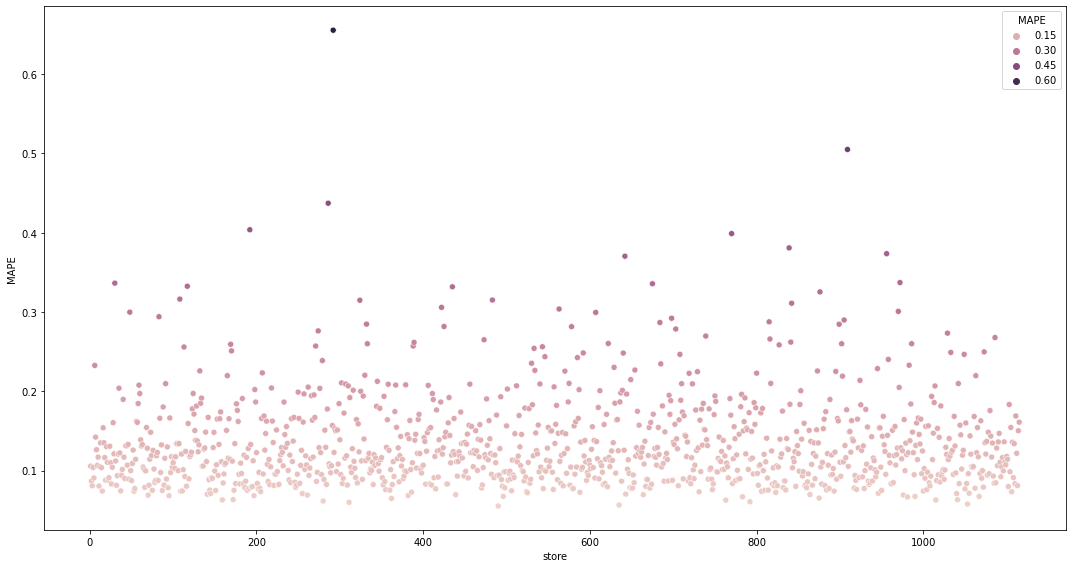

In [209]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot( x='store', y='MAPE', data=df9_sales_all_2,hue="MAPE" )

plt.show()

**Nota:**
- A maioria das lojas está com um erro de 20% em média, mas temos algumas lojas com erros acima de 50%, ou seja de uma forma visual podemos ver que exite lojas mais desafiadoras que as outras.

### <font color='#F37126'> 9.3. Performance total

**Resumindo a condição dos cenários das lojas**

In [210]:
df9_sales_all_3 = df9_sales_all_2[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )
df9_sales_all_3['Values'] = df9_sales_all_3['Values'].map( 'R${:,.2f}'.format )
df9_sales_all_3

,Scenario,Values
0,predictions,"R$274,436,224.00"
1,worst_scenario,"R$273,393,472.04"
2,best_scenario,"R$275,478,936.46"


### <font color='#F37126'> 9.4. Machine Learning - Performance

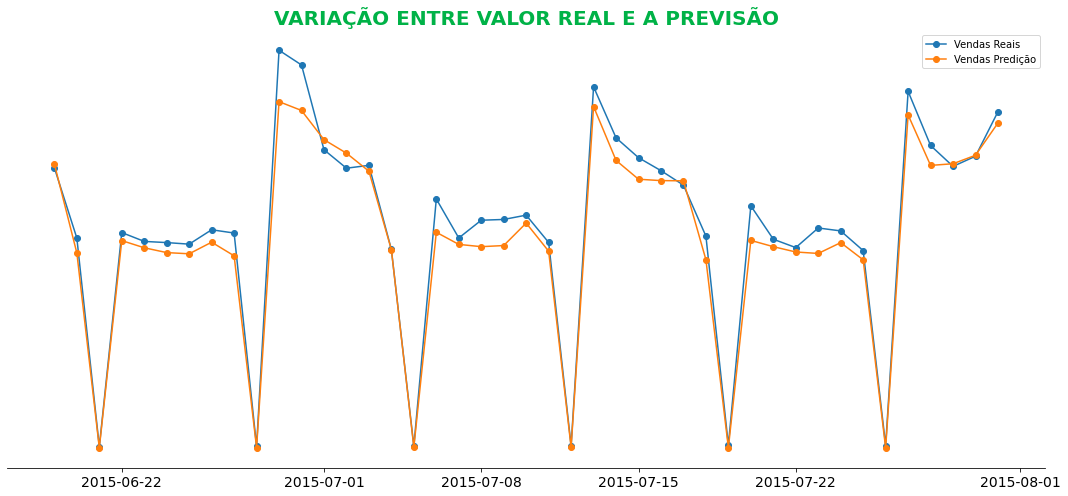

In [211]:
# Gráfico para visualizar a performance da predição em relação as vendas reais
fig, ax = plt.subplots(figsize=(15,7))

valorReal = df9_sales_all.groupby('date')['sales'].sum()
valorPredicao = df9_sales_all.groupby('date')['predictions'].sum()

ax.plot(valorReal.index,valorReal.values, label='Vendas Reais', marker = 'o')
ax.plot(valorPredicao.index,valorPredicao.values, label='Vendas Predição', marker = 'o')
    
ax.set_title("VARIAÇÃO ENTRE VALOR REAL E A PREVISÃO",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=14)

ax.legend()

plt.show()

**Nota:**
- O gráfico esta mostrando as seis semanas de teste e podemos ver que as predições ao longo do tempo esta bem próxima das vendas.

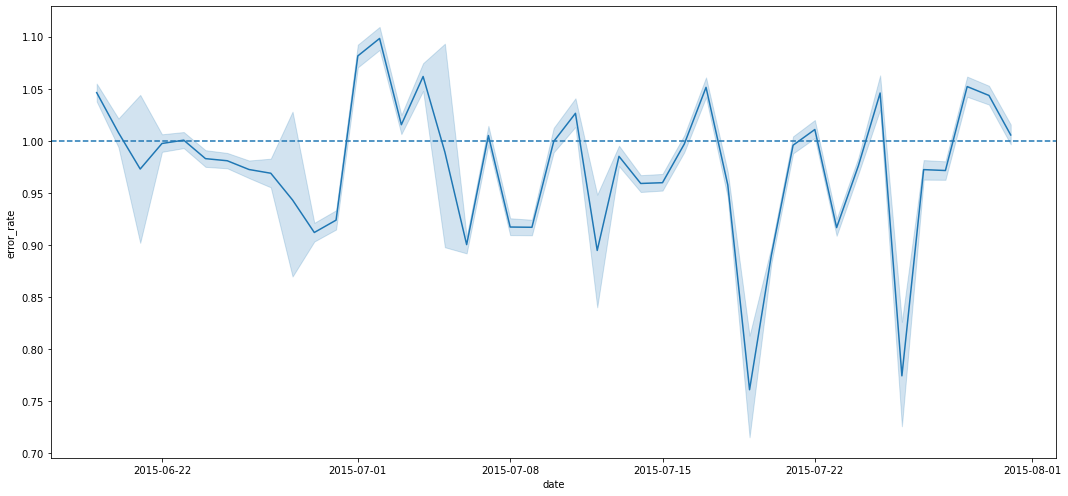

In [212]:
# Gráfico para visualizar a taxa de error por dia
fig, ax = plt.subplots(figsize=(15,7))

df9_sales_all['error_rate'] = df9_sales_all['predictions'] / df9_sales_all['sales']

sns.lineplot( x='date', y='error_rate', data=df9_sales_all )
plt.axhline( 1, linestyle='--')

plt.show()

**Nota:**
- Esta gráfico vai mostrar qual a porcentagem das predições em relação as vendas.
- Valores abaixo da linha, quer dizer que as previsões são menores que as vendas.

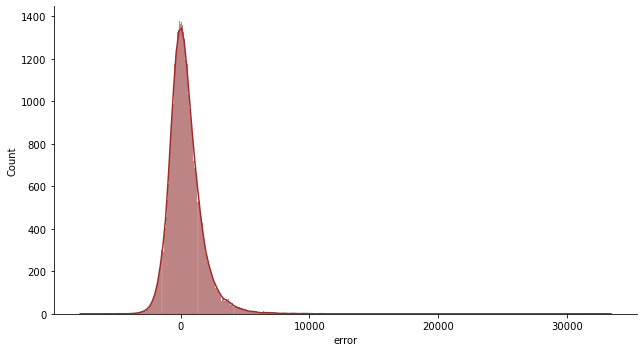

In [213]:
# Gráfico para visualizar se o erro tem uma distribuição normal

df9_sales_all['error'] = df9_sales_all['sales'] - df9_sales_all['predictions']

sns.displot(df9_sales_all.error, color="brown", kde=True).figure.set_size_inches(10, 5);

**Nota:**
- Observando o gráfico podemos notar que a distribuição dos dados se apróxima de uma normal.

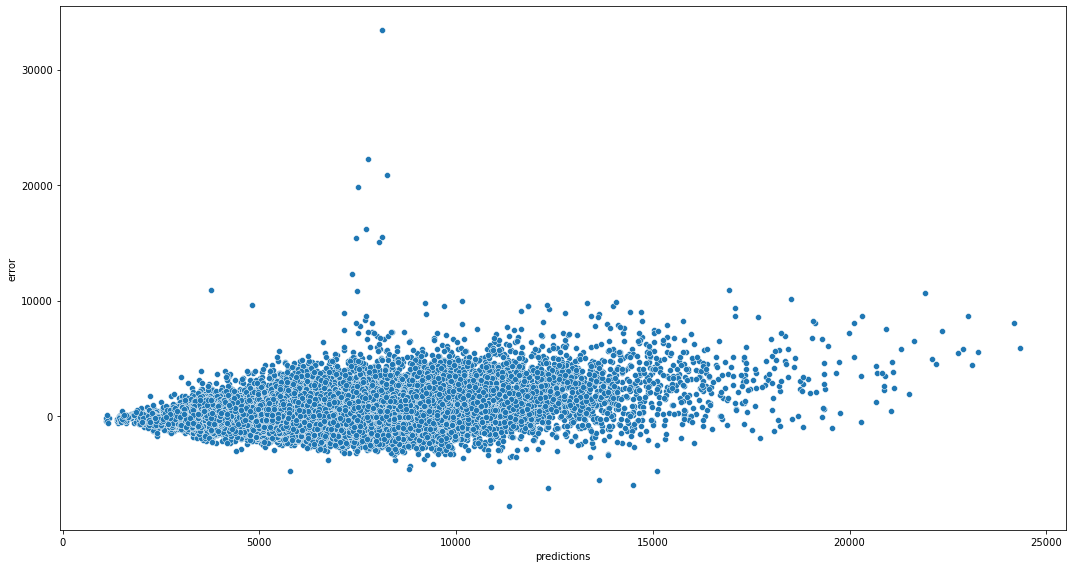

In [214]:
# Gráfico de resíduo
fig, ax = plt.subplots(figsize=(15, 8))

sns.scatterplot( df9_sales_all['predictions'], df9_sales_all['error'] )

plt.show()

**Nota:**

    - O eixo X são as lojas
    - O eixo y são os erro percentuais

- Então quanto mais próximo do zero melhor é a predição daquela loja.  
- O que eu quero com este gráfico é mostrar que temos alguns outliers, que por algum motivo é muito dificil de fazer a predição mais que as outras.
    - A mensagem deste gráfico é que pode ser que estas lojas vamos ter que fazer um modelo diferente para análisar o seu comportamento.
- Quando faço previsões entre 5 mil e 8 mil é onde tenho erros maiores.

[back](#indice)
**========================================================================================================================**

# <font color='red'> 8 - IMPLEMENTAR O MODELO PARA A PRODUÇÃO
<a id='producao'></a>

## <font color='#F37126'> Introdução:

É a etapa em colocar em produção para que as pessoas passam usar este resultado.
   - Também é uma etapa importante para coletar feedbacks dos usuários.

## <font color='blue'> PASSO 10 - Modelo em Produção
<a id='passo10'></a>

### <font color='#F37126'> Introdução:

Passo importante para tornar as Predições do Modelo acessível para qualquer consumidor.

**A arquitetura do Ambiente de Produção:**
- Handler- API: handler é o arquivo que recebe a requisição e acionar o modelo treinado e preparação dos dados.
 - Preparação dos dados: são todos os enconders, todas as transformações, todas as limpezas, todas as variáveis criadas e precisamos replicar tudo isso no ambiente de produção.

### <font color='#F37126'> 10.1. Rossmann Class

#### <font color='F37126'> Introdução:

Criando classes (copia o passo de descrição de dados e de feature engenire):

- passo 1
- passo 2
- passo 3
- passo 5

Depois vamos apagando o que não for relevante para a função.

#### Aplicando a criação das classes - Limpeza,Transformações e Encoding

In [215]:
# Salvando o modelo treinado
pickle.dump( model_xgb_tuned, open( '/Users/Rafael/Repos/6 - GitHub/1 - DS_em_Produção/Model/model_rossmann.pkl', 'wb' ) )

**Salvar as transformações em memória**

5.3. Rescaling
- competition distance
- competition open since_month
- competition open since year
- year

5.4. Transformação
- store_type - Label Encoding


In [216]:
import pickle
import inflection
import pandas as pd
import numpy as np
import math
import datetime

# Criando as classes Rossmann.py

class Rossmann( object ):
    def __init__( self ):
        self.home_path='/Users/Rafael/Repos/6 - GitHub/1 - DS_em_Produção/'
        self.competition_distance_scaler   = pickle.load( open( self.home_path + 'Parameter/competition_distance_scaler.pkl', 'rb') )
        self.competition_open_since_month  = pickle.load( open( self.home_path + 'Parameter/competition_open_since_month.pkl', 'rb') )
        self.competition_open_since_year   = pickle.load( open( self.home_path + 'Parameter/competition_open_since_year.pkl', 'rb') )
        self.year_scaler                   = pickle.load( open( self.home_path + 'Parameter/year_scaler.pkl', 'rb') )
        self.store_type_scaler             = pickle.load( open( self.home_path + 'Parameter/store_type_scaler.pkl', 'rb') )

        
    def data_cleaning( self, df1 ):
       
    # PASSO 1 - Análise Descritiva dos Dados 
    
    # 1.2. Colunas

        # Alterando as nomes das colunas
        cols_old = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                    'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
        
        snakecase = lambda x: inflection.underscore (x)
        
        cols_new = list(map(snakecase,cols_old))

        df1.columns = cols_new
        
    # 1.6. Filtrando os valores nulos
    
        # competition_distance
        df1.competition_distance.fillna(df1.competition_distance.mean(),inplace=True)
        
        # Preencher com a 0 os valores nulos
        cols_null = ['competition_open_since_month','competition_open_since_year',
                     'promo2_since_week','promo2_since_year','promo_interval']
        for i in cols_null:
            df1[i].fillna(0,inplace=True)
                    
    # 1.7. Change Data Types
    
        # Mudando os tipos das colunas
        df1['date'] = pd.to_datetime( df1['date'] )   
        df1['competition_open_since_month'] = np.dtype('int64').type(df1['competition_open_since_month'])
        df1['competition_open_since_year'] = np.dtype('int64').type(df1['competition_open_since_year'])
        df1['promo2_since_week'] = np.dtype('int64').type(df1['promo2_since_week'])
        df1['promo2_since_year'] = np.dtype('int64').type(df1['promo2_since_year'])
         
        return df1
        
    def feature_engineering( self, df2 ):
        
    # PASSO 2 - Feature Engineering - (pré-processamento de dados)
    
        # Criando um atributo para ano
        df2['year'] = df2['date'].dt.year
        # Criando um atributo para mês
        df2['month'] = df2['date'].dt.month
        # Criando um atributo para dia
        df2['day'] = df2['date'].dt.day
        # Criando um atributo para semana do ano
        df2['week_of_year'] = df2['date'].dt.weekofyear
        # Criando um atributo ano e semana
        df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )
        # Mudando a classificação do assortment
        df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 
                                                                        'extra' if x == 'b' else 'extended')
        # Mudando a classificação do state holiday
        df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 
                                                                              'easter_holiday' if x == 'b' else 
                                                                              'christmas' if x == 'c' else 'regular_day' )
        return df2

    def filtragem_das_variaveis( self, df3 ):
    
    # PASSO 3 - Filtragem das variáveis
        
    # 3.3. Selecão das Colunas
        cols_drop = ['open']
        df3 = df3.drop( cols_drop, axis=1 )
        
        return df3
    
    def data_preparation( self, df5 ):
    
    # PASSO 05 - Modelagem dos dados
    
    # 5.3. Rescaling
    
        # competition distance (subscrevendo os valores em uma nova escala)
        df5['competition_distance'] = self.competition_distance_scaler.transform( df5[['competition_distance']].values )
        
        # competition open since_month (subscrevendo os valores em uma nova escala)
        df5['competition_open_since_month'] = self.competition_open_since_month.transform( df5[['competition_open_since_month']].values )
        
        # competition open since year (subscrevendo os valores em uma nova escala)
        df5['competition_open_since_year'] = self.competition_open_since_year.transform( df5[['competition_open_since_year']].values )
        
        # year
        df5['year'] = self.year_scaler.transform( df5[['year']].values )
        
    # 5.4. Transformação
    
        # state_holiday - One Hot Encoding
        df5 = pd.get_dummies( df5, prefix=['state_holiday'], columns=['state_holiday'] )
    
        # store_type - Label Encoding - não sabemos se existe uma ordem de importância
        df5['store_type'] = self.store_type_scaler.transform( df5['store_type'] )
    
        # assortment - Ordinal Encoding - temos uma ordem de importância
        assortment_dict = {'basic': 1,  'extra': 2, 'extended': 3}
        df5['assortment'] = df5['assortment'].map( assortment_dict )
    
    # 5.6. Transformação de natureza cíclica
    
        # day of week
        df5['day_of_week_sin'] = df5['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
        df5['day_of_week_cos'] = df5['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )
        
        # month
        df5['month_sin'] = df5['month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
        df5['month_cos'] = df5['month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )
        
        # day 
        df5['day_sin'] = df5['day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
        df5['day_cos'] = df5['day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )
        
        # week of year
        df5['week_of_year_sin'] = df5['week_of_year'].apply( lambda x: np.sin( x * ( 2. * np.pi/52 ) ) )
        df5['week_of_year_cos'] = df5['week_of_year'].apply( lambda x: np.cos( x * ( 2. * np.pi/52 ) ) )
                    
        
        cols_selected = ['store','promo','store_type','assortment','competition_distance',
                                'competition_open_since_month','competition_open_since_year','promo2',
                                'promo2_since_week','promo2_since_year','day_of_week_sin','day_of_week_cos',
                                'month_sin','month_cos','day_sin','day_cos','week_of_year_sin','week_of_year_cos']
                
        return df5[cols_selected]
    
    def get_prediction( self, model, original_data, test_data ):
        # prediction
        pred = model.predict( test_data )
        
        # join pred into the original data
        original_data['prediction'] = np.expm1( pred )
        
        return original_data.to_json( orient='records', date_format='iso' )
        

### <font color='#F37126'> 10.2. API Handler

In [217]:
import pickle
import pandas as pd
from flask             import Flask, request, Response, jsonify
from rossmann.Rossmann import Rossmann

# loading model
model = pickle.load( open( '/Users/Rafael/Repos/6 - GitHub/1 - DS_em_Produção/Model/model_rossmann.pkl', 'rb') )

# initialize API
app = Flask( __name__ )

@app.route( '/rossmann/predict', methods=['POST'] )
def rossmann_predict():
    test_json = request.get_json()
   
    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
            
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instantiate Rossmann class
        pipeline = Rossmann()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # filtering the variables
        df3 = pipeline.filtragem_das_variaveis( df2 )
        
        # data preparation
        df5 = pipeline.data_preparation( df3 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df5 )
        
        return df_response
        
        
    else:
        return Reponse( '{}', status=200, mimetype='application/json' )

if __name__ == '__main__':
    app.run( '0.0.0.0' )

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://192.168.0.17:5000/ (Press CTRL+C to quit)


### <font color='#F37126'> 10.3. API Tester - Local

In [218]:
# loading test dataset
df10 = pd.read_csv( '/Users/Rafael/Repos/6 - GitHub/1 - DS_em_Produção/Datasets/test.csv' )

In [219]:
# merge test dataset + store
df_test = pd.merge( df10, df_store_info, how='left', on='Store' )

# choose store for prediction
df_test = df_test[df_test['Store'].isin( [20, 23, 22] )]
#df_test = df_test[df_test['Store'] == 22]

# remove closed days
df_test = df_test[df_test['Open'] != 0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop( 'Id', axis=1 )

In [220]:
df_test.shape

(121, 16)

In [221]:
# convert Dataframe to json
data = json.dumps( df_test.to_dict( orient='records' ) )

In [222]:
df_test = pd.read_json(data, orient = 'records')

In [223]:
df_test.shape

(121, 16)

In [225]:
# API Call

url = 'http://127.0.0.1:5000/rossmann/predict'
header = {'Content-type': 'application/json' } 
data = data

r = requests.post( url, data=data, headers=header )
print( 'Status Code {}'.format( r.status_code ) )

Status Code 200


In [226]:
# Convertendo para uma dataframe
d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )

In [227]:
# A coluna de predição
#d1.head()
display(d1)

,store,day_of_week,date,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week,prediction
0,20,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,d,basic,2340.0,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2015,9,17,38,2015-37,7419.173828
1,22,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,9,17,38,2015-37,4960.461914
2,23,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,d,basic,4060.0,8,2005,0,0,0,0,2015,9,17,38,2015-37,6482.264648
3,20,3,2015-09-16T00:00:00.000,1.0,1,regular_day,0,d,basic,2340.0,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2015,9,16,38,2015-37,7500.077637
4,22,3,2015-09-16T00:00:00.000,1.0,1,regular_day,0,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,9,16,38,2015-37,5054.782227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22,1,2015-08-03T00:00:00.000,1.0,1,regular_day,1,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,8,3,32,2015-31,6964.697266
117,23,1,2015-08-03T00:00:00.000,1.0,1,regular_day,1,d,basic,4060.0,8,2005,0,0,0,0,2015,8,3,32,2015-31,9054.148438
118,20,6,2015-08-01T00:00:00.000,1.0,0,regular_day,0,d,basic,2340.0,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2015,8,1,31,2015-30,6009.707520
119,22,6,2015-08-01T00:00:00.000,1.0,0,regular_day,0,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,8,1,31,2015-30,3561.972412


In [228]:
# O Valor da soma o quanto vai vender no final das seis semanas
d2 = d1[['store', 'prediction']].groupby( 'store' ).sum().reset_index()

for i in range( len( d2 ) ):
    print( 'Store Number {} will sell R${:,.2f} in the next 6 weeks'.format( 
            d2.loc[i, 'store'], 
            d2.loc[i, 'prediction'] ) )

Store Number 20 will sell R$276,004.04 in the next 6 weeks
Store Number 22 will sell R$184,978.30 in the next 6 weeks
Store Number 23 will sell R$256,403.50 in the next 6 weeks


### <font color='#F37126'> 10.4. API Tester - Heroku

In [229]:
# loading test dataset
df10 = pd.read_csv( '/Users/Rafael/Repos/6 - GitHub/1 - DS_em_Produção/Datasets/test.csv' )

In [230]:
# merge test dataset + store
df_test = pd.merge( df10, df_store_info, how='left', on='Store' )

# choose store for prediction
df_test = df_test[df_test['Store'].isin( [20, 23, 22] )]

# remove closed days
df_test = df_test[df_test['Open'] != 0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop( 'Id', axis=1 )

In [231]:
# API Call

url = 'https://model-rossmann-predition.herokuapp.com/rossmann/predict'
header = {"Content-type":"application/json"}
data = json.dumps( df_test.to_dict( orient='records' ) ) # convert Dataframe to json

r = requests.post( url, data=data, headers=header )
print("Status Code {}".format(r.status_code))

Status Code 200


In [232]:
# Convertendo para uma dataframe
d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )

In [233]:
# A coluna de predição
display(d1)

,store,day_of_week,date,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,year,month,day,week_of_year,year_week,prediction
0,20,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,d,basic,2340.0,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2015,9,17,38,2015-37,3957.388184
1,22,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,9,17,38,2015-37,5963.147949
2,23,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,d,basic,4060.0,8,2005,0,0,0,0,2015,9,17,38,2015-37,4261.424805
3,20,3,2015-09-16T00:00:00.000,1.0,1,regular_day,0,d,basic,2340.0,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2015,9,16,38,2015-37,3955.625732
4,22,3,2015-09-16T00:00:00.000,1.0,1,regular_day,0,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,9,16,38,2015-37,6258.171875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22,1,2015-08-03T00:00:00.000,1.0,1,regular_day,1,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,8,3,32,2015-31,7979.843262
117,23,1,2015-08-03T00:00:00.000,1.0,1,regular_day,1,d,basic,4060.0,8,2005,0,0,0,0,2015,8,3,32,2015-31,7607.296387
118,20,6,2015-08-01T00:00:00.000,1.0,0,regular_day,0,d,basic,2340.0,5,2009,1,40,2014,"Jan,Apr,Jul,Oct",2015,8,1,31,2015-30,3158.091064
119,22,6,2015-08-01T00:00:00.000,1.0,0,regular_day,0,a,basic,1040.0,0,0,1,22,2012,"Jan,Apr,Jul,Oct",2015,8,1,31,2015-30,3250.699707


In [234]:
# O Valor da soma o quanto vai vender no final das seis semanas
d2 = d1[['store', 'prediction']].groupby( 'store' ).sum().reset_index()

for i in range( len( d2 ) ):
    print( 'Store Number {} will sell R${:,.2f} in the next 6 weeks'.format( 
            d2.loc[i, 'store'], 
            d2.loc[i, 'prediction'] ) )

Store Number 20 will sell R$170,198.06 in the next 6 weeks
Store Number 22 will sell R$229,336.79 in the next 6 weeks
Store Number 23 will sell R$175,540.44 in the next 6 weeks


### <font color='#F37126'> 10.5. Modelo do Bot no Telegram

**Acessando as predições usando o celular.**

![Telegram bot]('<img align="center" height="400" width="300" src="Imagens/telegramBot.gif">')

[back](#indice)
**========================================================================================================================**

# <font color='red'> FACEBOOK PROPHET

## <font color='#F37126'> Introdução:

Está é uma ferramenta desenvolvida para fazer previsões futuras baseado em dados do passado, com uma característica de séries temporais.

- É um software open source lançado pelo time de Ciência de Dados do Facebook.
- Permite a previsão de séries temporais baseado em “regressão aditiva”.
- Tendências não lineares podem ser descobertas anualmente,semanalmente, diariamente (considera feriados).
- Funciona melhor com efeitos sazonais e com grande quantidade de dados.
- Robusta a outliers e mudanças de tendências.

In [235]:
# Leitura dos dados
df_sales_all = pd.read_csv('Datasets/train.csv',usecols=['Date','Store','Sales','StateHoliday','SchoolHoliday'])
df_prediction = pd.read_csv( 'Datasets/test.csv', usecols=['Store','Date'] )

In [236]:
# Filtro
df_sales_all = df_sales_all[df_sales_all['Sales'] > 0]
# Mudando os tipos das colunas
df_sales_all['Date'] = pd.to_datetime( df_sales_all['Date'] )
df_prediction['Date'] = pd.to_datetime( df_prediction['Date'] )

In [237]:
df_sales_all = df_sales_all[['Date','Store','Sales','StateHoliday','SchoolHoliday']].rename(columns = {'Date': 'ds', 'Store': 'store','Sales':'y'})
df_prediction = df_prediction[['Date', 'Store']].rename(columns = {'Date': 'ds', 'Store': 'store'})

## <font color='red'> Treinamento do modelo - parte 1

In [238]:
# store_id = lojas específicas
# sales_df = base de dados

# Precisa renomear os nomes das colunas, porque este é o padrão em que a biblioteca funciona
# Date: ds
# Sales: y

def sales_prediction(store_id, sales_df):
    global df_prediction
    df_prediction = df_prediction[df_prediction['store'] == store_id] # aplicação do filtro para selecionar uma loja específica
    sales_df = sales_df[sales_df['store'] == store_id] # aplicação do filtro para selecionar uma loja específica    
    sales_df = sales_df[['ds', 'y']]
    sales_df = sales_df.sort_values(by = 'ds') # ordenando os valores (é necessario fazer)
    
    # Criando o modelo
    model = Prophet()
    # Treinamento
    model.fit(sales_df)
    # Vai fazer as previsões
    forecast = model.predict(pd.DataFrame(df_prediction['ds']))
    # Gráfico
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


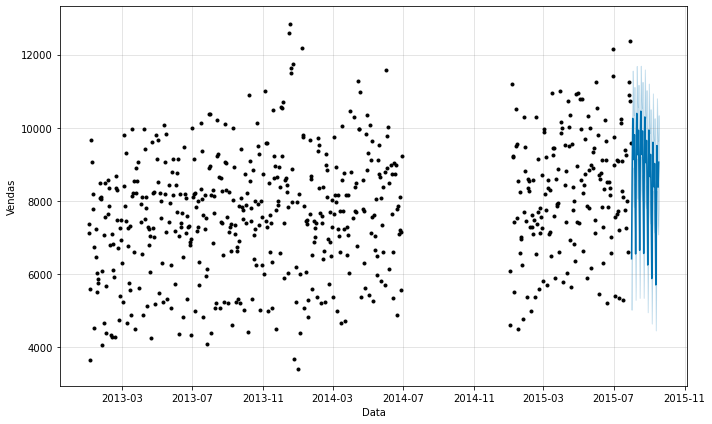

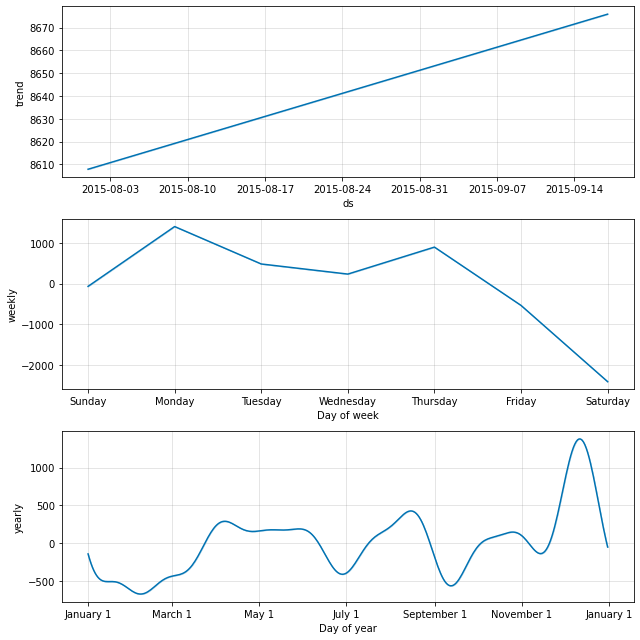

In [239]:
# Teste
df_origin, df_sales = sales_prediction(20, df_sales_all)

**Nota:**
- Gráfico 1:
  - Eixo X: Datas
  - Eixo Y: Vendas
  - Pontos preto: São os dados anteriores
  - Sem os pontos pretos: São as previsões de vendas que o modelo fez

- Gráfico 2:
  - Vai indicar os componentes da série temporal
  - Eixo trend: tendêncnia (mostra uma tendência de subida, que quer dizer um aumento das vendas)

- Gráfico 3:
  - Mostra os dias da semana.

- Gráfico 4:
  - Mostra o comportamento das vendas durante os meses.

In [240]:
# As previsões
df_sales.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-01,8607.819888,5019.240693,7735.225002,8607.819888,8607.819888,-2194.319832,-2194.319832,-2194.319832,-2407.400254,-2407.400254,-2407.400254,213.080422,213.080422,213.080422,0.0,0.0,0.0,6413.500056
1,2015-08-02,8609.269366,7526.875866,10015.039228,8609.269366,8609.269366,160.090193,160.090193,160.090193,-68.144966,-68.144966,-68.144966,228.235159,228.235159,228.235159,0.0,0.0,0.0,8769.359559
2,2015-08-03,8610.718844,8908.786183,11563.076161,8610.718844,8610.718844,1644.844340,1644.844340,1644.844340,1400.419548,1400.419548,1400.419548,244.424792,244.424792,244.424792,0.0,0.0,0.0,10255.563184
3,2015-08-04,8612.168322,8078.212165,10627.034393,8612.168322,8612.168322,743.197340,743.197340,743.197340,481.621594,481.621594,481.621594,261.575746,261.575746,261.575746,0.0,0.0,0.0,9355.365662
4,2015-08-05,8613.617800,7837.501732,10348.315653,8613.617800,8613.617800,513.074584,513.074584,513.074584,233.536199,233.536199,233.536199,279.538385,279.538385,279.538385,0.0,0.0,0.0,9126.692384


In [241]:
df_origin.shape, df_sales.shape

((619, 2), (48, 19))

In [242]:
# Total das previsões
print('R${:_.2f}'.format(df_sales.yhat.sum()).replace('.',',').replace('_','.'))

R$416.284,14


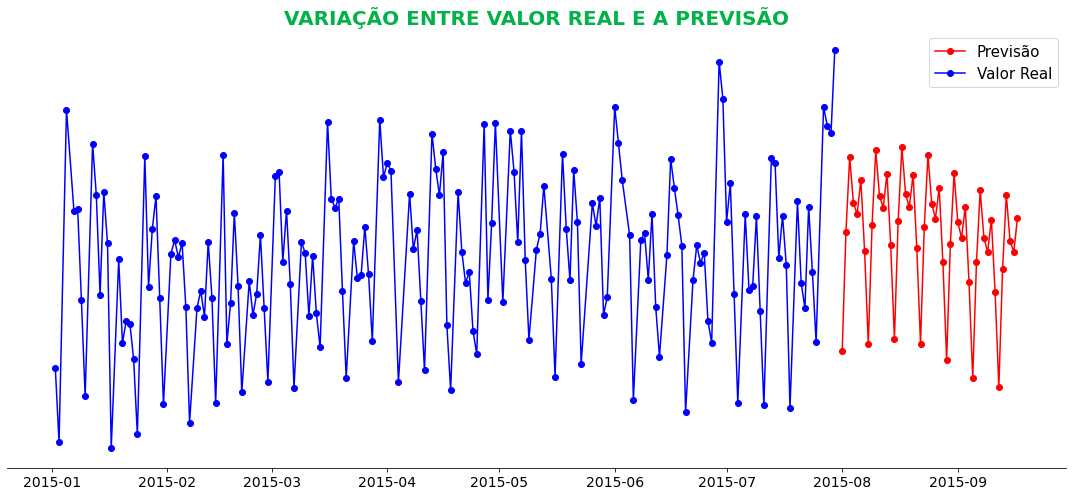

In [243]:
# Gráfico para visualizar a performance da predição em relação as vendas reais
fig, ax = plt.subplots(figsize=(15,7))

df_sales['yhat'] = np.dtype('int64').type(df_sales['yhat'])
df_origin = df_origin[(df_origin['ds']>= '2015-01-01') & (df_origin['ds'] < '2015-07-31')]

ax.plot(df_sales.set_index('ds')['yhat'],color='red', marker = 'o', label='Previsão')
ax.plot(df_origin.set_index('ds')['y'],color='blue', marker = 'o', label='Valor Real')
    
ax.set_title("VARIAÇÃO ENTRE VALOR REAL E A PREVISÃO",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=14)

plt.legend(facecolor="white",fontsize=15)

plt.show()

**Nota:**
- Esse regsitro são as previsões onde podemos repassar para o departamento de vendas, para que possa fazer algum tipo de estratégia.    

## <font color='red'> Treinamento do modelo - parte 2

**Agora vamos fazer as previsões passando as informações sobre os feriados**

Estavamos trabalhando somente com as datas e os valores de vendas, porém não existe nenhuma informação sobre StateHoliday e SchoolHoliday e isso indica que o modelo provavelmente vai considerar o alto pico de vendas em novembro que é Black Friday como se fosse outlier.<br>
Quando passamos as informações de feriado o modelo vai ter a tendência de prever os valores com o aumento justo porque ele vai identificar que existe um pico de vendas nessa época de novembro, por isso que esta ferramenta funciona muito bem com sazonalidade.

In [244]:
def sales_prediction_holidays(store_id, sales_df, holidays):
    global df_prediction
    df_prediction = df_prediction[df_prediction['store'] == store_id]
    sales_df = sales_df[sales_df['store'] == store_id]    
    sales_df = sales_df[['ds', 'y']]
    sales_df = sales_df.sort_values(by = 'ds')
    
    # Criando o modelo
    model = Prophet(holidays=holidays)
    # Treinamento
    model.fit(sales_df)
    # Vai fazer as previsões
    forecast = model.predict(pd.DataFrame(df_prediction['ds']))
    # Gráfico
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

In [245]:
# Criando uma lista, que são os feriados na base de dados
school_holidays = df_sales_all[df_sales_all['SchoolHoliday'] == 1].loc[:, 'ds'].values

In [246]:
# Datas únicas que são feriados, onde as escolas não estão funcionando na base de dados 
len(np.unique(school_holidays))

477

In [247]:
# Mudando a classificação do state holiday
df_sales_all['StateHoliday'] = df_sales_all['StateHoliday'].apply( lambda x: 'public_holiday' if x == 'a' else 
                                                                      'easter_holiday' if x == 'b' else 
                                                                      'christmas' if x == 'c' else 'regular_day' )
# Criando uma lista, que são os feriados na base de dados
state_holidays = df4_sales_all[(df4_sales_all['state_holiday'] == 'public_holiday') | 
                                    (df4_sales_all['state_holiday'] == 'easter_holiday') |
                                    (df4_sales_all['state_holiday'] == 'christmas')].loc[:,'date'].values

In [248]:
# Data que são feriados, considerando todas as lojas
state_holidays.shape

(910,)

In [249]:
# Feriados em que as lojas estavam abertas 
len(np.unique(state_holidays))

35

In [250]:
# Criando um DataFrame
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),'holiday': 'state_holiday'})
# Criando um DataFrame
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holiday'})
# Juntando os dois dataframe
school_state_holidays = pd.concat((state_holidays, school_holidays))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


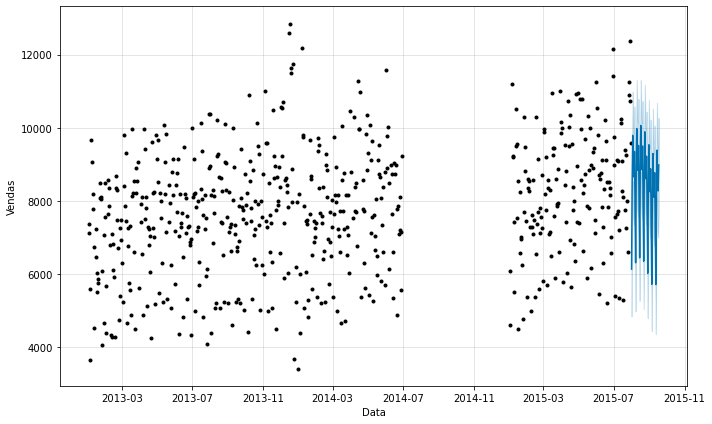

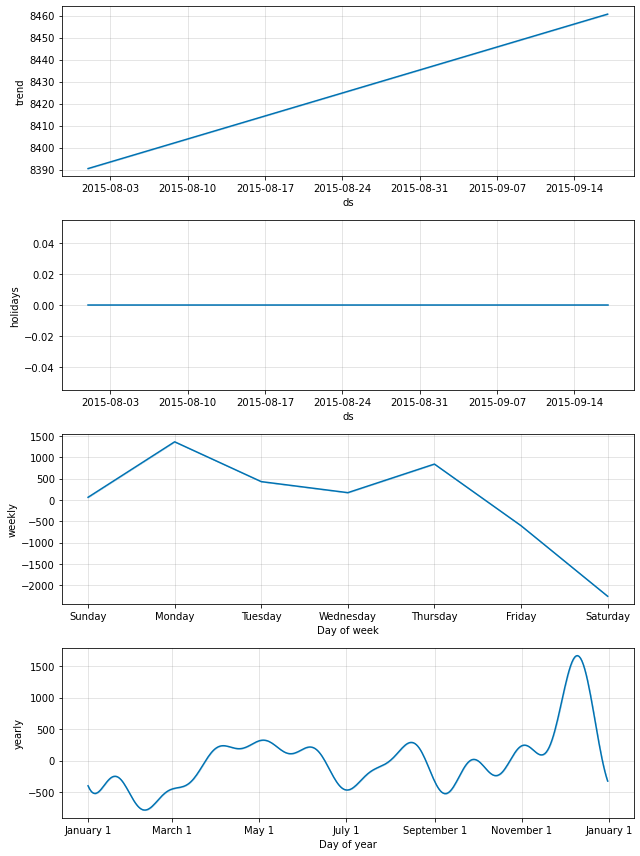

In [251]:
df_origin, df_sales = sales_prediction_holidays(20, df_sales_all, school_state_holidays)

In [252]:
df_sales.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,school_holiday,school_holiday_lower,school_holiday_upper,state_holiday,state_holiday_lower,state_holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-01,8390.498997,4837.673023,7382.457024,8390.498997,8390.498997,-2260.018256,-2260.018256,-2260.018256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2257.782777,-2257.782777,-2257.782777,-2.235479,-2.235479,-2.235479,0.0,0.0,0.0,6130.480741
1,2015-08-02,8391.992499,7180.109528,9737.206430,8391.992499,8391.992499,78.593371,78.593371,78.593371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.272886,61.272886,61.272886,17.320485,17.320485,17.320485,0.0,0.0,0.0,8470.585870
2,2015-08-03,8393.486001,8529.553452,10988.875435,8393.486001,8393.486001,1400.469533,1400.469533,1400.469533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1361.857444,1361.857444,1361.857444,38.612089,38.612089,38.612089,0.0,0.0,0.0,9793.955534
3,2015-08-04,8394.979503,7566.428593,10080.839383,8394.979503,8394.979503,490.194822,490.194822,490.194822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428.723194,428.723194,428.723194,61.471628,61.471628,61.471628,0.0,0.0,0.0,8885.174325
4,2015-08-05,8396.473005,7344.803097,9844.007388,8396.473005,8396.473005,255.844603,255.844603,255.844603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.211459,170.211459,170.211459,85.633144,85.633144,85.633144,0.0,0.0,0.0,8652.317608


In [253]:
df_origin.shape, df_sales.shape

((619, 2), (48, 28))

In [254]:
# Total das previsões
print('R${:_.2f}'.format(df_sales.yhat.sum()).replace('.',',').replace('_','.'))

R$401.106,03


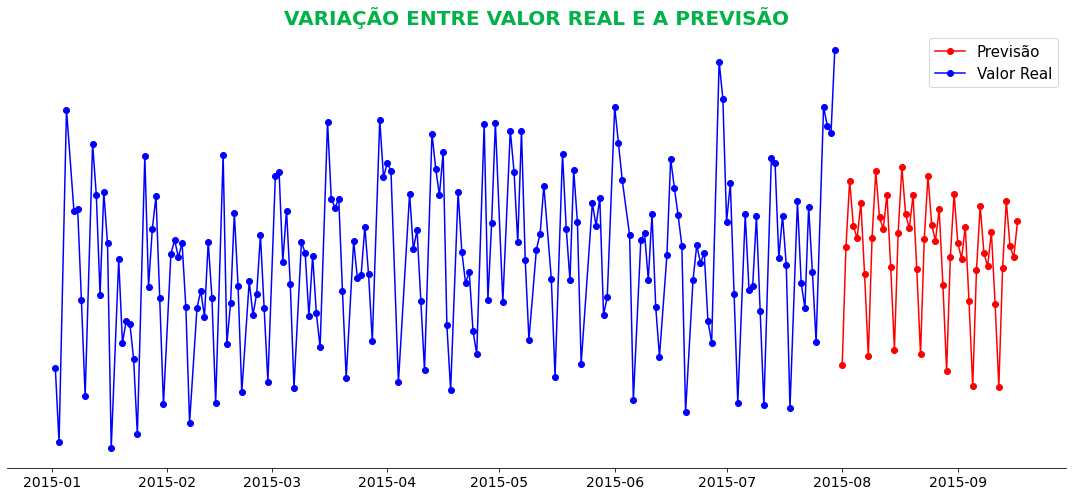

In [255]:
# Gráfico para visualizar a performance da predição em relação as vendas reais
fig, ax = plt.subplots(figsize=(15,7))

df_sales['yhat'] = np.dtype('int64').type(df_sales['yhat'])
df_origin = df_origin[(df_origin['ds']>= '2015-01-01') & (df_origin['ds'] < '2015-07-31')]

ax.plot(df_sales.set_index('ds')['yhat'],color='red', marker = 'o', label='Previsão')
ax.plot(df_origin.set_index('ds')['y'],color='blue', marker = 'o', label='Valor Real')
    
ax.set_title("VARIAÇÃO ENTRE VALOR REAL E A PREVISÃO",fontsize=20,fontweight='bold',color='#00b247')

ax.set_facecolor("white")
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x',labelsize=14)

plt.legend(facecolor="white",fontsize=15)

plt.show()

**Nota:**
- É importante considerar as datas de feriados, pois assim o próprio modelo vai identificar os períodos que podem ter picos de vendas ou também períodos que é feriados e as vendas diminuem, desta forma podemos fazer um planejamento de estoque.

- Podemos observar que é gerado um gráfico diferente onde temos no eixo y 'holidays', que vai indicar picos de vendas.

**Mas não vamos usar este modelo, porque na etapa de avaliação do algoritmo, tivemos modelos que teve uma performance melhor.**

[back](#indice)
**========================================================================================================================**

# <font color='red'> INSIGHTS

**Resumo dos insights durante análise exploratória de dados (EDA):**
1. Na coluna Sales a maior venda pode está relacionado as compras realizadas ao domingo.
2. Na coluna Customers o maior número de cliente é quando tem promoção ao domingo.
3. Podemos programar junto com o setor de Marketing, promoções além do fim de semana, para atrair clientes e com uma possibilidade de aumento de vendas.
4. Talvez se elevarmos o nível de sortimento da categoria 'b' para outros tipos de lojas o número de vendas possa aumentar.
5. Podemos perceber que no mês de fevereiro em todos os anos as vendas cairam.
6. No mês de novembro e dezembro segue uma sequência de aumento das vendas que pode ser explicada pela Black Friday e Natal, com este comportamento a empresa pode fazer um planejamento para deixar preparado o estoque.
7. Podemos afirmar que quando têm promoção o número de cliente não aumentam muito.
8. Podemos perceber que quando temos promoção na loja as vendas aumentam cerca de 12%.
9. Podemos observar que temos uma quantidade de vendas muito maior no feriados público.
10. Lojas do tipo 'a', tem uma quantidade de vendas maior que as demais lojas.
11. Tipo de assortment do nível 'básico', tem uma quantidade de vendas maior, mas o do tipo 'extra' vende muito pouco.
12. Não tem muita vantagem de particiopar de promoções extendida.
13. Lojas vendem mais depois do dia 10 de cada mes.
14. Lojas vendem menos nos final de semana.
15. Lojas vendem menos durante os feriado escolares.

# <font color='red'> PRÓXIMO PASSOS

1. Temos uma queda nas vendas ao decorrer dos anos, que precisa ser analisado, para não afetar as vendas de 2015.
   - Mas comparando o mesmo período de meses entre 2014 e 2015 temos um aumento de 6%.


2. Registros que são outliers: 101.710.
    - Devemos depois fazer uma análise mais profunda porque nem tudo pode ser um outlier.


3. Podemos perceber que as vendas no final do mês, apresenta uma queda bem acentuada nas vendas, que precisa análisar.

4. Podemos ver que o menor pico de vendas é no domingo, esta é uma informação que precisa compreender melhor este comportamento.

[back](#indice)
**========================================================================================================================**